# 1. Import stuff

In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import re

from nltk.tokenize import word_tokenize
import twokenize
matplotlib.style.use('ggplot')
pd.options.display.max_colwidth = 100

# ReadFile in

In [2]:
directory = "data/crawled-tweets/"
filename = "master-11-07-2016.csv"
src_file = directory+filename

#size of wordembeddings
dimensions = 52

df = pd.read_csv(src_file, names=["User", "timestamp_ms", "tweet", "longitude", "latitude", "retweet_count", "favorite_count", "flag"])

In [44]:
df.sample(10)

User   timestamp_ms  \
596091     81607832  1467711791059   
217218    187161236  1467475393230   
1207989   430039369  1468153479308   
1144139  2745076508  1468141863141   
859892   4342369593  1467833582196   
811071    322223001  1467827394500   
682814    122749416  1467797422634   
246347    221463677  1467560404318   
440218    483348496  1467634583286   
523144   2361168380  1467659617360   

                                                                                                       tweet  \
596091   @malcolm_purvis @dutch85169 @TomLondon6 Where do you sit in the labour party Would you like to s...   
217218          @Ksleet @markwools @VodafoneUKhelp @ID_Mobile_UK cool .... what service does it run through?   
1207989                               Nya Kirby makes his debut for Chelsea's U18s this afternoon vs Bayern.   
1144139  Well done to both front of house &amp; kitchen team last night for making Elaine's surprise b-da...   
859892                                                              @Chrismccrob lol we call that lucky time   
811071   Next up is #cormeibioncolwyn getting the crowds going! #eiriasfanzone #walesvportugal https://t....   
682814   Thanks for following @ModernOfficeUK @BeckyEdmundson @ConfettiAvenue @WearedCrafts @pinkweddingd...   
246347   RT @powerleagueUK: Todays massive #Euro2016 give away is a pair Beats Headphones! Follow and RT ...   
440218                                           @colingrandison @DeclanMacGregor Didn't show that one haha.   
523144                #dorsethour #LymeRegis, i do love to live beside the seaside 😘 https://t.co/bxKJ3BvxUU   

         longitude   latitude  retweet_count  favorite_count  flag  \
596091   -2.008302  57.521778              0               0     1   
217218    0.210589  51.560587              0               0     2   
1207989  -0.099164  51.645276              0               0     2   
1144139  -5.014462  50.162489              0               0     2   
859892   -4.068761  55.679788              0               0     2   
811071   -3.696122  53.285672              0               0     2   
682814   -1.645362  54.992056              0               0     2   
246347   -0.333943  53.765817              0               0     2   
440218   -3.452863  56.067180              0               0     2   
523144   -3.927119  50.997507              0               0     2   

                                                                                  tweetList  
596091                                                                             [greens]  
217218                                                                 [cool, service, run]  
1207989                             [nya, kirby, makes, debut, chelseas, afternoon, bayern]  
1144139                                                                              [well]  
859892                                                             [lol, call, lucky, time]  
811071   [next, #cormeibioncolwyn, getting, crowds, going, #eiriasfanzone, #walesvportugal]  
682814                                                                  [thanks, following]  
246347          [todays, massive, #euro, give, away, pair, beats, headphones, follow, #win]  
440218                                                             [didnt, show, one, haha]  
523144                               [#dorsethour, #lymeregis, love, live, beside, seaside]

In [4]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

#remove those words where it's highly likely to encounter a bot
spamWords =  {"#job", "#tides", "#trndnl", "mph", "hire", "watt", "ktt", "watt", "watts", "kts", "hiring", "#bestbroadband", "barometer"}    
stops = set(stopwords.words("english"))    

def preprocess(data, tokenizingFunction):
    tweet = data.lower()
    #remove URLs
    tweet = re.sub(r"http\S+", " ", tweet)
    #remove Usernames
    tweet = re.sub(r"\@\S+", " ", tweet)
    
    tweet = re.sub(r"\s.*&+.*\s", " ", tweet)
    #tweet = re.sub(r"\#", " ", tweet)
    
    
    #remove all numbers longer than 2digits
    tweet = re.sub('\d\d[A-Za-z0-9]+',' ', tweet)
    #remove elongated elements of words
    tweet = re.sub('(.)\1{2,}','\1\1\1', tweet)
    tweet = re.sub('[\,\.\?\!\;\"\'\(\)\:\+\'\´\`\-\_]','', tweet)
    #remove multiple blanks
    tweet = re.sub(' +',' ', tweet)
    
    #tweet = tweet.replace("@", "")
    
    if callable(tokenizingFunction):
        tweet = tokenizingFunction(tweet)
    else:
        tweet = tweet.split()
    
    for item in tweet:
        if item in spamWords:
            return []  
    tweet = [w for w in tweet if not w in stops and len(w) > 2]  # and len(w) > 1

    #disable porter stemmer
    '''
    porter_stemmer = PorterStemmer()
    stemming_done = True
    stemmed = []
    for word in tweet: 
        stemmed.append(porter_stemmer.stem(word))
    tweet = stemmed
    '''
    
    return tweet

# Analyse preprocessed Tweets

In [ ]:
#get a sample of tweet to analyse tokenizers performance on 1% this dataset
sfta = df["tweet"].sample(frac=0.01, replace=False, random_state=7923)

TwoklengthsOfTweets = sfta.apply(preprocess, args=(twokenize.tokenize,)).str.len()

In [ ]:
splitlengthsOfTweets = sfta.apply(preprocess, args=("split",)).str.len()

In [ ]:
print("Number of entries that have precise GPS coordinates")
print(df[df.flag != 2].shape)
print("Tokenizer sample size")
print(sfta.shape)
print("Number of total tweets")
print(df.shape)

In [ ]:
maxi = np.array([lengthsOfTweets.max(), TwoklengthsOfTweets.max(), splitlengthsOfTweets.max()]).max()
plt.figure(figsize=(18,5))
#NLTK Tokenizer Word length

plt.subplot(1, 3, 1)
lengthsOfTweets.plot.hist(alpha=0.5, bins=lengthsOfTweets.max())
#sns.distplot(lengthsOfTweets)
#plt.axis([0, 60, 0, 9000])
plt.axis([0, maxi, 0, 1700])
plt.title("NLTK Tokenizer")

#Twokenize Tokenizer Word length
plt.subplot(1, 3, 2)
#sns.distplot(TwoklengthsOfTweets)
TwoklengthsOfTweets.plot.hist(alpha=0.5, bins=TwoklengthsOfTweets.max())

#plt.axis([0, 60, 0, 9000])
plt.axis([0, maxi, 0, 1700])
plt.title("Twokenize Tokenizer")

#String.split Splitter Word length
plt.subplot(1, 3, 3)
#sns.distplot(splitlengthsOfTweets)

splitlengthsOfTweets.plot.hist(alpha=0.5, bins=splitlengthsOfTweets.max())
#plt.axis([0, 60, 0, 9000])
plt.axis([0, maxi, 0, 1700])
plt.title("String Split Tokenizer")

plt.savefig("Preprocessing_evaluation_without_porter.png")
plt.show()


In [ ]:
#This section calculates the percentage of Agreement
# blank, twok, nltk
# [splitlengthsOfTweets, TwoklengthsOfTweets, lengthsOfTweets,]

a = splitlengthsOfTweets
b = TwoklengthsOfTweets
(a == b).sum()/float(a.size)

In [ ]:

lengthsOfTweets = sfta.apply(preprocess, args=(word_tokenize,)).str.len()

In [ ]:
from geopy.distance import great_circle, vincenty
from scipy.spatial.distance import euclidean
from sklearn import preprocessing
import numpy as np
from math import sqrt

df3 = df.sample(frac=0.1, replace=False)

min_max_scaler = preprocessing.MinMaxScaler()

firstLat = df3.latitude.values[0]
restLat =  df3.latitude.values[1:]
                         
firstLong = df3.longitude.values[0]
restLat =  df3.longitude.values[1:]
eucRes = []
greatC = []
for i in range(1, 100000):
    eucRes.append(euclidean([firstLat, firstLong], [df3.latitude.values[i], df3.longitude.values[i]]))
    greatC.append(float(vincenty([firstLat, firstLong], [df3.latitude.values[i], df3.longitude.values[i]]).km))

print(eucRes[0:5])
print(greatC[0:5])

X_eucRes = min_max_scaler.fit_transform(np.array(eucRes).reshape(-1,1))
#X_eucRes = preprocessing.normalize(np.array(eucRes), norm='l2')

X_greatC = min_max_scaler.fit_transform(np.array(greatC).reshape(-1,1))
#X_greatC = preprocessing.normalize(np.array(X_greatC), norm='l2')

diffs = X_eucRes - X_greatC

sns.distplot(diffs)


m = np.mean(diffs)
s = np.std(diffs)
n = len(diffs)

print(m)
print(n)
print(s)
#from sklearn.metrics import mean_squared_error


#print(sqrt(mean_squared_error(X_greatC, X_eucRes)))

In [ ]:
print(np.argmax(np.array(greatC).reshape(-1,1)))
print(m /(s/sqrt(n)))

df.flag[17843-1]

In [ ]:
#This section prints out the different tokenization results
print(df["tweet"].head(10))
print(" ")
print(df["tweet"].head(10).apply(preprocess, args=(word_tokenize,)))
print(" ")
print(df["tweet"].head(10).apply(preprocess, args=(twokenize.tokenize,)))
print(" ")
print(df["tweet"].head(10).apply(preprocess, args=("split",)))

# Continue Actual Preprocessing

In [5]:
#This section applies Twokenize and throws away allwords shorter than 3 chars 
#the new dataframe that we work with is now df2
df["tweetList"] = df["tweet"].apply(preprocess, args=(twokenize.tokenize,))
#allow only tweets that have at least 3 words.

#df2.rename(columns={'tweetList':'tweet'}, inplace=True)

In [6]:
#df2 = df2.reset_index(drop=True)
try:
    del df2
    del df3
except:
    pass
df2 = df[(df.tweetList.str.len() > 2)]
print(df2.shape)
#df2.sample(5)
#df2.reset_index(drop=True)
#print(df2.tweetList.head(5))

(1200512, 9)


# Train Word Embeddings

In [9]:
#run the gensim word2vec model on 
# Only retrain when saved to different model file!
import gensim, logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
dimensions = 52
print("begin with word2vec")

model = gensim.models.Word2Vec(alpha=0.025, min_alpha=0.025, workers=4, size=dimensions, sg=0, min_count=3, negative=20) #, negative=5  # use fixed learning rate
model.build_vocab(df2.tweetList)
for epoch in range(10):
    model.train(df2.tweetList)
    model.alpha -= 0.002  # decrease the learning rate
    model.min_alpha = model.alpha  # fix the learning rate, no decay
model.save("ukmodel-20.model")

begin with word2vec


In [7]:
#when model is already trained, just load UKmodel
import gensim, logging
model_name = "ukmodel-20.model"
dimensions = 52
model = gensim.models.Word2Vec.load(model_name)

In [8]:
print(model.most_similar("#london"))

#len(model["car"])
#del df2
#del df3

[('#london…', 0.8646726012229919), ('#lovelondon', 0.7543931007385254), ('#londonlife', 0.7485161423683167), ('clerkenwell', 0.7064059972763062), ('#bondstreet', 0.7058432102203369), ('#visitlondon', 0.6929121613502502), ('#londoncity', 0.6908577680587769), ('#nottinghill', 0.6886054873466492), ('#instalondon', 0.6865907907485962), ('#londres', 0.6840596199035645)]


# Creat the Tweet Level Representation

In [17]:
#use tfidf to make sure that words with low tfidf wont be pooled

#from sklearn.feature_extraction.text import TfidfVectorizer
#v = TfidfVectorizer()
#x = v.fit_transform(df2['tweetList'].str.join(" "))

In [18]:
#v.get_feature_names()[:10]

In [9]:
import numpy

def createAvgPooledTweet(tweet):
        itera = 0
        avgpooledTweets = np.zeros(dimensions)
        for word in tweet:
            #only allow words with a TFIDF that is not too low ?
            if word in model: #TODO: check lookup in vectorizer to find out if word exceed treshold and x: 
                itera += 1
                avgpooledTweets += model[word]
        return (avgpooledTweets / itera)

def createMaxPooledTweet(tweet):
        #dimensions = 52
        maxpooledTweets = np.zeros(dimensions)
        for word in tweet:
            if word in model:       
                for k, dimen in enumerate(model[word]):
                    if dimen > maxpooledTweets[i, k]:
                        maxpooledTweets[i, k] = dimen
        return (maxpooledTweets)


In [10]:
#df2.reset_index(level=0, inplace=True)
#dimensions=52
#df2 = df2.drop('AvgWordEmbeddings', 1)
df2["AvgWordEmbeddings"] = df2.tweetList.apply(createAvgPooledTweet)
#df2.MaxWordEmbeddings = df2.tweetList.apply(createMaxPooledTweet)

len(df2.AvgWordEmbeddings.values[0])

/Users/fabian/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


52

In [11]:
from datetime import datetime, date

try:
    df2.timestamp_ms = df2.timestamp_ms.apply(lambda x: datetime.fromtimestamp(int(x) // 1000))
    
    pd.to_datetime(df2.timestamp_ms)
    df2 = df2.set_index(['timestamp_ms'])
    #df2.index
except:
    print("Data was already converted")

#df2["timestamp_ms"] = df2.timestamp_ms.astype('datetime64[ns]')
#df2["TimeReviewed"] = pd.to_datetime(df2["timestamp_ms"])

/Users/fabian/anaconda/envs/py35/lib/python3.5/site-packages/pandas/core/generic.py:2387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [12]:
#allow only tweets with precise coordinates for clustering
df3 = df2[df2.flag == 1].copy()

#remove all ; from the corpus as they destroy the export later
df3['tweet'] = df3['tweet'].str.replace(r'\;', '')

In [14]:
df3.sample(5)

User  \
timestamp_ms                      
2016-07-10 12:37:25   248679343   
2016-07-10 16:31:05  1424167297   
2016-07-06 09:34:17    37402072   
2016-07-09 22:57:04   100843768   
2016-07-03 17:33:24  1447240838   

                                                                                                                   tweet  \
timestamp_ms                                                                                                               
2016-07-10 12:37:25                   The run was great! #runningman #mudrun #offroad @ Cornwall https://t.co/pn7S4cXsMc   
2016-07-10 16:31:05  ‘Dennis and the Excise Man’ © Joe Canning 2016. All Rights Reserved. https://t.co/E6dsQfnd2L htt...   
2016-07-06 09:34:17                Top 5 Books for Programming/Coding Interviews - Best of lot - https://t.co/evcb9X1v8m   
2016-07-09 22:57:04     Let's do this sat night woohoo (@ The Wright Venue in Swords, Co Dublin) https://t.co/0Jq5m1FxjS   
2016-07-03 17:33:24                                 #londra #london ✓✓✓ @ London, United Kingdom https://t.co/Nk9LekPKdC   

                     longitude   latitude  retweet_count  favorite_count  \
timestamp_ms                                                               
2016-07-10 12:37:25  -4.900000  50.300000              0               0   
2016-07-10 16:31:05  -8.110546  54.654197              0               0   
2016-07-06 09:34:17  -2.884240  54.063300              0               0   
2016-07-09 22:57:04  -6.223913  53.445516              0               0   
2016-07-03 17:33:24  -0.127318  51.507115              0               0   

                     flag  \
timestamp_ms                
2016-07-10 12:37:25     1   
2016-07-10 16:31:05     1   
2016-07-06 09:34:17     1   
2016-07-09 22:57:04     1   
2016-07-03 17:33:24     1   

                                                                     tweetList  \
timestamp_ms                                                                     
2016-07-10 12:37:25     [run, great, #runningman, #mudrun, #offroad, cornwall]   
2016-07-10 16:31:05      [dennis, excise, man, joe, canning, rights, reserved]   
2016-07-06 09:34:17    [top, books, programming/coding, interviews, best, lot]   
2016-07-09 22:57:04  [lets, sat, night, woohoo, wright, venue, swords, dublin]   
2016-07-03 17:33:24           [#londra, #london, ✓✓✓, london, united, kingdom]   

                                                                                                       AvgWordEmbeddings  
timestamp_ms                                                                                                              
2016-07-10 12:37:25  [0.458144261191, -0.700721070481, -0.369878041248, 0.54962634854, -0.631568325063, 0.79744186252...  
2016-07-10 16:31:05  [-0.522463619709, 1.59939262258, 0.0442006875362, -0.62446612439, 1.06423883566, 0.104654835803,...  
2016-07-06 09:34:17  [0.912695032358, 0.831818854809, -0.946796679497, 0.648474955559, -1.10453778505, -0.33883427977...  
2016-07-09 22:57:04  [-1.19727706164, 0.63296469301, -0.616013036342, -0.690480632707, 0.112536161207, 0.371013306081...  
2016-07-03 17:33:24  [-0.853574795028, -0.145303318898, -0.866370622069, 0.773057736456, -0.676101091007, 1.297268924...

In [ ]:
#user, lat, long, date as index?, Tweet
print(df3.shape)
df3.head()

# Method 1: One-step unified distance metric

# Make the Maps and do most frequent word analysis

In [31]:
from sklearn.cluster import DBSCAN

import time
from mpl_toolkits.basemap import Basemap
import matplotlib.cm as cm
from collections import Counter
import pprint
import os.path
from geopy.geocoders import Nominatim

from openpyxl import load_workbook
from openpyxl import Workbook

#coreComponents is a dictionary that carries for each label the 
# wordembedding representations of the core components of the clustering result
def make_the_Cluster_Eval(labels, dataframe, meth, sample_size, seed_no, timePassed=0, experiment_descriptor="NA", sm2="NA", minpts=0): 
    """
    This function takes the clustering results in form of a labelled array, use those labels to 
    access the sampledDataFrame, which contains latitude longitude and the preprocessed Tweets
    in word form.
    """
    
    try:
        stemming_true
    except NameError:
        stemming_true = False
    
    geolocator = Nominatim()
    
    ###BEGIN map variable preparation and config
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    n_clusters_ = 1
    
    #define bounding box for map
    bbox = {
        'lon': -4.5,
        'lat': 55.5,
        'll_lon': -11,
        'll_lat': 50,
        'ur_lon': 2,
        'ur_lat': 61
    }    
    plt.figure(figsize=(15,15))
    m = Basemap(
        projection='merc', lon_0=bbox['lon'], lat_0=bbox['lat'], resolution="l",
        llcrnrlon=bbox['ll_lon'], llcrnrlat=bbox['ll_lat'],
        urcrnrlon=bbox['ur_lon'], urcrnrlat=bbox['ur_lat'])
    m.drawcoastlines()
    
    #fill continents?
    m.fillcontinents(color='gray', lake_color='aqua', zorder=5)
    m.drawmapboundary(fill_color='aqua')
    
    ####END map config
    
    makeMapLater = False
    
    evalList = []
    print("start calculating")
    #plot each cluster individually
    for k, col in zip(unique_labels, colors):
        
        if k == -1:
            # Black used for noise.
            col = 'k'
             
        #currentClusterDF = subset dataframe by current k by index given in label variable
        class_member_mask = (labels == k)
        
        
        #get number of distinct users in this cluster.
        DistinctUsers = [] #pd.value_counts(dataframe.User.values).size #len(set(xy[:,2]))
        #print("The number of distinct users in this cluster is" + str(numOfDistinctUsers))
        #print(dataframe.latitude.values)
        x1 = dataframe.longitude.values
        y1 = dataframe.latitude.values
        period = dataframe.index.values[class_member_mask]
        
        x1 = x1[class_member_mask]

        y1 = y1[class_member_mask]
        x1, y1 = m(x1, y1)
        
        noise_percentage = sum((labels == -1))/len(class_member_mask) * 100
        
        if k == -1:
            # don't print noise, but count number of noise tweets
            print("There were " + str(sum((labels == k))) + " out of " + str(len(class_member_mask)) + " Tweets that were clustered as noise")
            print("This is " + str(noise_percentage) + "%.")
            #append the noise cluster to evalList
            
            
            # m.scatter(x1, y1, s=4, marker="o", c=col, alpha=0.5, zorder=10)
            
        else:
            #plot k to map at position 
            wordsOfCluster = []
            tweetsOfCluster = []
            avgWEofAllTweetsInCluster = np.zeros(dimensions)
            xtxt = 0
            ytxt = 0
            numOfDocs = 0
            #loop through all clusters to visualise
            for i, label in enumerate(labels):
                
                if label == k:
                    numOfDocs += 1
                    #print(dataframe.tweetList)
                    #das ist der tweet
                    #print(' '.join(tweets[i]))
                    
                    if dataframe.User.ix[i] not in DistinctUsers:
                        DistinctUsers.append(dataframe.User.ix[i])
                    
                    tweetsOfCluster.append(dataframe.tweet.ix[i])
                    avgWEofAllTweetsInCluster += dataframe.AvgWordEmbeddings.ix[i]
                    
                    if xtxt == 0 and ytxt == 0:
                        xotxt = dataframe.latitude.ix[i]
                        yotxt = dataframe.longitude.ix[i]
                        xtxt, ytxt = m(yotxt, xotxt)
                    else:
                        xotxt += dataframe.latitude.ix[i]
                        yotxt += dataframe.longitude.ix[i]
                    
                    for word in dataframe.tweetList.ix[i]:
                        
                        wordsOfCluster.append(word)
            
            #'center of cluster'
            avgWEofAllTweetsInCluster /= numOfDocs
                        
            #average cluster location, the number of tweets in cluster tells 
            #us how many GPS coordinates were averaged
            xotxt = xotxt / len(tweetsOfCluster)
            yotxt = yotxt / len(tweetsOfCluster)
            
            
            #evaluate clusters
            wfcnt = Counter(wordsOfCluster)
            
            numForbiddenClusters = 0
            
            #thresholding for cluster relevance, to avoid spam clusters of single users
            if wfcnt.most_common()[0][1]/len(tweetsOfCluster) > 0.05 and len(DistinctUsers) > 2:
                makeMapLater = True
                print(str(n_clusters_) + ". Cluster, with " + str(len(tweetsOfCluster)) + " tweets, " + str(len(DistinctUsers)) + " distinct users.")
                               
                fro =  pd.to_datetime(str(period.min()))
                to = pd.to_datetime(str(period.max()))
                interval_from = fro.strftime('%d.%m.%Y')
                interval_to = to.strftime('%d.%m.%Y')

                print("This cluster is from:" + str(interval_from) + " to: " + str(interval_to))
                
                print(" ")
                try:
                    location = geolocator.reverse((xotxt, yotxt))
                    print((xotxt, yotxt))
                    place = str(', '.join(location.address.split(',')[-5:-3]))
                except:
                    place = "N/A"
                print("Location: " + place)
                print("Most similar words:")
                msw = model.similar_by_vector(avgWEofAllTweetsInCluster)
                msw = [c[0] for c in msw[:10] ]
                print(msw)
                print(" ")
                pp = pprint.PrettyPrinter(indent=4)
                
                print("The most freq. words are: ")
                mfw = wfcnt.most_common()[0:10]
                pp.pprint(mfw)

                #plot points
                m.scatter(x1, y1, s=10, marker="x", c=col, alpha=1, zorder=20)
                
                #print cluster numbers on plot      
                plt.text(xtxt, ytxt, str(n_clusters_), fontsize=10, fontweight='bold', ha='left',va='bottom',color='k', zorder=150)
                
                #print(x1)
                
                print(" ")
                
                
                #make sure we don't accidentially print too much
                if len(tweetsOfCluster) > 30:
                    pp.pprint(tweetsOfCluster[:30])
                else:
                    pp.pprint(tweetsOfCluster) 
                print(" ------------- ")
                print(" ")
                
                #write result to pandas
                
                evalList += [[n_clusters_, len(DistinctUsers), len(tweetsOfCluster), place, interval_from, 
                    interval_to, msw[:5], mfw[:5], tweetsOfCluster[:30], "N/A", "N/A", noise_percentage, meth, 
                    minpts, dimensions, time_weight, loc_weight, text_weight, seed_no, sample_size, timePassed, stemming_true, sm2]]   
                
                print("the eval list is: ")
                n_clusters_ += 1
                                            
            else:
                numForbiddenClusters += 1
    
    if makeMapLater:
        plt.title("Clustered tweets from GB %d" % n_clusters_)
        plt.savefig(time.strftime("/Users/fabian/Dropbox/Warwick/Dissertation/Mining-Twitter/plots/map-%h-%m-%s-%d-%m-%Y.png"))
        plt.show()
        
        if numForbiddenClusters > 0:
            print("The number of clusters that were ignored because of quality issues is: " + str(numForbiddenClusters))
    else:
        print("Attempted to make map but there were not enough Tweets produce good clusters.")
        print(" ")
        plt.close()
         
    #append results to csv file: bit of src code taken from http://stackoverflow.com/questions/20219254/how-to-write-to-an-existing-excel-file-without-overwriting-data-using-pandas
    evalFrame = pd.DataFrame(data = evalList, columns=['ID', '# Users', '# Tweets', 'Centre Location', 'From', 'To', 
        'Most similar by WE', 'Most frequent words', 'Tweets', 'Topic', 'Purity',
        'Noise percentage', 'Method', 'minpts', '# WE Dimensions', 
        'time_weight', 'loc_weight', 'text_weight',
        'seed', 'sample_size', 'time Passed', 'stemming true', 'topic_sample'])
                
    xlfile = '/Users/fabian/Dropbox/Warwick/Dissertation/Mining-Twitter/experiments/'+ str(experiment_descriptor) +'_quali.csv'
    

    if os.path.exists(xlfile):
        evalFrame.to_csv(xlfile, mode="a", header=0)
    else:
        evalFrame.to_csv(xlfile, mode="w", header=True)
    

In [35]:
#custom distance function ftw
from geopy.distance import great_circle, vincenty
from scipy.spatial.distance import cosine, euclidean
from datetime import datetime, date

#0 is lat, 1 is long, 3 is time, 4 to end is word embedding. Variable number of dimensions of word embeddings possible
def d(a,b, p="not"):
    
    timesim = abs(datetime.fromtimestamp(a[3]).day - datetime.fromtimestamp(b[3]).day) * 0.03#time_weight
    if timesim < 1:
        #spatialsim = (float(euclidean((a[0], a[1]), (b[0], b[1])).km)) * loc_weight
        spatialsim = (great_circle((a[0], a[1]), (b[0], b[1])).km) * 0.06#loc_weight
        
        if timesim + spatialsim < 1:
            textsim = cosine(a[4:], b[4:]) * 2.3 #text_weight
            if p == "do":
                print("text: " + str(textsim))
                print("time: " + str(timesim))
                print("spatial: "+ str(spatialsim))
                print("clean spatial in km " + str(spatialsim/loc_weight))
                #print(" ")
                return True
        else:
            if p == "do":
                return 10000
            else:
                #penalty for exceeding threshold
                return timesim + spatialsim + 1
    else:
        if p == "do":
            return 20000
        else:
            #penalty for exceeding threshold
            return timesim + 2  
    return  spatialsim + timesim + textsim

In [36]:
#build a function that does the unified thing
def method1(dataframe, we, minpts):
    #pick features for DBSCAN
    #print(dataframe.index.values)
    dimensions=52
    B = np.zeros((len(dataframe),dimensions+4),float)
    B[:,0]= dataframe.latitude.values
    B[:,1]= dataframe.longitude.values
    B[:,2]= dataframe.User.values
    B[:,3]= (dataframe.index.values.astype('uint64') / 1e9).astype('uint32')
    B[:,4:]=np.vstack(we)
    
    B = B[~np.isnan(B).any(axis=1)]
    
    db = DBSCAN(eps=1, min_samples=minpts, metric=d, algorithm='ball_tree').fit(B)
    #db = AgglomerativeClustering(n_clusters=10, affinity=d, linkage="complete").fit(dat)
    return db.labels_

# apply both methods and use function to plot results

The current seed is: 118.
 
Set size 5000 took: 1032.691843032837 secs. 
start calculating
1. Cluster, with 606 tweets, 572 distinct users.
This cluster is from:01.07.2016 to: 11.07.2016
 
(51.513187868382843, -0.13351223440594057)
Location:  London,  Greater London
Most similar words:
['london', 'skyline', 'hoxton', '#londonlife', 'bermondsey', 'shoreditch', '🇬🇧💕', 'chiswick', 'wework', '#london']
 
The most freq. words are: 
[   ('london', 350),
    ('greater', 104),
    ('#london', 74),
    ('united', 67),
    ('kingdom', 67),
    ('park', 49),
    ('posted', 41),
    ('photo', 40),
    ('hyde', 26),
    ('wembley', 24)]
 
[   "I'm at @HouseofFraser in London, Greater London https://t.co/hzcL3oK62t",
    "I'm at @Waitrose in London, Greater London https://t.co/OEbxDKNFQA",
    "I'm at The O2 Arena in Greenwich, Greater London https://t.co/332TZrwtkQ",
    '3 hours till X factor starts 😀😀😀 @ The SSE Arena, Wembley '
    'https://t.co/vSrsIFrLUt',
    'Just posted a photo @ London Eye

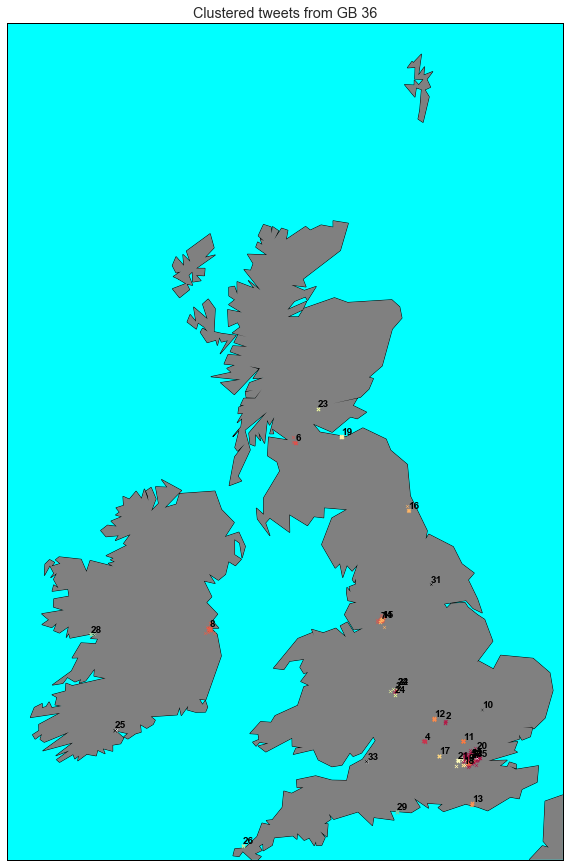

In [43]:
#Method1
import random
import time
import cProfile

time_weight = 0.03
loc_weight = 0.06
text_weight =  2.3 #2.5
set_size = 1000
minpts = 4
eps=1
dimensions = 52

listOfDifferentSizes = [5000]

#set seed for sample
seed = 118
random.seed(seed)
#seeds = [22, 23, 24, 25, 26]
experiment_descriptor = "method1_datasize"
print("The current seed is: " + str(seed) + ".")
print(" ")

for set_size in listOfDifferentSizes:
        
        rindex =  np.array(random.sample(range(len(df3)), set_size))
        sampleForMethod1 = df3.ix[rindex]

        #wordembeddings have to be separately picked
        we = df3.AvgWordEmbeddings.ix[rindex]
        #sampleForMethod1 = df3.sample(n=set_size, random_state=seed)
        
        start = time.time()

        labelsMethod1 = method1(sampleForMethod1, we.values, minpts)
        timePassed = time.time() - start
        print("Set size " + str(set_size) + " took: " + str(timePassed) + " secs. ")

        make_the_Cluster_Eval(labelsMethod1, sampleForMethod1, meth=1, sample_size=set_size, seed_no=seed, timePassed=timePassed, experiment_descriptor=experiment_descriptor, minpts=minpts)
        print(" ")

        #m1_prof()
#profilingFile = "/Users/fabian/Dropbox/Warwick/Dissertation/Mining-Twitter/profiling_results.txt"
#cProfile.run("m1_prof()", profilingFile)

In [ ]:
import pstats
p = pstats.Stats(profilingFile)

p.strip_dirs().sort_stats(-1).print_stats()
p.strip_dirs().sort_stats('time').print_stats(15)

print(list(df3.latitude[:15]), end="")

In [ ]:
import timeit
from geopy.distance import great_circle, vincenty
from scipy.spatial.distance import euclidean

times_test = range(1, 200000, 20000)
euc = []
grea = []
vinc = []
ts = []
cosi = []

plt.gca().set_color_cycle(['red', 'green', 'blue', 'yellow', 'grey'])

for t in times_test:
    euc.append(timeit.timeit('euclidean((53.343303000000006, -6.3001769999999997), (51.507114860000001, -0.12731804999999999))', number=t, setup="from scipy.spatial.distance import euclidean"))

    grea.append(timeit.timeit('great_circle((53.343303000000006, -6.3001769999999997), (51.507114860000001, -0.12731804999999999)).km', number=t, setup="from geopy.distance import great_circle"))

    vinc.append(timeit.timeit('vincenty((53.343303000000006, -6.3001769999999997), (51.507114860000001, -0.12731804999999999)).km', number=t, setup="from geopy.distance import vincenty"))

    cosi.append(timeit.timeit('cosine((53.343303000000006, -6.3001769999999997), (51.507114860000001, -0.12731804999999999))', number=t, setup="from scipy.spatial.distance import cosine"))

    ts.append(timeit.timeit('abs(datetime.fromtimestamp(1466366529).day - datetime.fromtimestamp(1467376528).day)', number=t, setup="from datetime import datetime, date"))
    
    print(str(t) + " is done")

plt.plot(times_test, euc, marker='o', linestyle='--')
plt.plot(times_test, grea, marker='o', linestyle='--')
plt.plot(times_test, vinc, marker='o', linestyle='--')
plt.plot(times_test, cosi, marker='o', linestyle='--')
plt.plot(times_test, ts, marker='o', linestyle='--')

plt.legend(['Euclidean', 'Great_Circle', 'Vincenty', 'Cosine', 'Time_stamp'], loc='upper left')
plt.ylabel('Runtime (s)')
plt.xlabel('Number of Repetitions')

plt.show()
#abs((datetime.fromtimestamp(a[3]) - datetime.fromtimestamp(b[3])).days + 1)

#print(timeit.timeit('euclidean((53.34, -6.30), (51.50, -0.12))', number=100000, setup="from scipy.spatial.distance import euclidean"))

#print(timeit.timeit('great_circle((53.34, -6.30), (51.50, -0.12)).km', number=100000, setup="from geopy.distance import great_circle"))

#print(timeit.timeit('vincenty((53.34, -6.30), (51.50, -0.12)).km', number=100000, setup="from geopy.distance import vincenty"))

#print(datetime.fromtimestamp(1467376528).day - datetime.fromtimestamp(1466366529).day)
#print(datetime.fromtimestamp(1467376528) )

#print(great_circle((53.343303000000006, -6.3001769999999997), (51.507114860000001, -0.12731804999999999)).km)
#print(great_circle((53.3, -6.3), (51.5, -0.1)).km)

#float16

#print(great_circle((53.343303000000006, -6.3001769999999997), (51.507114860000001, -0.12731804999999999)).km)
#print(great_circle((53.34, -6.3), (51.5, -0.12)).km)

#print(euclidean((53.343303000000006, -6.3001769999999997), (51.507114860000001, -0.12731804999999999)))
#print(euclidean((53.34, -6.3), (51.5, -0.12)))

#print(vincenty((53.343303000000006, -6.3001769999999997), (51.507114860000001, -0.12731804999999999)).km)
#print(vincenty((53.34, -6.3), (51.5, -0.12)).km)

In [ ]:
sampleForMethod1

# Method 2: Stepwise aggregation

# Method 2

In [24]:
#custom distance function ftw
from scipy.spatial.distance import cosine

#0 is lat, 1 is long, 3 is time, 4 to end is word embedding. Variable number of dimensions of word embeddings possible
def d2(a,b):
    return (cosine(a, b) * 4) #text_weight

In [25]:
from geopy.distance import great_circle

def d3(a, b):
    return (great_circle((a[0], a[1]), (b[0], b[1])).km * 0.8) #_location weight

In [26]:
#the other method
def method2_location(dataframe, minpts, eps):
    #make feature array from subset
    start = time.time()
    
    #firstN = 500
    columns = ["longitude","latitude"]
    
    #take sample of day
    features = dataframe[list(columns)].values
    
    #run DBSCAN on just coordinates using euclidean distance
    dbmodel = DBSCAN(eps=eps, min_samples=minpts, metric=d3, algorithm='ball_tree')
    db = dbmodel.fit(features)
    end = time.time()
    
    #dailyTweets
    print(str(dataframe.index.day[0]) + " day clustered by region. The passed time is: " + str(end-start))    #str(dataframe.index.day[0]) + 
    
    return db.labels_

Begin Analysis for day 1
1 day clustered by region. The passed time is: 6.610272169113159
labelsMethod2_loc: 1000
start calculating
start calculating
1. Cluster, with 25 tweets, 25 distinct users.
This cluster is from:01.07.2016 to: 01.07.2016
 
(51.507498232799989, -0.1273264996)
Location:  London,  Greater London
Most similar words:
['london', 'kilburn', 'hoxton', 'waterloo', 'bermondsey', 'chiswick', 'queensway', 'kensington', 'londra', 'brunel']
 
The most freq. words are: 
[   ('london', 38),
    ('greater', 11),
    ('station', 4),
    ('street', 3),
    ('#london', 3),
    ('bridge', 2),
    ('westminster', 2),
    ('ben', 2),
    ('circus', 2),
    ('palace', 2)]
 
[   "UCOD @ London King's Cross Station https://t.co/IyWtdQRXks",
    "I'm at King's College London - Waterloo Campus - @kingscollegelon in "
    'London, Greater London https://t.co/qd4tG7iQ7X',
    "I'm at London - @visitlondon in London, Greater London "
    'https://t.co/IgV89CQ3Lm',
    '🍧🍨🍦 @ Zizzi Wigmore Stre

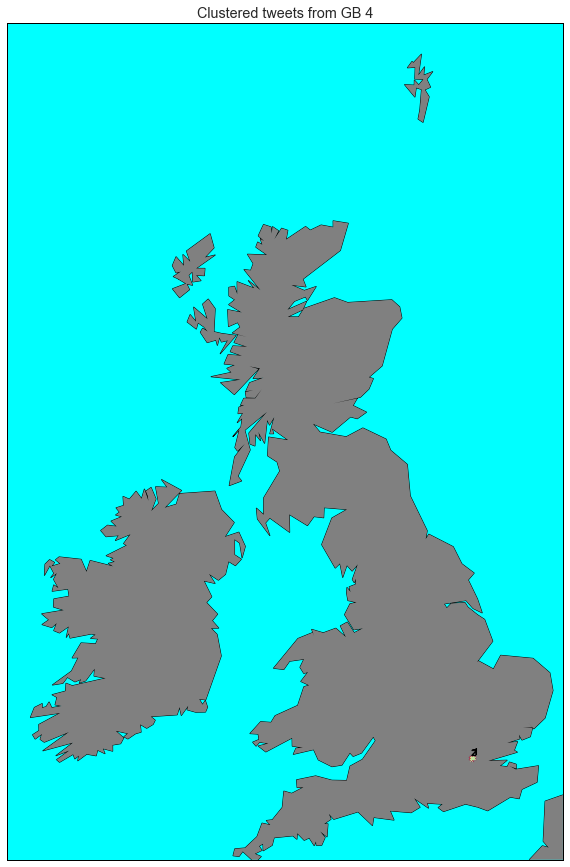

Making the Map took: 1.392625093460083
start calculating
There were 6 out of 17 Tweets that were clustered as noise
This is 35.2941176471%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.5807549953460693
start calculating
There were 9 out of 13 Tweets that were clustered as noise
This is 69.2307692308%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.6603240966796875
There were 640 Tweets that were clustered as noise
Seed: 50
1 Day  took Method 2: 11.237880945205688


Begin Analysis for day 2
2 day clustered by region. The passed time is: 6.793360948562622
labelsMethod2_loc: 1000
start calculating
start calculating
1. Cluster, with 12 tweets, 11 distinct users.
This cluster is from:02.07.2016 to: 02.07.2016
 
(51.558303407499999, -0.28024710166666672)
Location:  London,  Greater London
Most similar words:
['wembley', '#formationworldtour', '#beyoncewembley', '#theformationworl

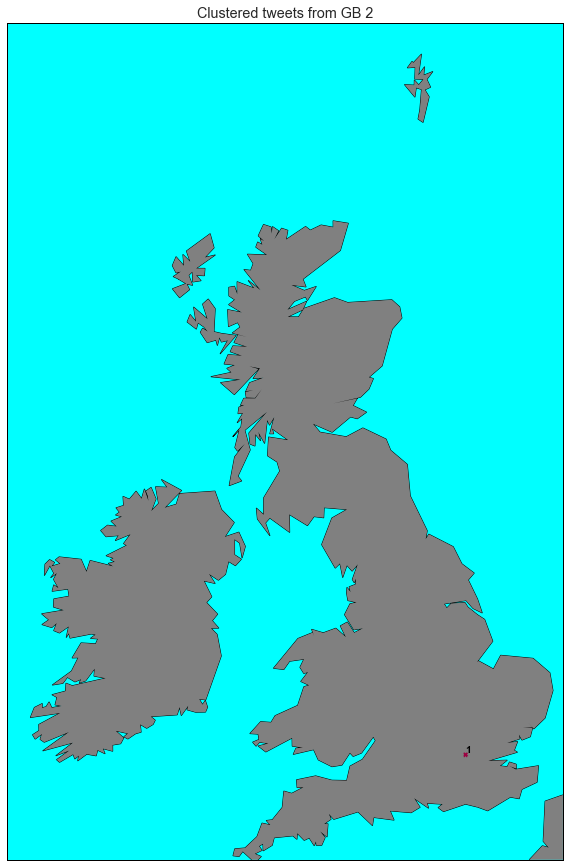

Making the Map took: 1.5251359939575195
start calculating
1. Cluster, with 10 tweets, 10 distinct users.
This cluster is from:02.07.2016 to: 02.07.2016
 
(51.507114860000001, -0.12731804999999999)
Location:  London,  Greater London
Most similar words:
['united…', 'kingdom', 'coya', '🇬🇧💕', 'kingdom/', 'brockely', 'central…', 'spinningfields', '#whenlondoniscalling', 'wework']
 
The most freq. words are: 
[   ('london', 11),
    ('kingdom', 10),
    ('united', 10),
    ('house', 1),
    ('👼🏾🙌🏾😎', 1),
    ('venice', 1),
    ('little', 1),
    ('adios', 1),
    ('#briandecarvalho', 1),
    ('fabulous', 1)]
 
[   '@onedirection 💚 #history1d @ London, United Kingdom '
    'https://t.co/EMLXVlo5Pf',
    'BTS... #malefashion #londonfashion #briandecarvalho @ London, United '
    'Kingdom https://t.co/co7vQWqmeZ',
    'Little Venice 💙 @ London, United Kingdom https://t.co/KKve1g4Tp9',
    'Just posted a photo @ London, United Kingdom https://t.co/FObbI9aVqU',
    'So true! 👼🏾🙌🏾😎 #july #summerba

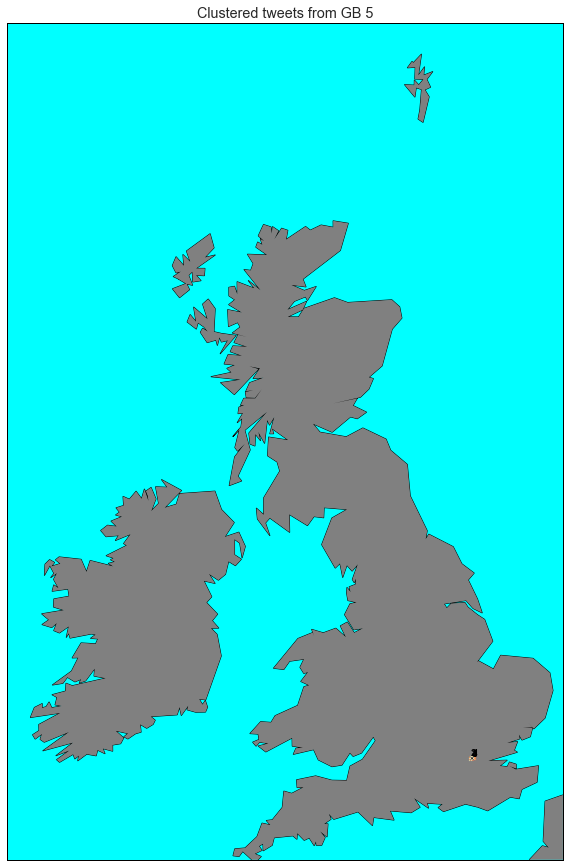

Making the Map took: 1.605159044265747
start calculating
1. Cluster, with 5 tweets, 5 distinct users.
This cluster is from:02.07.2016 to: 02.07.2016
 
(51.434559551999996, -0.213873112)
Location:  London,  Greater London
Most similar words:
['wimbledon', '#wimbledon', 'wimbledons', 'mens', '#wimbeldon', '#wimbledonfinals', 'wimbeldon', '#wimbledonfinal', '🎾🎾🎾', '#tennis']
 
The most freq. words are: 
[   ('wimbledon', 8),
    ('championships', 3),
    ('#wimbledon', 2),
    ('catching', 1),
    ('#vamosjuan…', 1),
    ('#dontfuckitup', 1),
    ('#delpo', 1),
    ('🎧🎤🎪🎼💃🏾💃🏾', 1),
    ('#rogerfeder', 1),
    ('night', 1)]
 
[   'Catching up with friends @wimbledon ❤️ @ The Championships, Wimbledon '
    'https://t.co/L1JRrTHqzL',
    'Wimbledon!!! 🙌🙌🙌🎾🎾🎾🏆🏆🏆 #wimbledon2016 #championship #delpo #delpotro '
    '#delpotrow #vamosjuan… https://t.co/KVmr9PFfQN',
    'Oh what a night 🎧🎤🎪🎼💃🏾💃🏾 @ The Championships, Wimbledon '
    'https://t.co/5mJlgvjL1M',
    'In Wimbledon but not at Wimbledon

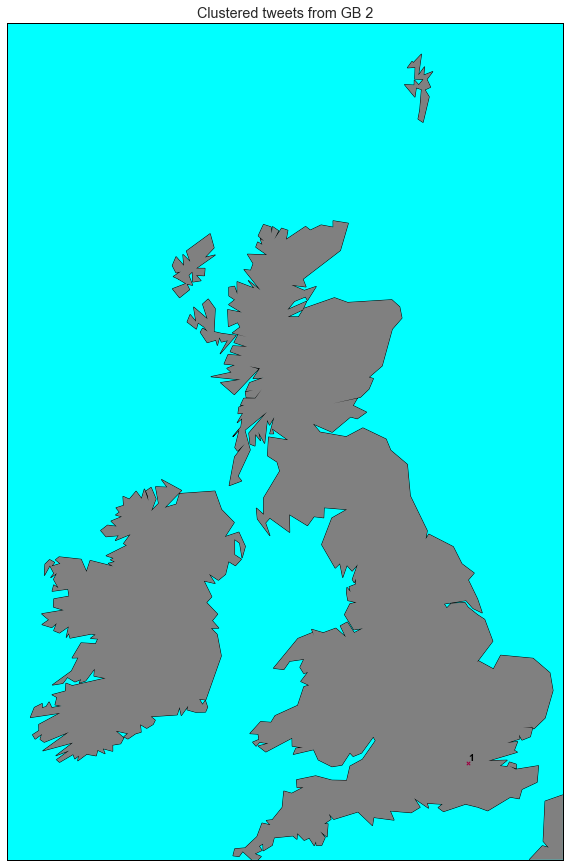

Making the Map took: 1.1597859859466553
start calculating
1. Cluster, with 5 tweets, 5 distinct users.
This cluster is from:02.07.2016 to: 02.07.2016
 
(51.503707387999995, -0.018871741999999997)
Location:  London,  Greater London
Most similar words:
['wharf', 'canary', 'escapee', 'oxo', '#thisislondon', '#londoneye', 'picturehouse', '#londonlife', '#rooftop', 'marylebone']
 
The most freq. words are: 
[   ('wharf', 6),
    ('canary', 6),
    ('london', 4),
    ('photo', 1),
    ('posted', 1),
    ('sports', 1),
    ('reebok', 1),
    ('#icanseearainbow', 1),
    ('club', 1),
    ('#wheresthegoldenpot', 1)]
 
[   'Laaaaandan 🇬🇧 @ Hilton London Canary Wharf https://t.co/eYJEuTMMR5',
    "I'm at Reebok Sports Club in Canary Wharf, London https://t.co/vbjta56zXU",
    'Just posted a photo @ London Canary Wharf https://t.co/o4s9zvvYRH',
    '#icanseearainbow #wheresthegoldenpot #canarywharf @ London Canary Wharf '
    'https://t.co/IQ36ICSymX',
    'Picture of Canary Wharf pt 3 or 4 or 5. 

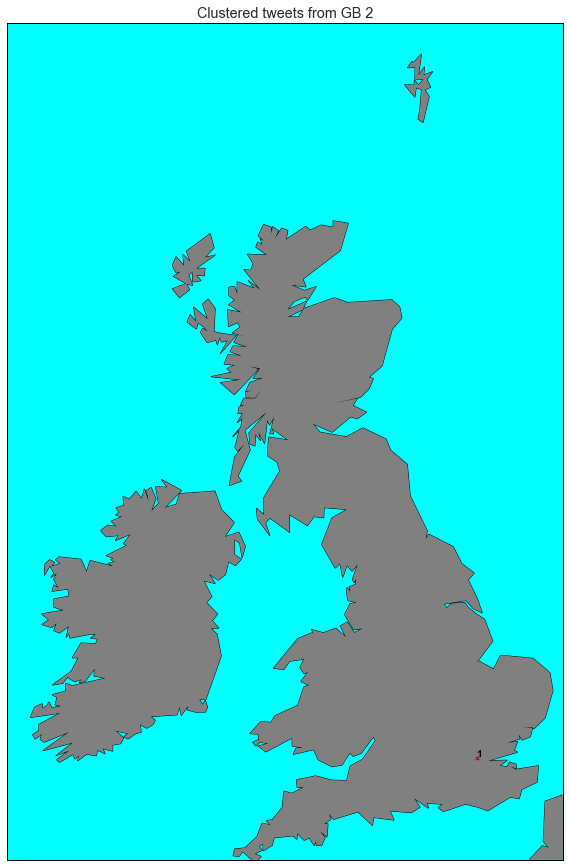

Making the Map took: 1.1079111099243164
There were 682 Tweets that were clustered as noise
Seed: 50
2 Day  took Method 2: 13.985191106796265


Begin Analysis for day 3
3 day clustered by region. The passed time is: 7.7126829624176025
labelsMethod2_loc: 1000
start calculating
start calculating
1. Cluster, with 21 tweets, 20 distinct users.
This cluster is from:03.07.2016 to: 03.07.2016
 
(51.557046445714278, -0.28002166952380947)
Location:  London,  Greater London
Most similar words:
['wembley', '#formationworldtour', '#beyonce', '#beyoncewembley', '#beyoncé', '#beyoncemanchester', '#theformationworldtour', 'stadium', '#queenbey', 'beyonce']
 
The most freq. words are: 
[   ('wembley', 19),
    ('stadium', 18),
    ('#formationworldtour', 9),
    ('#beyonce', 6),
    ('beyoncé', 4),
    ('beyonce', 4),
    ('world', 3),
    ('#formation', 3),
    ('queen', 3),
    ('#wembley', 3)]
 
[   'We slay all day #Beyonce #formationworldtour #vip #lemonade #superhuman '
    '💁🏽🍋🙌🏾 @ Beyoncé… http

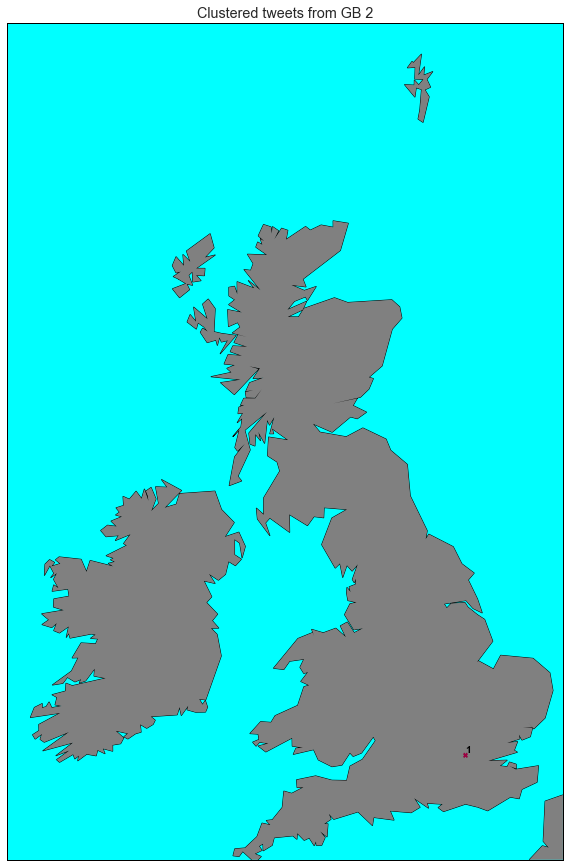

Making the Map took: 1.1679580211639404
start calculating
1. Cluster, with 10 tweets, 10 distinct users.
This cluster is from:03.07.2016 to: 03.07.2016
 
(51.507114860000001, -0.12731804999999999)
Location:  London,  Greater London
Most similar words:
['kingdom', 'united…', 'coya', '🇬🇧💕', 'kingdom/', 'brockely', '#whenlondoniscalling', 'central…', '#brighton…', 'wework']
 
The most freq. words are: 
[   ('london', 11),
    ('kingdom', 10),
    ('united', 10),
    ('#london', 3),
    ('#londra', 1),
    ('interesting', 1),
    ('eye', 1),
    ('last', 1),
    ('soya', 1),
    ('🔜🎶🎵💃🏻', 1)]
 
[   'London Eye 😍🎡🇬🇧 @ London, United Kingdom https://t.co/uXexgupifE',
    '#home #London ✈️ @ London, United Kingdom https://t.co/McTvSmRata',
    '🇬🇧 @ London, United Kingdom https://t.co/2rY6MQbUUy',
    'Soya matcha latte ... Interesting @ London, United Kingdom '
    'https://t.co/XqpAwk4wRS',
    '#london #londra @ London, United Kingdom https://t.co/5a5O5pr2CR',
    'One week! 🔜🎶🎵💃🏻 @ London

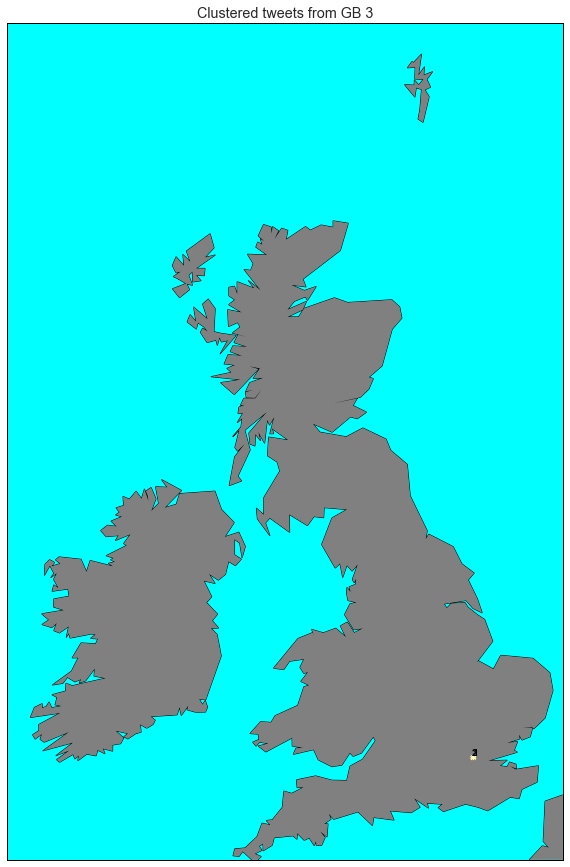

Making the Map took: 1.312842845916748
start calculating
1. Cluster, with 8 tweets, 8 distinct users.
This cluster is from:03.07.2016 to: 03.07.2016
 
(51.507683297500009, -0.15896595875)
Location:  London,  Greater London
Most similar words:
['hyde', '#britishsummertime', '#bst', 'bsthydepark', '#bsthydepark', '#britishsummertimehydepark', '#hydepark', '#takethat', '#steviewonder', 'hyde…']
 
The most freq. words are: 
[   ('hyde', 9),
    ('park', 8),
    ('british', 3),
    ('summer', 2),
    ('king', 2),
    ('summertime', 2),
    ('sun', 2),
    ('carole', 2),
    ('#hydepark', 2),
    ('british…', 2)]
 
[   'Waiting for Carole King in Hyde Park. Beers and sun. @ Hyde Park - '
    'British Summertime https://t.co/zJtHQcANCQ',
    '#Paradisia just offstage #HydePark going to watch #michaelkiwanuka now @ '
    'Hyde Park - British… https://t.co/mfBJmX40TB',
    'Florence preaching kindness and loving each other❤️💛💚💙💜 @ Hyde Park… '
    'https://t.co/RNzoBnPb55',
    "Ahhhhh - that's

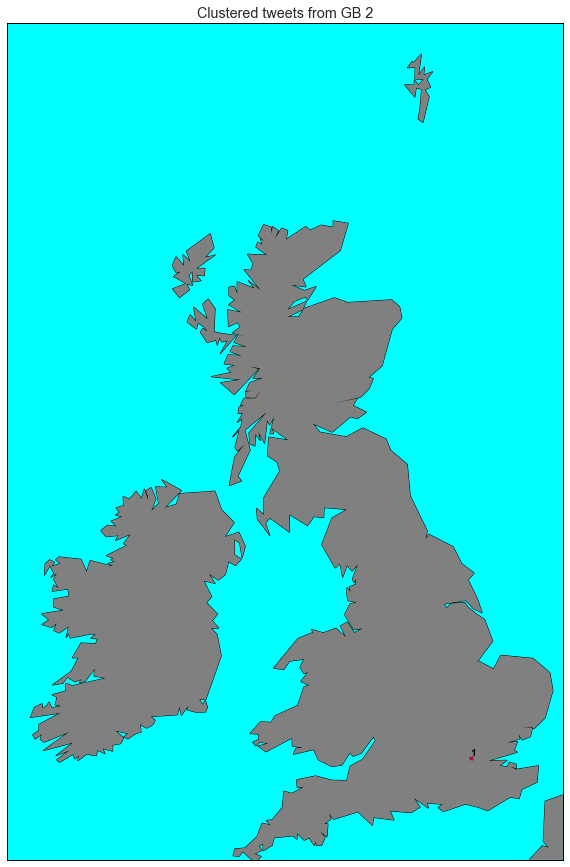

Making the Map took: 1.3361561298370361
start calculating
1. Cluster, with 7 tweets, 7 distinct users.
This cluster is from:03.07.2016 to: 03.07.2016
 
(51.434883491428572, -0.21378912714285714)
Location:  London,  Greater London
Most similar words:
['#wimbledon', 'wimbledon', '#wimbledonfinal', '#wimbledonfinals', '#wimbeldon', '#tennis', '🎾🎾🎾', 'wimbledons', 'mens', '#thehill']
 
The most freq. words are: 
[   ('wimbledon', 6),
    ('#wimbledon', 6),
    ('championships', 4),
    ('court', 2),
    ('centre', 2),
    ('sunday', 1),
    ('peoples', 1),
    ('#tennis…', 1),
    ('selfie', 1),
    ('#tsonga', 1)]
 
[   'Peoples Sunday 🎾. #courtnumber2 @courtnumbertwo #wimbledon #wimbledon2016 '
    '#tennis… https://t.co/qYIrh6SjqA',
    '🍑🍑 What a game @tsonga7 🇫🇷 #datass #wimbledon #tsonga @ 2016 Wimbledon '
    'Championships https://t.co/HuQsJujfcW',
    '#MiddleSunday #Wimbledon #centrecourt @ Wimbledon https://t.co/NdYJLm2OR5',
    '#wimbledon2016 @ 2016 Wimbledon Championships htt

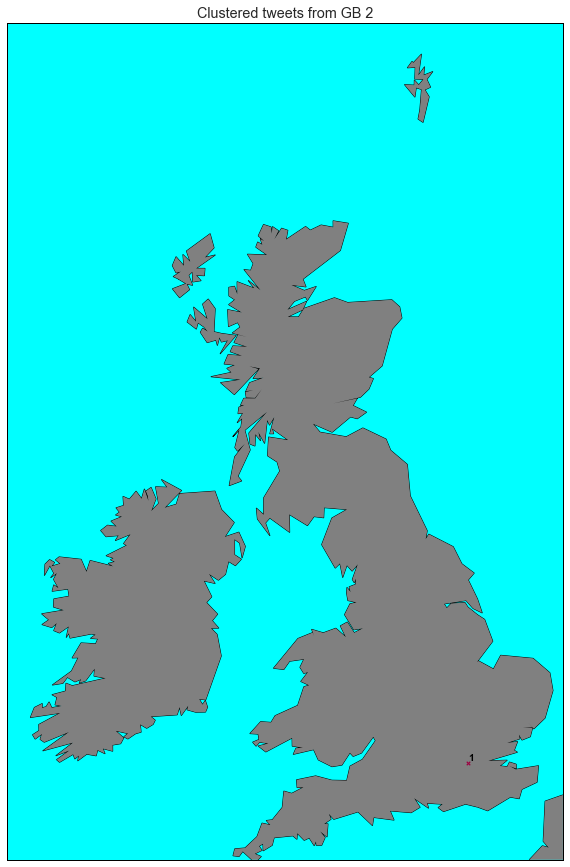

Making the Map took: 1.2850210666656494
There were 687 Tweets that were clustered as noise
Seed: 50
3 Day  took Method 2: 13.974801063537598


Begin Analysis for day 4
4 day clustered by region. The passed time is: 6.012239933013916
labelsMethod2_loc: 1000
start calculating
start calculating
1. Cluster, with 10 tweets, 10 distinct users.
This cluster is from:04.07.2016 to: 04.07.2016
 
(51.434425988000001, -0.21412233)
Location:  London,  Greater London
Most similar words:
['wimbledon', '#wimbledon', '#wimbledonfinals', '#wimbledonfinal', '#wimbeldon', '🎾🎾🎾', '#tennis', 'wimbledons', 'wimby', 'mens']
 
The most freq. words are: 
[   ('wimbledon', 9),
    ('championships', 5),
    ('#wimbledon', 5),
    ('court', 2),
    ('tsonga', 1),
    ('championships…', 1),
    ('ever', 1),
    ('#gatsbyclub', 1),
    ('wimby', 1),
    ('pimms', 1)]
 
[   'Fists game Navarro #wimbledon #venuswilliams @ The Championships, '
    'Wimbledon https://t.co/uOEnfhUs5S',
    '"This is the most British thin

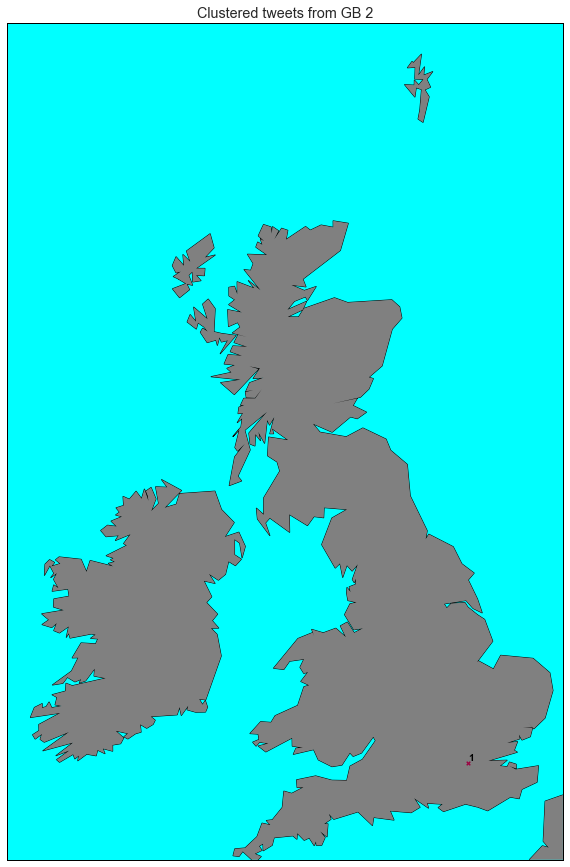

Making the Map took: 1.252155065536499
start calculating
1. Cluster, with 46 tweets, 43 distinct users.
This cluster is from:04.07.2016 to: 04.07.2016
 
(51.508418714565245, -0.12943810565217398)
Location:  London,  Greater London
Most similar words:
['london', 'bermondsey', 'hoxton', 'wework', 'aldgate', 'svitzer', 'thisonesart', 'united…', 'chiswick', 'skyline']
 
The most freq. words are: 
[   ('london', 58),
    ('greater', 19),
    ('kingdom', 13),
    ('united', 13),
    ('#london', 5),
    ('street', 4),
    ('posted', 4),
    ('soho', 3),
    ('bridge', 3),
    ('photo', 3)]
 
[   "I'm at @OxfordStreet in London, Greater London https://t.co/IF41ppFXiS",
    'Trails over rails @ London, United Kingdom https://t.co/gVqcuO7bWL',
    'Just posted a video @ Leicester Square London https://t.co/G3YoJ22PWL',
    "I'm at French House in London, Greater London https://t.co/fgqbqiUyJy",
    'New business beer (@ Duke of Wellington in Soho, Greater London) '
    'https://t.co/QNENSK3a0M',

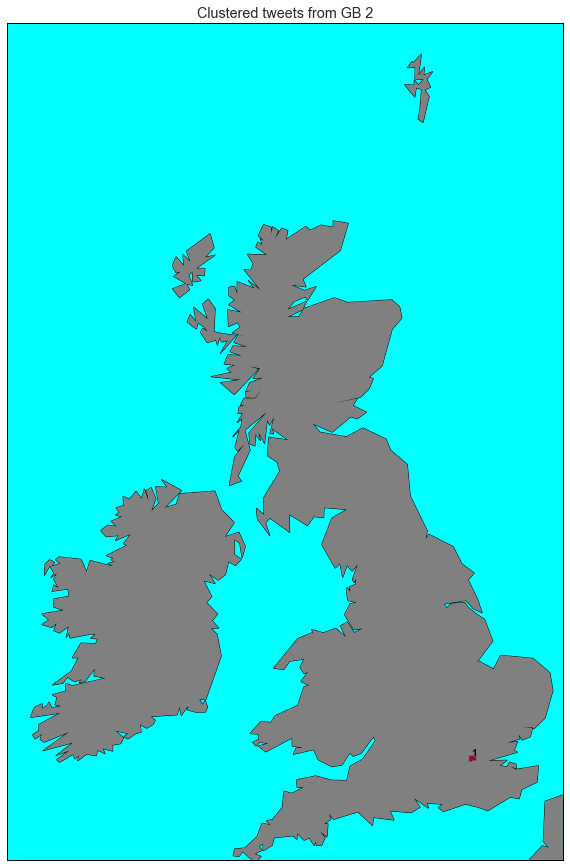

Making the Map took: 2.6424529552459717
start calculating
1. Cluster, with 9 tweets, 9 distinct users.
This cluster is from:04.07.2016 to: 04.07.2016
 
(51.556204806666663, -0.28035754888888886)
Location:  London,  Greater London
Most similar words:
['wembley', '#formationworldtour', '#beyoncewembley', 'beyonce', 'stadium', '#beyonce', '#beyoncemanchester', 'beyoncé', '#queenbey', '#theformationworldtour']
 
The most freq. words are: 
[   ('stadium', 8),
    ('wembley', 8),
    ('beyoncé', 3),
    ('#formationworldtour', 3),
    ('formation', 2),
    ('world', 2),
    ('#beyonce', 2),
    ('tour', 2),
    ('😂#beyoncé', 1),
    ('#formationtour', 1)]
 
[   'Queen Bey 🐝 @ Wembley Stadium https://t.co/OfRVlj3Buj',
    'Standard stadium selfie! #beyonce #formationtour🐝 @ Wembley Stadium '
    'https://t.co/qYC2GaNkmI',
    '#formationtour #beyoncé #slay @ Beyoncé Formation World Tour London '
    'Wembley 2nd July 2016 https://t.co/H5Hi3qcJrO',
    '#formationworldtour 🐝👯👯 @ Wembley Stadiu

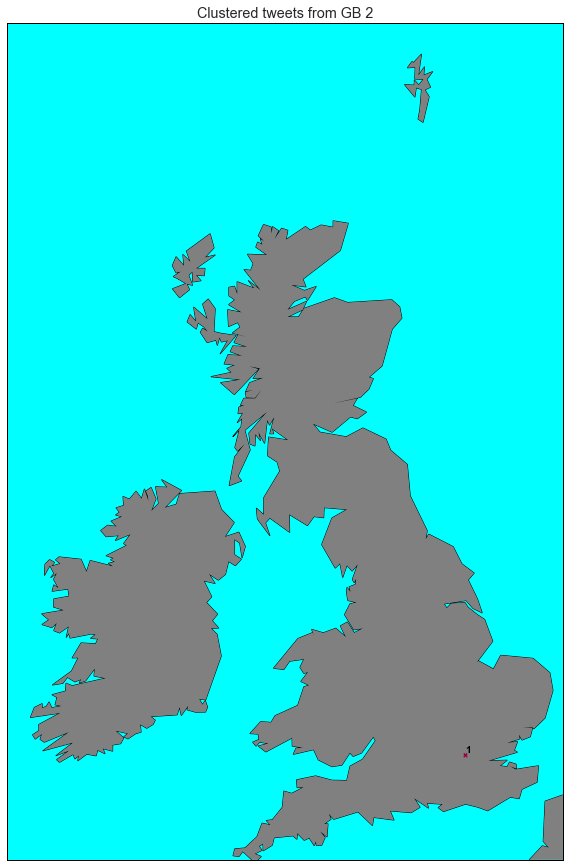

Making the Map took: 1.2242670059204102
start calculating
There were 3 out of 8 Tweets that were clustered as noise
This is 37.5%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.6276190280914307
start calculating
There were 2 out of 9 Tweets that were clustered as noise
This is 22.2222222222%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.6268110275268555
There were 682 Tweets that were clustered as noise
Seed: 50
4 Day  took Method 2: 14.090394973754883


Begin Analysis for day 5
5 day clustered by region. The passed time is: 6.963170051574707
labelsMethod2_loc: 1000
start calculating
start calculating
1. Cluster, with 11 tweets, 11 distinct users.
This cluster is from:05.07.2016 to: 05.07.2016
 
(51.507114860000001, -0.12731804999999999)
Location:  London,  Greater London
Most similar words:
['kingdom', 'united…', 'coya', 'kingdom/', '🇬🇧💕', 'brockely', 'central…', 'kindom'

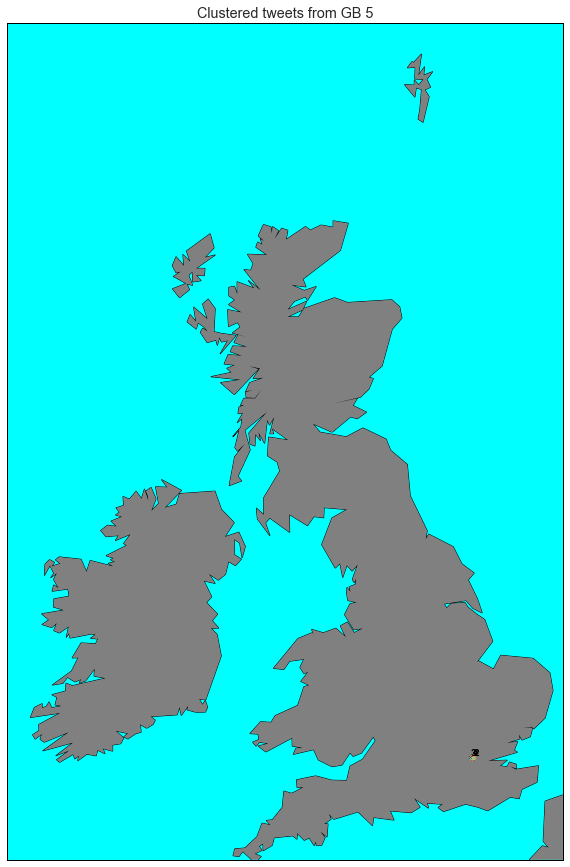

Making the Map took: 1.8450109958648682
start calculating
There were 2 out of 15 Tweets that were clustered as noise
This is 13.3333333333%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.6201040744781494
start calculating
There were 2 out of 16 Tweets that were clustered as noise
This is 12.5%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.5884718894958496
There were 639 Tweets that were clustered as noise
Seed: 50
5 Day  took Method 2: 11.682790040969849


Begin Analysis for day 6
6 day clustered by region. The passed time is: 6.222679138183594
labelsMethod2_loc: 1000
start calculating
start calculating
1. Cluster, with 29 tweets, 28 distinct users.
This cluster is from:06.07.2016 to: 06.07.2016
 
(51.510860900689643, -0.12673295655172415)
Location:  London,  Greater London
Most similar words:
['london', 'hoxton', 'waterloo', 'marylebone', 'kensington', 'kilburn', 'brunel'

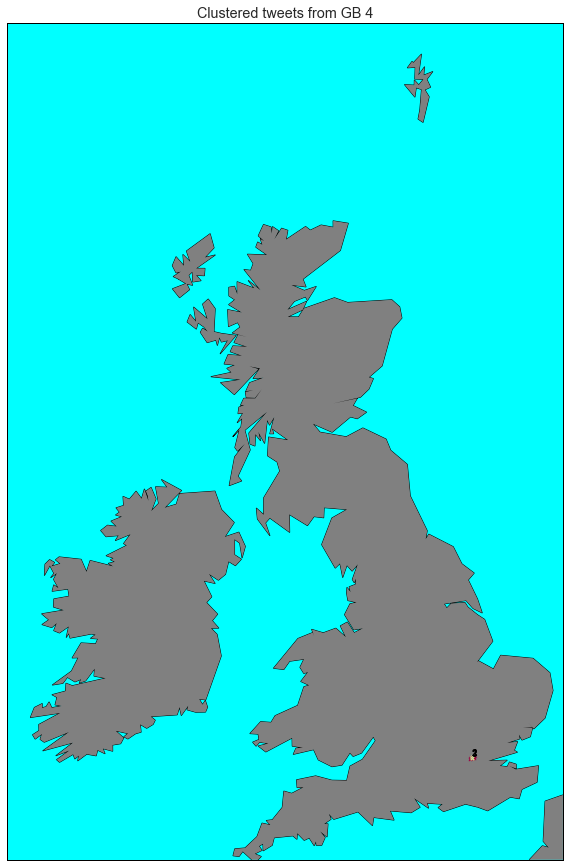

Making the Map took: 1.385565996170044
start calculating
There were 4 out of 14 Tweets that were clustered as noise
This is 28.5714285714%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.537114143371582
start calculating
1. Cluster, with 16 tweets, 16 distinct users.
This cluster is from:06.07.2016 to: 06.07.2016
 
(53.457024135624998, -2.2868285218750004)
Location:  Greater Manchester,  North West England
Most similar words:
['trafford', 'wembley', 'emirates', '#formationworldtour', 'trafford…', '#beyonce', '#beyoncé', 'etihad', 'stadium', 'old…']
 
The most freq. words are: 
[   ('old', 11),
    ('cricket', 10),
    ('ground', 10),
    ('trafford', 10),
    ('#formationworldtour', 6),
    ('emirates', 6),
    ('last', 6),
    ('#beyonce', 5),
    ('night', 5),
    ('beyonce', 3)]
 
[   'Last night was beyond words 🎤 beyonce #formationtour @ Emirates Old '
    'Trafford Cricket Ground https://t.co/csij3n0p7p',
    'YONCÉ @ Emirat

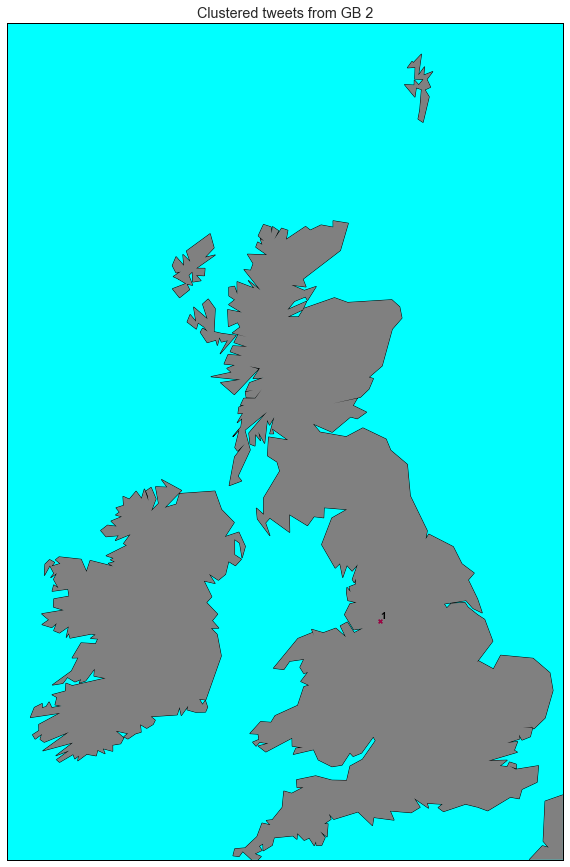

Making the Map took: 1.5605781078338623
start calculating
There were 8 out of 13 Tweets that were clustered as noise
This is 61.5384615385%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.6104600429534912
start calculating
1. Cluster, with 4 tweets, 4 distinct users.
This cluster is from:06.07.2016 to: 06.07.2016
 
(55.952500000000001, -3.1724999999999999)
Location:  Abbeyhill,  City of Edinburgh
Most similar words:
['palace', 'sarayı', 'holyrood', 'holyroodhouse', 'nsc', 'buckingham', 'palacio', 'holloway', 'caledonia', 'barbon']
 
The most freq. words are: 
[   ('palace', 5),
    ('holyrood', 4),
    ('guard', 1),
    ('heli', 1),
    ('innit', 1),
    ('gaf', 1),
    ('lizs', 1),
    ('#princeeddy', 1),
    ('#summer', 1),
    ('gold', 1)]
 
[   'Changing the guard #edinburgh #summer #queenishome👑 @ Holyrood Palace '
    'https://t.co/EDK5CRCN2e',
    "Liz's gaf #gardenparty @ Holyrood Palace https://t.co/IwHBxv2IWl",
    'I wa

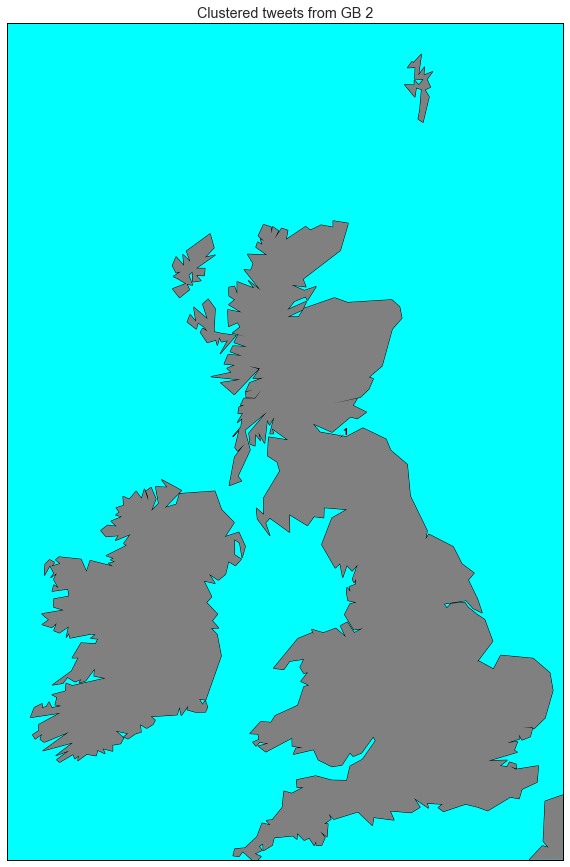

Making the Map took: 1.8611249923706055
start calculating
1. Cluster, with 9 tweets, 8 distinct users.
This cluster is from:06.07.2016 to: 06.07.2016
 
Location: N/A
Most similar words:
['#wimbledon', 'wimbledon', '#wimbledonfinals', '#wimbledonfinal', '🎾🎾🎾', '#wimbeldon', 'wimbledons', '#backthebrits', '#andymurray', '#murray']
 
The most freq. words are: 
[   ('#wimbledon', 8),
    ('wimbledon', 8),
    ('championships', 5),
    ('hill', 1),
    ('cilic', 1),
    ('top', 1),
    ('#djokovic', 1),
    ('federer', 1),
    ('win', 1),
    ('luck', 1)]
 
[   'Congratulations to Roger Federer on his comeback win against Marin Cilic '
    'in the Wimbledon… https://t.co/30jC1NG6tm',
    '#djokovic #wimbledon2016 @ Wimbledon https://t.co/4dN6XALNyd',
    '☀️🎾🍓🍾 #Wimbledon #finallyfeelslikesummer @ 2016 Wimbledon Championships '
    'https://t.co/LKMZ3wx22C',
    '#wimbledon2016 #nickkyrgios @ Wimbledon https://t.co/D60uVnxqQy',
    'Get a move on Muzza #CentreCourt #wimbledon #SW19 #Murray 

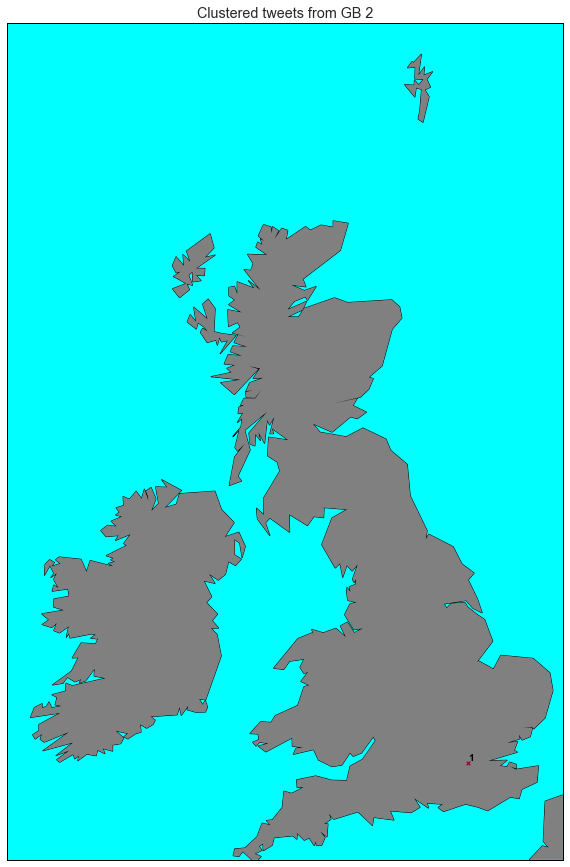

Making the Map took: 2.1458868980407715
start calculating
There were 2 out of 12 Tweets that were clustered as noise
This is 16.6666666667%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.6453969478607178
There were 618 Tweets that were clustered as noise
Seed: 50
6 Day  took Method 2: 16.96232509613037


Begin Analysis for day 7
7 day clustered by region. The passed time is: 6.018279075622559
labelsMethod2_loc: 1000
start calculating
start calculating
There were 5 out of 16 Tweets that were clustered as noise
This is 31.25%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.599869966506958
start calculating
1. Cluster, with 19 tweets, 18 distinct users.
This cluster is from:07.07.2016 to: 07.07.2016
 
(51.508280061578951, -0.12407761368421051)
Location:  London,  Greater London
Most similar words:
['#redbus', '#bondstreet', '#london', '#londres', '#london…', '🇬🇧💕', '#whenlondon

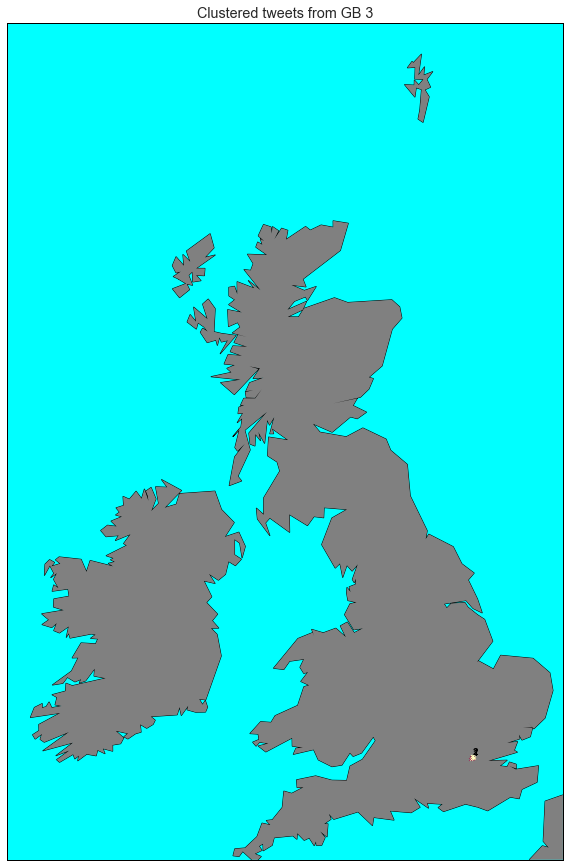

Making the Map took: 1.3490879535675049
start calculating
There were 2 out of 13 Tweets that were clustered as noise
This is 15.3846153846%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.5600790977478027
start calculating
There were 10 out of 15 Tweets that were clustered as noise
This is 66.6666666667%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.5931551456451416
start calculating
There were 1 out of 23 Tweets that were clustered as noise
This is 4.34782608696%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.6612629890441895
start calculating
1. Cluster, with 4 tweets, 4 distinct users.
This cluster is from:07.07.2016 to: 07.07.2016
 
(52.532174410000003, -1.85665006)
Location:  Birmingham,  West Midlands
Most similar words:
['hopefully', 'finish', 'knackered', 'early', 'work', 'shift', 'placement', 'tomorrow', '😴😴😴

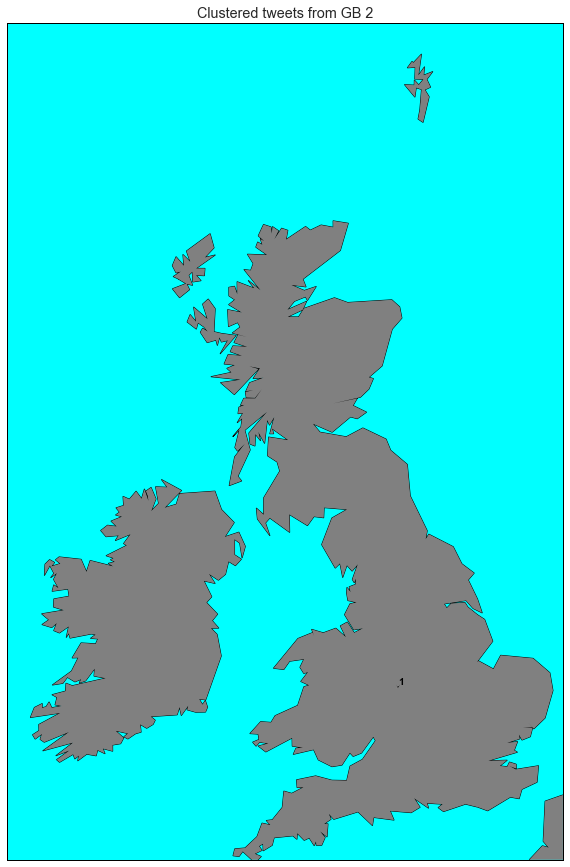

Making the Map took: 1.1377589702606201
There were 645 Tweets that were clustered as noise
Seed: 50
7 Day  took Method 2: 12.546846151351929


Begin Analysis for day 8
9 day clustered by region. The passed time is: 7.423795938491821
labelsMethod2_loc: 1000
start calculating
start calculating
1. Cluster, with 15 tweets, 14 distinct users.
This cluster is from:09.07.2016 to: 09.07.2016
 
(51.514619359333331, -0.11271784600000002)
Location:  London,  Greater London
Most similar words:
['london', 'hoxton', 'kilburn', 'waterloo', 'bermondsey', 'marylebone', 'chiswick', 'harringay', 'brunel', 'queensway']
 
The most freq. words are: 
[   ('london', 25),
    ('greater', 10),
    ('station', 3),
    ('palace', 2),
    ('marylebone', 2),
    ('bridge', 1),
    ('#toweroflondon', 1),
    ('last', 1),
    ('pub', 1),
    ('southwark', 1)]
 
[   "I'm at @OxfordStreet in London, Greater London w/ @hma48x "
    'https://t.co/DDTRRepJQt',
    "I'm at London Bridge Railway Station - @nationalrailenq i

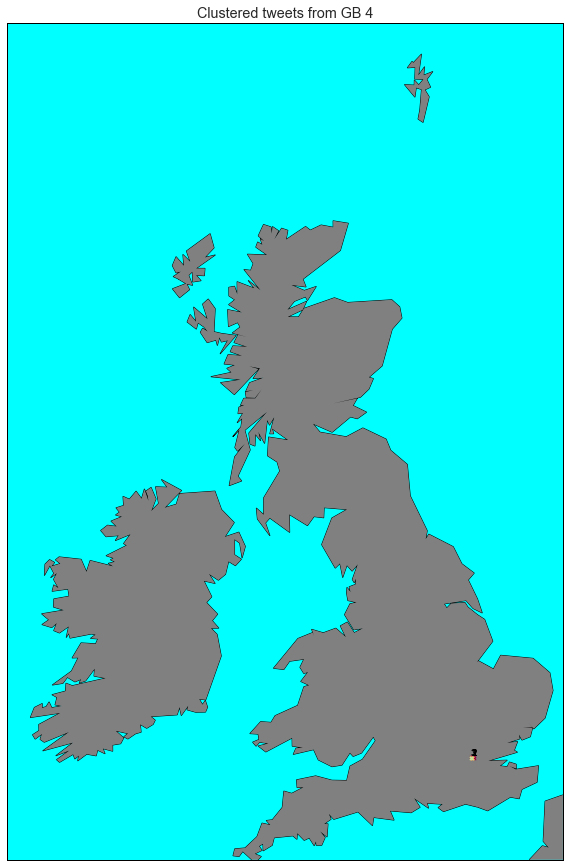

Making the Map took: 2.91473388671875
start calculating
1. Cluster, with 4 tweets, 4 distinct users.
This cluster is from:09.07.2016 to: 09.07.2016
 
(53.344579879999998, -6.26167563)
Location:  Dublin,  County Dublin
Most similar words:
['dublin', 'cork', 'glasgow', 'stillorgan', 'edinburgh', 'belfast', 'greenock', 'dub', 'malahide', '#dublin']
 
The most freq. words are: 
[   ('dublin', 5),
    ('ireland', 2),
    ('irelanded', 1),
    ('hot', 1),
    ('flyefit', 1),
    ('dublin☘', 1),
    ('date', 1),
    ('fresca', 1),
    ('time', 1),
    ('kettlebells', 1)]
 
[   'Ireland(ed) a hot date in Dublin☘ @ Dublin, Ireland '
    'https://t.co/8PthcZl6U1',
    'Time for the kettlebells (@ Flyefit in Dublin) https://t.co/bdCaVymKc9 '
    'https://t.co/rn7hDtTZcm',
    "I'm at Bachelor Inn in Dublin 1, Ireland https://t.co/cnvfC3pLJj",
    'Dublin Drinks with @JMurray2206 🍾🍹 @ Fresca Dublin '
    'https://t.co/oUnHRkCIk7']
 ------------- 
 
the eval list is: 
There were 14 out of 18 Tweets

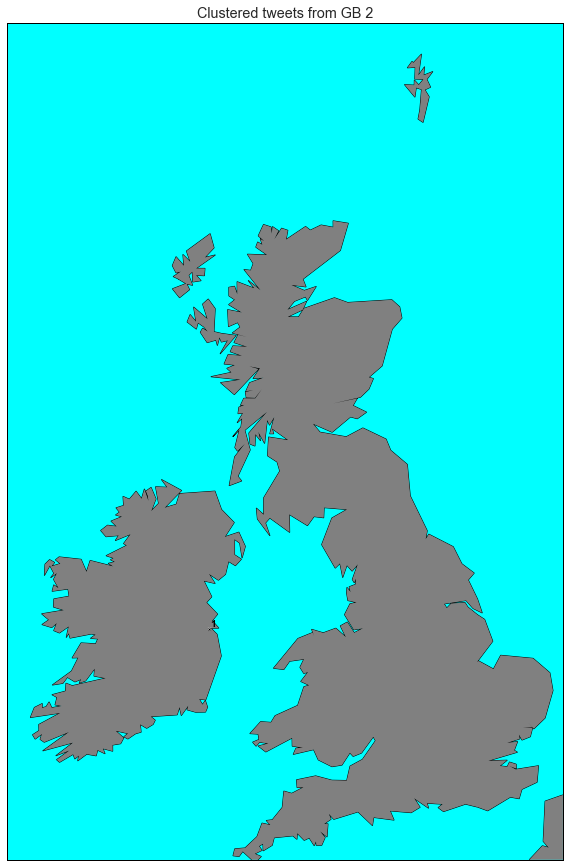

Making the Map took: 1.5406630039215088
start calculating
1. Cluster, with 4 tweets, 4 distinct users.
This cluster is from:09.07.2016 to: 09.07.2016
 
(51.402254550000002, -0.33367199999999997)
Location:  London,  Greater London
Most similar words:
['rhs', 'hampton', 'hampton…', 'flower', 'wisley', '#rhs', '#hamptoncourt', '#rhshampton', 'rhs…', '#rhshamptoncourt']
 
The most freq. words are: 
[   ('show', 4),
    ('flower', 4),
    ('rhs', 4),
    ('hampton', 4),
    ('court', 3),
    ('hamptoncourtpalace', 1),
    ('court…', 1),
    ('#royalhamptongardenshow', 1),
    ('#rhs', 1),
    ('#rhshamptoncourtflowershow', 1)]
 
[   'Storm trooper Sam scarecrow #rhshamptoncourtflowershow #starwars @ RHS '
    'Hampton Court Flower Show https://t.co/U5FuNutMuj',
    'Loving life at the flower show #plants #nature #flowers #hamptoncourt '
    '#rhs @ RHS Hampton Court… https://t.co/L8qny0Pjar',
    'Grow. #royalhamptongardenshow #grow @ RHS Hampton Court Flower Show '
    'https://t.co/JeRr6X

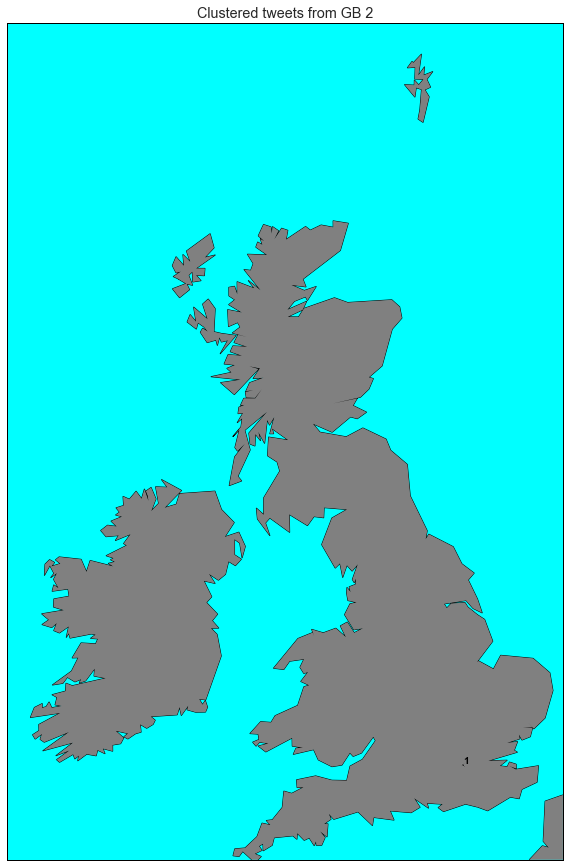

Making the Map took: 1.3164610862731934
There were 673 Tweets that were clustered as noise
Seed: 50
8 Day  took Method 2: 14.328176975250244


Begin Analysis for day 9
10 day clustered by region. The passed time is: 6.405623197555542
labelsMethod2_loc: 1000
start calculating
start calculating
1. Cluster, with 8 tweets, 8 distinct users.
This cluster is from:10.07.2016 to: 10.07.2016
 
(51.506940567499996, -0.13243078999999999)
Location:  London,  Greater London
Most similar words:
['#london', '#londonlife', '🇬🇧💕', '#london…', 'london', 'united…', 'dstrkt', 'coya', 'brockely', 'skyline']
 
The most freq. words are: 
[   ('london', 5),
    ('kingdom', 3),
    ('united', 3),
    ('snatch1', 2),
    ('minute', 2),
    ('somerset', 2),
    ('#london', 2),
    ('hyde', 1),
    ('#findingdory', 1),
    ('park', 1)]
 
[   'Happy Sunday to you all. #sundayservice @ London, United Kingdom '
    'https://t.co/zEryuNI9lm',
    'Food whisperer 🍴 @ London, United Kingdom https://t.co/KrjfCpao0D',
  

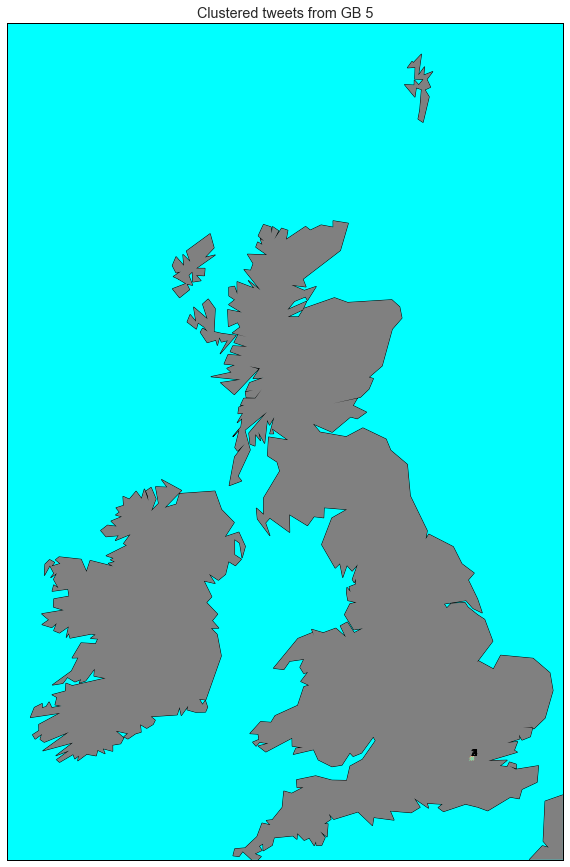

Making the Map took: 1.6819372177124023
start calculating
1. Cluster, with 5 tweets, 4 distinct users.
This cluster is from:10.07.2016 to: 10.07.2016
 
(51.433735551999995, -0.214063112)
Location:  London,  Greater London
Most similar words:
['wimbledon', '#wimbledon', 'championships', 'mens', '#wimbledonfinals', '#wimbledonfinal', 'wimbledons', '#wimbeldon', 'wimby', '🎾🎾🎾']
 
The most freq. words are: 
[   ('wimbledon', 5),
    ('championships', 4),
    ('murray', 2),
    ('centre', 2),
    ('court', 2),
    ('lighting', 1),
    ('came', 1),
    ('racquet', 1),
    ('light', 1),
    ('point', 1)]
 
[   '#wimbledon2016 @ The Championships, Wimbledon https://t.co/tOp3hD8kx0',
    'Windswept girlies 🎾 #thegang @ 2016 Wimbledon Championships '
    'https://t.co/CA3PhMj42C',
    'Centre Court lighting is NOT on point 🎾💡 @ The Championships, Wimbledon '
    'https://t.co/5UWZC2wWU8',
    'Andy Murray throws his racquet into the crowd after winning Wimbledon @ '
    'The Championships,… http

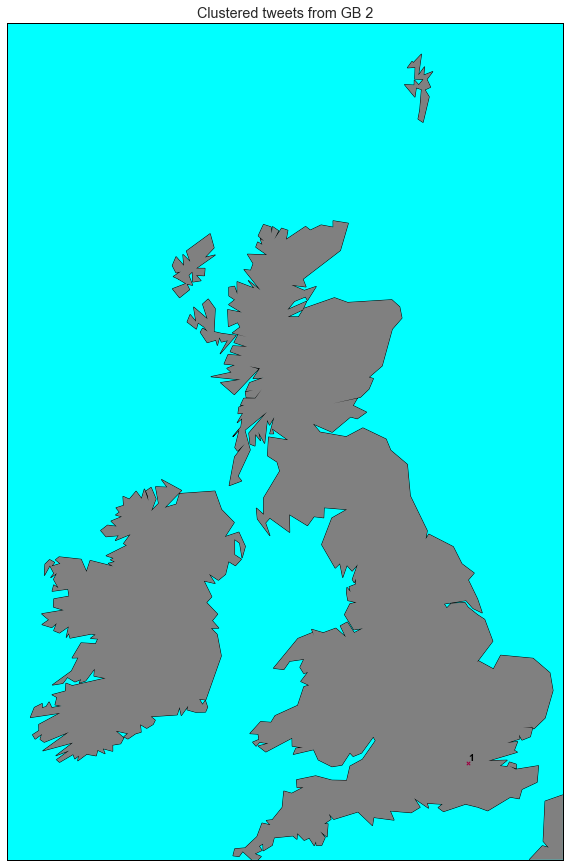

Making the Map took: 1.3147399425506592
start calculating
1. Cluster, with 8 tweets, 8 distinct users.
This cluster is from:10.07.2016 to: 10.07.2016
 
(52.071756137500003, -1.0225739899999999)
Location:  Aylesbury Vale,  Buckinghamshire
Most similar words:
['#britishgp', '#silverstone', '#f1', 'silverstone', 'gp2', '#silverstone…', '#britishgrandprix', '#grandprix', '#austriangp', '#44']
 
The most freq. words are: 
[   ('#silverstone', 6),
    ('#f1', 3),
    ('silverstone', 3),
    ('#britishgp', 3),
    ('grand…', 2),
    ('grand', 2),
    ('prix', 2),
    ('british', 2),
    ('start', 2),
    ('race', 2)]
 
[   'ZERO #Formula1 #RedBullRacing #silverstone #BritishGP #Pirelli #sparks '
    '#F1 @ Silverstone Grand… https://t.co/cPlKD3nZB2',
    'Great display from the #redarrows at #britishgp @ F1 British Grand Prix @ '
    'Silverstone https://t.co/xRwQ9Bj2t2',
    '#rosberg overtaken #lewis still leading.. @ F1 British Grand Prix @… '
    'https://t.co/ksQbHsXwPM',
    'Podium in 

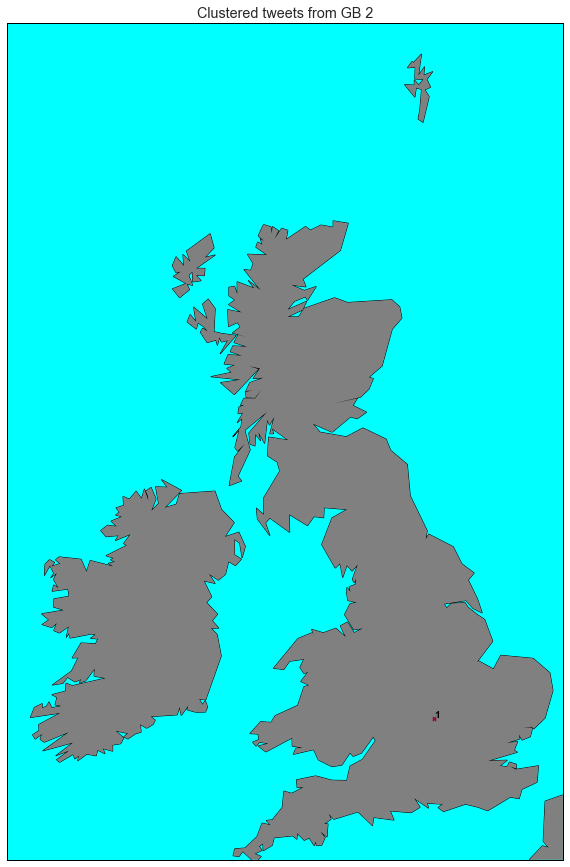

Making the Map took: 1.2076020240783691
start calculating
1. Cluster, with 4 tweets, 4 distinct users.
This cluster is from:10.07.2016 to: 10.07.2016
 
(53.470810670000006, -2.2352777349999999)
Location:  Greater Manchester,  North West England
Most similar words:
['manchester', 'kingdom', 'kingdom/', 'united…', 'coya', 'sheffield', 'liverpool', 'kindom', 'city', 'central…']
 
The most freq. words are: 
[   ('manchester', 7),
    ('kingdom', 3),
    ('united', 3),
    ('warren', 1),
    ('🚴🏻🚵🏿🚴🏻🚵🏿🚴🏻🚵🏿🚴🏻🚵🏿🚴🏻', 1),
    ('greater', 1),
    ('arndale', 1),
    ('photos', 1),
    ('#skyride', 1),
    ('ruining', 1)]
 
[   '#skyride 🚴🏻🚵🏿🚴🏻🚵🏿🚴🏻🚵🏿🚴🏻🚵🏿🚴🏻 @ Manchester, United Kingdom '
    'https://t.co/5N9Szz2u8I',
    "I'm at Manchester Arndale - @manarndale in Manchester, Greater Manchester "
    'https://t.co/fTU1Hb0EAZ',
    '🐠🍋 @ Manchester, United Kingdom https://t.co/ZHJkCynsnD',
    'Tb Manchester ft. warren ruining photos @ Manchester, United Kingdom '
    'https://t.co/A6qLh4OFph']
 -

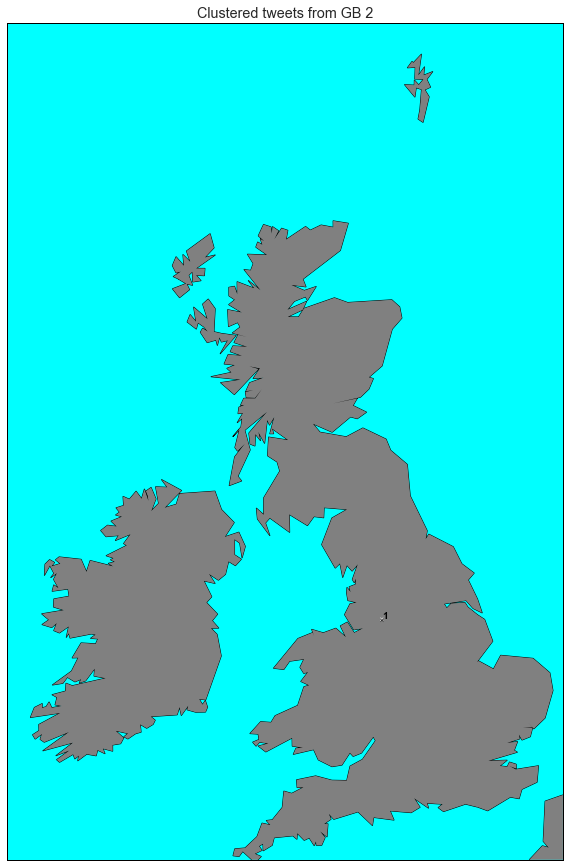

Making the Map took: 1.451448917388916
start calculating
1. Cluster, with 5 tweets, 5 distinct users.
This cluster is from:10.07.2016 to: 10.07.2016
 
(53.361223153999994, -6.2500870799999992)
Location:  Dublin,  County Dublin
Most similar words:
['#beyonce', 'wembley', '#formationworldtour', '#crokepark', '#beyoncedublin', '#croker', '#queenbey', '#queenb', '#beyoncé', 'formation…']
 
The most freq. words are: 
[   ('park', 4),
    ('croke', 4),
    ('beyonce', 3),
    ('#formationworldtour', 3),
    ('#beyonce', 2),
    ('#dublin', 2),
    ('formation', 2),
    ('😱😍❤#loveontop', 1),
    ('stadium', 1),
    ('get', 1)]
 
[   '👑B #thatass #formationworldtour #dublin @ Croke Park '
    'https://t.co/dKm8hH5Yw0',
    'Oh hi Beyonce @ Croke Park Stadium https://t.co/tg650zoYKP',
    'There goes my Queen! 😱😍❤#loveontop #fangirling #formationworldtour #islay '
    '#beygood #beyhive… https://t.co/6sO8WPPZvA',
    'beyonce puts on quite a show! #Dublin #beyonce @ Beyonce Formation World '
  

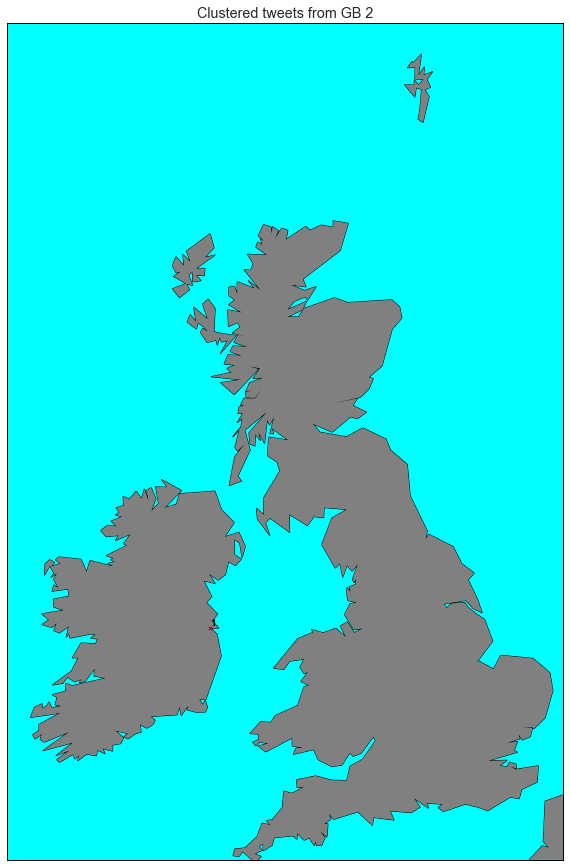

Making the Map took: 1.3245220184326172
start calculating
There were 1 out of 6 Tweets that were clustered as noise
This is 16.6666666667%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.6463050842285156
There were 695 Tweets that were clustered as noise
Seed: 50
9 Day  took Method 2: 14.820441961288452


Begin Analysis for day 10
11 day clustered by region. The passed time is: 6.543044090270996
labelsMethod2_loc: 1000
start calculating
start calculating
1. Cluster, with 13 tweets, 12 distinct users.
This cluster is from:11.07.2016 to: 11.07.2016
 
(51.507114860000001, -0.12731804999999999)
Location:  London,  Greater London
Most similar words:
['kingdom', 'united…', 'coya', 'kingdom/', '🇬🇧💕', 'brockely', 'central…', 'kindom', '#whenlondoniscalling', 'spinningfields']
 
The most freq. words are: 
[   ('london', 13),
    ('kingdom', 13),
    ('united', 13),
    ('photo', 3),
    ('posted', 3),
    ('#london', 2),
    ('rubys', 1),


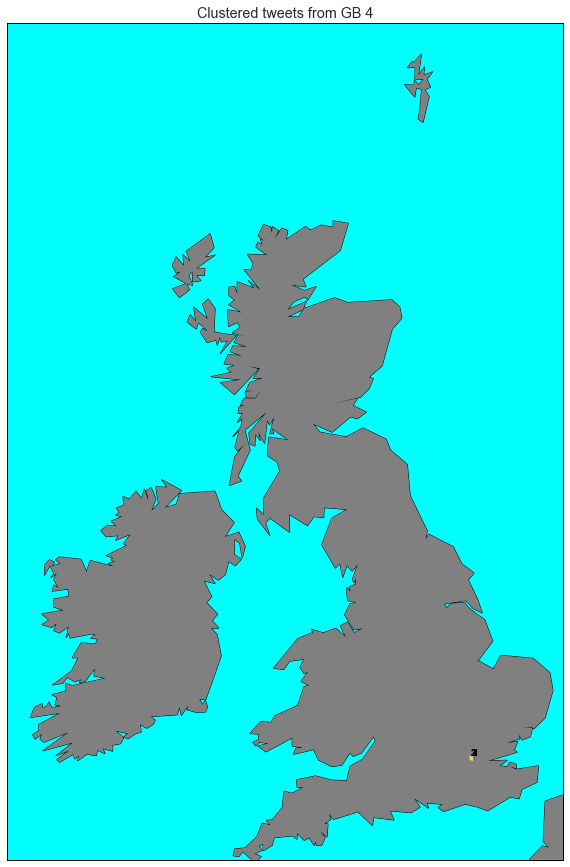

Making the Map took: 1.4328291416168213
start calculating
There were 7 out of 13 Tweets that were clustered as noise
This is 53.8461538462%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.6035499572753906
start calculating
1. Cluster, with 6 tweets, 6 distinct users.
This cluster is from:11.07.2016 to: 11.07.2016
 
(51.568666666666665, -0.099979949999999998)
Location:  London,  Greater London
Most similar words:
['wireless', 'festival', '#wirelessfestival', '#wirelessfest', 'edc', '#festival', '#myfestivalsquad', '#bstk', '#garagenationfestival', 'dorado']
 
The most freq. words are: 
[   ('wireless', 5),
    ('festival', 4),
    ('huge…', 1),
    ('#calvinharris', 1),
    ('park', 1),
    ('show', 1),
    ('✌🏼️', 1),
    ('future', 1),
    ('#wirelessfestival', 1),
    ('finsbury', 1)]
 
[   'Wireless festival 2016 with wstrnmusic you guys absolutely rocked… '
    'https://t.co/72CaVxRrZw',
    'Future was MAAAD @ Wireless Festiv

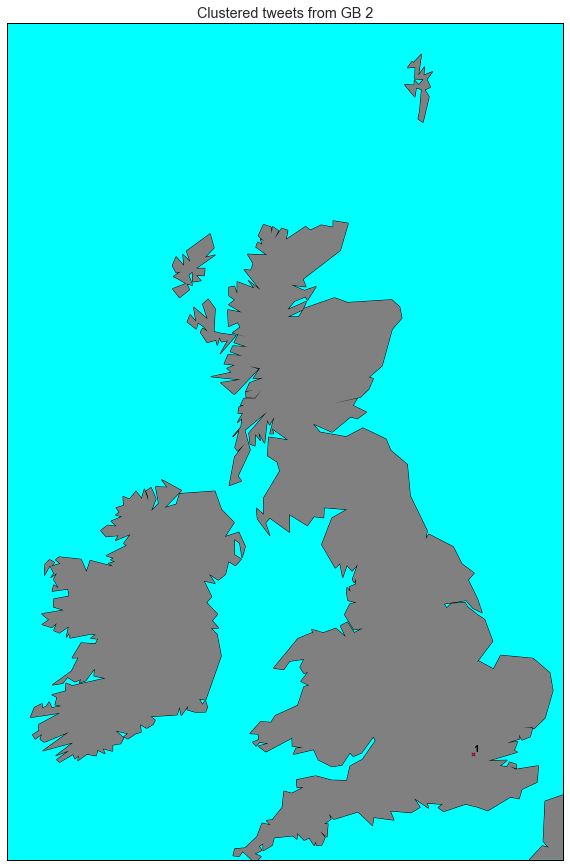

Making the Map took: 1.135850191116333
start calculating
1. Cluster, with 4 tweets, 4 distinct users.
This cluster is from:11.07.2016 to: 11.07.2016
 
(51.468465555000002, -0.45079886749999998)
Location:  London,  Greater London
Most similar words:
['hounslow', 'londra', 'london', 'heathrow', 'greater', 'havalimanı', 'marylebone', 'borough', 'dorchester', 'uxbridge']
 
The most freq. words are: 
[   ('london', 6),
    ('hounslow', 4),
    ('greater', 4),
    ('heathrow', 1),
    ('lounge', 1),
    ('havalimanı', 1),
    ('first', 1),
    ('londra', 1),
    ('galleries', 1)]
 
[   "I'm at London @HeathrowAirport in Hounslow, Greater London "
    'https://t.co/2AvEdGubrn',
    '😍😍 (@ London @HeathrowAirport in Hounslow, Greater London) '
    'https://t.co/vRDM0ZjQWe',
    "I'm at BA Galleries First Lounge in Hounslow, Greater London "
    'https://t.co/ba3Ja1ek7b',
    "I'm at Londra Heathrow Havalimanı - @heathrowairport in Hounslow, Greater "
    'London https://t.co/AcCIV3rvCB']
 ----

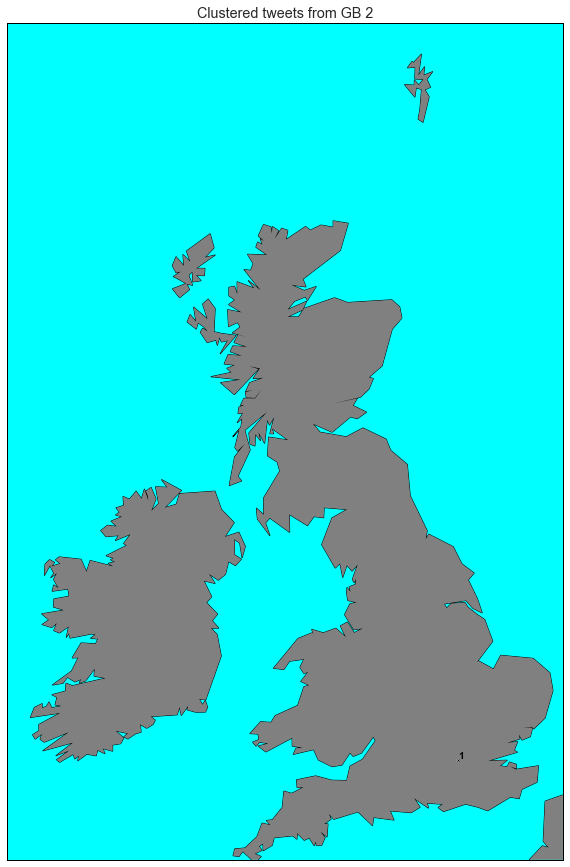

Making the Map took: 1.2115628719329834
start calculating
1. Cluster, with 11 tweets, 10 distinct users.
This cluster is from:11.07.2016 to: 11.07.2016
 
(51.513488500000015, -0.074776794545454536)
Location:  London,  Greater London
Most similar words:
['london', 'hoxton', 'waterloo', 'tower', 'chiswick', 'kilburn', 'queensway', 'harringay', 'brunel', 'marylebone']
 
The most freq. words are: 
[   ('london', 11),
    ('greater', 6),
    ('tower', 5),
    ('bridge', 4),
    ('old', 3),
    ('time', 2),
    ('morning', 2),
    ('station', 1),
    ('found', 1),
    ('back', 1)]
 
[   "I'm at @Tate Modern in Southwark, Greater London https://t.co/G378enrPBj",
    '準備回家 (@ Old Street Railway Station (OLD) - @nationalrailenq in '
    'Shoreditch, Greater London) https://t.co/0OVZVorQUz',
    'Morning Peepers! Found a #dreambottle on my #runcommute from the #bfg '
    '🏃🏻❤️ @ Tower Bridge https://t.co/24XhP7Geyh',
    "I'm at Sainsbury's in Whitechapel, Greater London https://t.co/qTTJ98v7Hc"

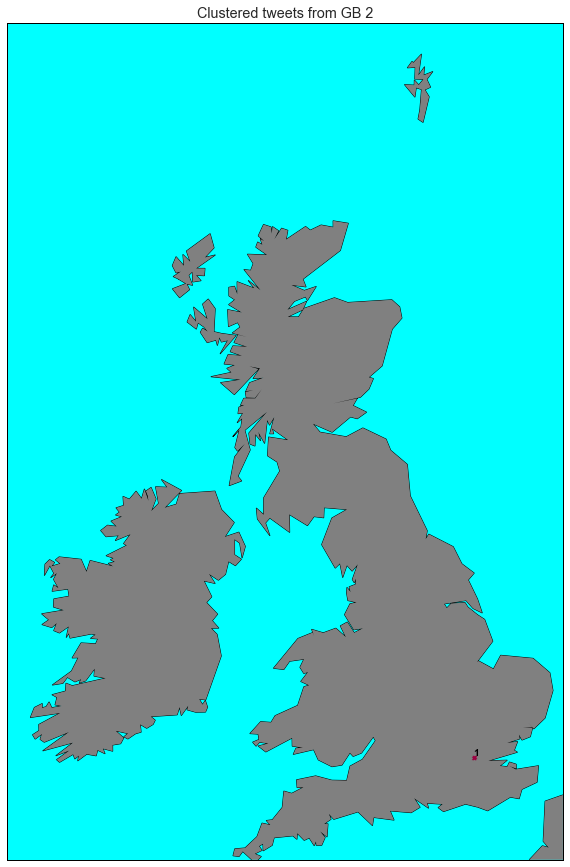

The number of clusters that were ignored because of quality issues is: 1
Making the Map took: 1.2366549968719482
start calculating
There were 2 out of 7 Tweets that were clustered as noise
This is 28.5714285714%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.6090028285980225
There were 618 Tweets that were clustered as noise
Seed: 50
10 Day  took Method 2: 13.792661905288696


Begin Analysis for day 1
1 day clustered by region. The passed time is: 6.549695014953613
labelsMethod2_loc: 1000
start calculating
start calculating
1. Cluster, with 38 tweets, 36 distinct users.
This cluster is from:01.07.2016 to: 01.07.2016
 
(51.508527406052643, -0.12355683763157899)
Location:  London,  Greater London
Most similar words:
['london', 'united…', 'bermondsey', 'svitzer', 'wework', '🇬🇧💕', 'londra', 'hoxton', 'central…', 'coya']
 
The most freq. words are: 
[   ('london', 52),
    ('greater', 15),
    ('united', 13),
    ('kingdom', 12),
    

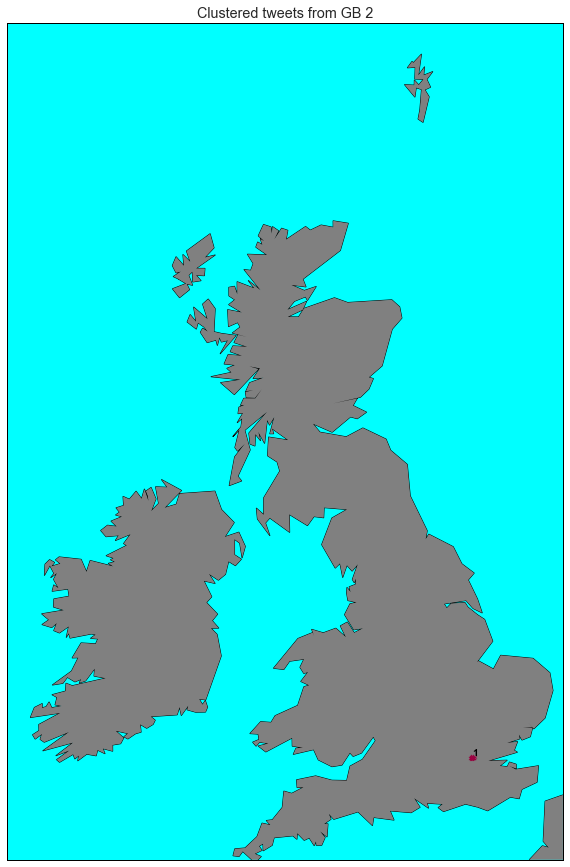

Making the Map took: 1.167022943496704
start calculating
There were 2 out of 12 Tweets that were clustered as noise
This is 16.6666666667%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.5621318817138672
start calculating
There were 5 out of 16 Tweets that were clustered as noise
This is 31.25%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.5424020290374756
There were 685 Tweets that were clustered as noise
Seed: 50
1 Day  took Method 2: 11.085932970046997


Begin Analysis for day 2
2 day clustered by region. The passed time is: 5.803212881088257
labelsMethod2_loc: 1000
start calculating
start calculating
1. Cluster, with 10 tweets, 10 distinct users.
This cluster is from:02.07.2016 to: 02.07.2016
 
(51.508053497999995, -0.160140646)
Location:  London,  Greater London
Most similar words:
['hyde', '#britishsummertime', '#bst', 'barclaycard', '#britishsummertimehydepark', 'bst

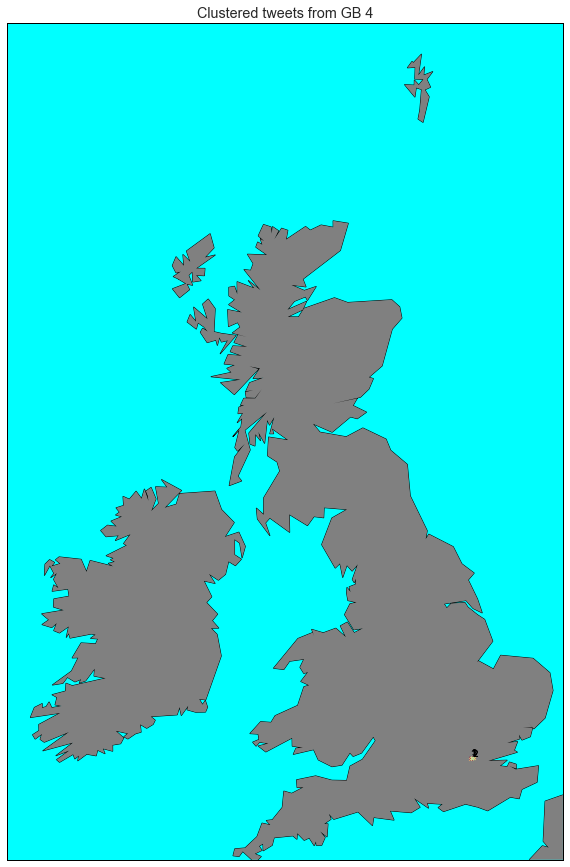

Making the Map took: 1.3775770664215088
start calculating
1. Cluster, with 9 tweets, 9 distinct users.
This cluster is from:02.07.2016 to: 02.07.2016
 
(51.557939526666672, -0.28032675000000001)
Location:  London,  Greater London
Most similar words:
['wembley', '#formationworldtour', 'beyonce', 'beyoncé', '#beyonce', '#beyoncewembley', 'formation', '#queenb', '#theformationworldtour', '#queenbey']
 
The most freq. words are: 
[   ('beyoncé', 6),
    ('formation', 6),
    ('world', 6),
    ('tour', 6),
    ('stadium', 3),
    ('#beyonce', 3),
    ('wembley', 3),
    ('posted', 2),
    ('lucky', 1),
    ('jigga', 1)]
 
[   '#Beyonce #clubwembley hardly any ques yessss 👑🐝 @ Wembley Stadium '
    'https://t.co/jgyYXe10AS',
    'Just posted a photo @ Beyoncé Formation World Tour '
    'https://t.co/F24hM9disq',
    'When u too slay 4 Bey. @ Wembley Stadium https://t.co/drwQJ85t0T',
    '#preYoncé @ Wembley Stadium https://t.co/4bOlLM7mjh',
    'Just posted a video @ Beyoncé Formation World 

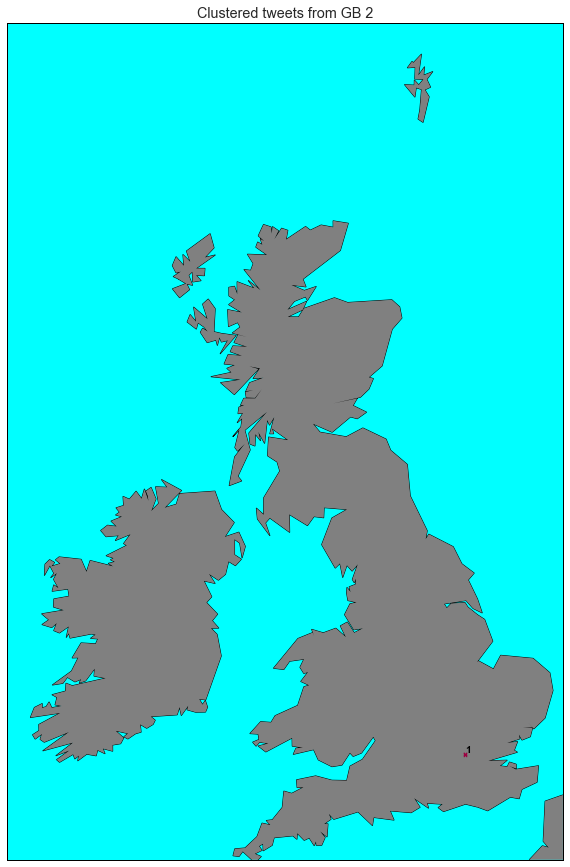

Making the Map took: 1.1276600360870361
start calculating
1. Cluster, with 7 tweets, 7 distinct users.
This cluster is from:02.07.2016 to: 02.07.2016
 
(51.43452554571428, -0.2140377757142857)
Location:  London,  Greater London
Most similar words:
['wimbledon', '#wimbledon', '#wimbledonfinals', '#wimbeldon', 'mens', 'wimbledons', 'wimbeldon', '#wimbledonfinal', '#tennis', 'tennis']
 
The most freq. words are: 
[   ('wimbledon', 10),
    ('#wimbledon', 3),
    ('championships', 3),
    ('court', 2),
    ('play', 2),
    ('clear', 1),
    ('mens', 1),
    ('waits', 1),
    ('steward', 1),
    ('continue', 1)]
 
[   '🌧🌧Suspended Play kgessay  💔#novakdjokovic #wimbledon2016 #lategram 🎾🎾🎾 @ '
    'Wimbledon - Court 1 https://t.co/dHQKt3MDCP',
    "Wimbledon men's doubles #clearsky #thequeue #wimbledon @ 2016… "
    'https://t.co/rjEuPRatQJ',
    'El pasto de Tandil en el all england @ The Championships, Wimbledon '
    'https://t.co/uj2zTYAc40',
    '#wimbledon2016 with @tashaozzie @ The Ch

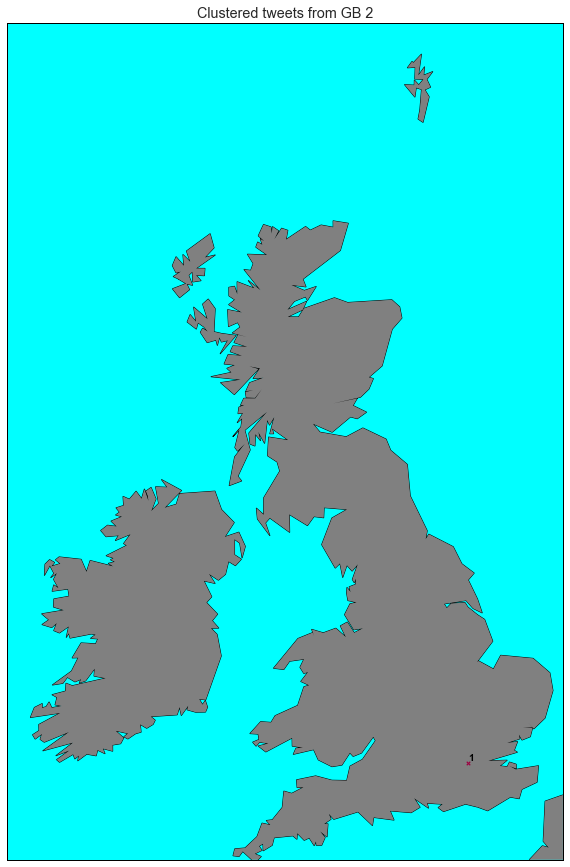

Making the Map took: 1.1438541412353516
start calculating
1. Cluster, with 10 tweets, 10 distinct users.
This cluster is from:02.07.2016 to: 02.07.2016
 
(51.537498974999991, -0.89985489000000007)
Location:  Wokingham,  South East
Most similar words:
['henley', 'regatta', '#henleyregatta', '#henley', '#regatta', '#rowing', '#hrr', 'hall…', 'royal…', '#henleyonthames']
 
The most freq. words are: 
[   ('henley', 13),
    ('regatta', 11),
    ('royal', 9),
    ('#henleyregatta', 4),
    ('#hrr', 2),
    ('#baes', 1),
    ('lucy', 1),
    ('#toomuchchampagne', 1),
    ('#blondies', 1),
    ('#summer', 1)]
 
[   'Henley 🍾 @ Henley Royal Regatta https://t.co/zFvk8g8zzY',
    'Fun on Lady Lucy @ Henley on Thames Riverside https://t.co/mjVP3qOFRs',
    'Henley Regatta 👌🏻🍷 @ Henley Royal Regatta https://t.co/35RgPjLjSW',
    'A very wet and windy first day of the #henleyregatta #chilterns @ Henley '
    'Royal Regatta https://t.co/BVFbNh5p9F',
    'Picnic in full swing! @henleyregatta #hrr #hr

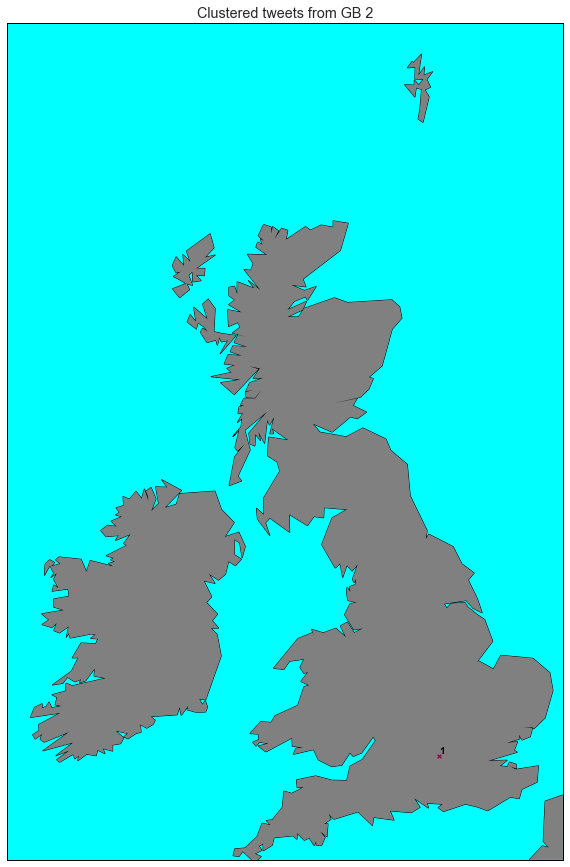

Making the Map took: 1.083791971206665
There were 774 Tweets that were clustered as noise
Seed: 50
2 Day  took Method 2: 11.567145109176636


Begin Analysis for day 3
3 day clustered by region. The passed time is: 6.41494083404541
labelsMethod2_loc: 1000
start calculating
start calculating
1. Cluster, with 18 tweets, 17 distinct users.
This cluster is from:03.07.2016 to: 03.07.2016
 
(51.507154830555557, -0.12576760444444443)
Location:  London,  Greater London
Most similar words:
['united…', 'kingdom', 'coya', '🇬🇧💕', 'kingdom/', 'brockely', 'central…', '#whenlondoniscalling', '#brighton…', 'palace…']
 
The most freq. words are: 
[   ('london', 19),
    ('kingdom', 17),
    ('united', 17),
    ('#london', 4),
    ('americans', 2),
    ('photo', 2),
    ('coming', 2),
    ('posted', 2),
    ('#tate', 1),
    ('summer', 1)]
 
[   'I thank #God for #Jesus 🙏🏾🙌🏾🙏🏾🙌🏾🙏🏾🙌🏾🙏🏾🙌🏾 @ London, United Kingdom '
    'https://t.co/Ctd7PiIiA1',
    'London Eye 😍🎡🇬🇧 @ London, United Kingdom https://t.co/uX

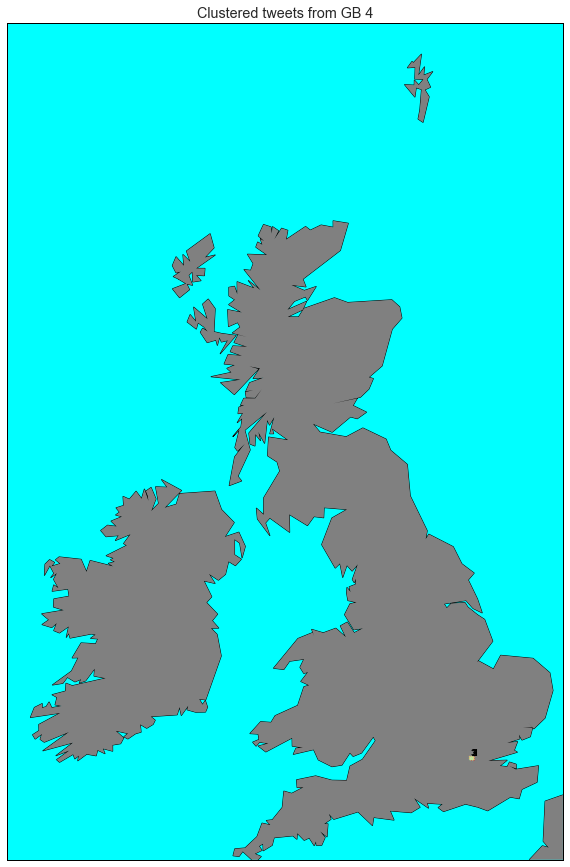

Making the Map took: 1.3388888835906982
start calculating
1. Cluster, with 25 tweets, 24 distinct users.
This cluster is from:03.07.2016 to: 03.07.2016
 
(51.557216501199989, -0.28013522679999991)
Location:  London,  Greater London
Most similar words:
['wembley', '#formationworldtour', '#beyoncewembley', '#beyonce', '#allnight', '#beyoncé', '#beyoncemanchester', 'stadium', '#queenb', '#theformationworldtour']
 
The most freq. words are: 
[   ('wembley', 20),
    ('stadium', 18),
    ('#formationworldtour', 8),
    ('beyoncé', 6),
    ('world', 6),
    ('formation', 5),
    ('#beyonce', 5),
    ('tour', 5),
    ('#beyoncé', 4),
    ('#london', 4)]
 
[   'I love you like XO, you love me like XO @ Wembley Stadium '
    'https://t.co/2fb1zA0bbF',
    'Just posted a photo @ Wembley Stadium https://t.co/ZxUaFOzpDA',
    'YONCÉ 🐝🍋 #formation 👑 @ Beyoncé Formation World Tour '
    'https://t.co/IRCTgwq1bu',
    '#Beyoncé #formationworldtour 👑🐝🍋 @ Wembley Stadium '
    'https://t.co/X437Rk4tRd'

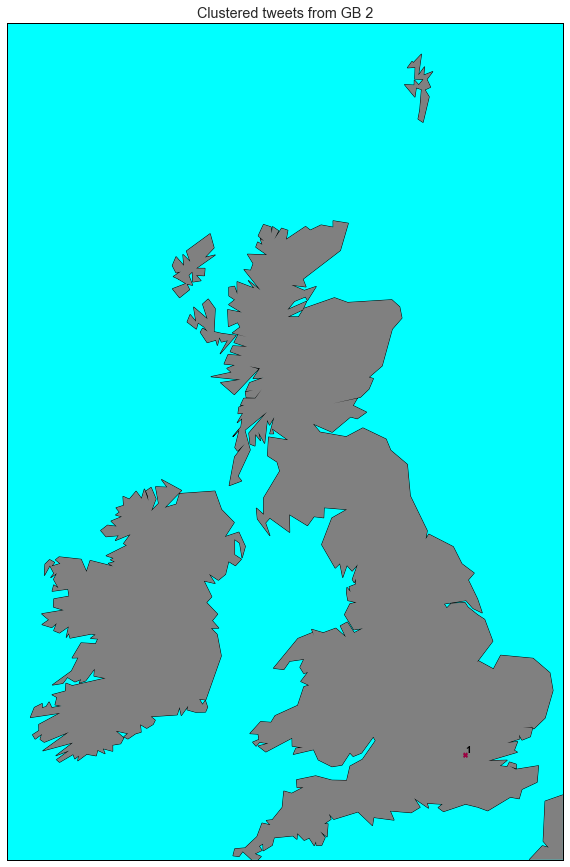

Making the Map took: 1.1052050590515137
There were 742 Tweets that were clustered as noise
Seed: 50
3 Day  took Method 2: 10.011069059371948


Begin Analysis for day 4
4 day clustered by region. The passed time is: 8.19386887550354
labelsMethod2_loc: 1000
start calculating
start calculating
1. Cluster, with 26 tweets, 24 distinct users.
This cluster is from:04.07.2016 to: 04.07.2016
 
(51.512113017692315, -0.12385502230769226)
Location:  London,  Greater London
Most similar words:
['london', 'united…', 'bermondsey', '🇬🇧💕', 'coya', '#skpedition', 'wework', 'central…', 'skyline', 'svitzer']
 
The most freq. words are: 
[   ('london', 31),
    ('kingdom', 10),
    ('greater', 10),
    ('united', 10),
    ('#london', 6),
    ('cross', 3),
    ('kings', 3),
    ('bridge', 2),
    ('oxford', 2),
    ('circus', 2)]
 
[   "I'm at Platform 9¾ in King's Cross, Greater London "
    'https://t.co/Kw3wmwykb2',
    'Love this one! #graff #graffiti #graffitiart #spraycanart #london #uk '
    '#londre

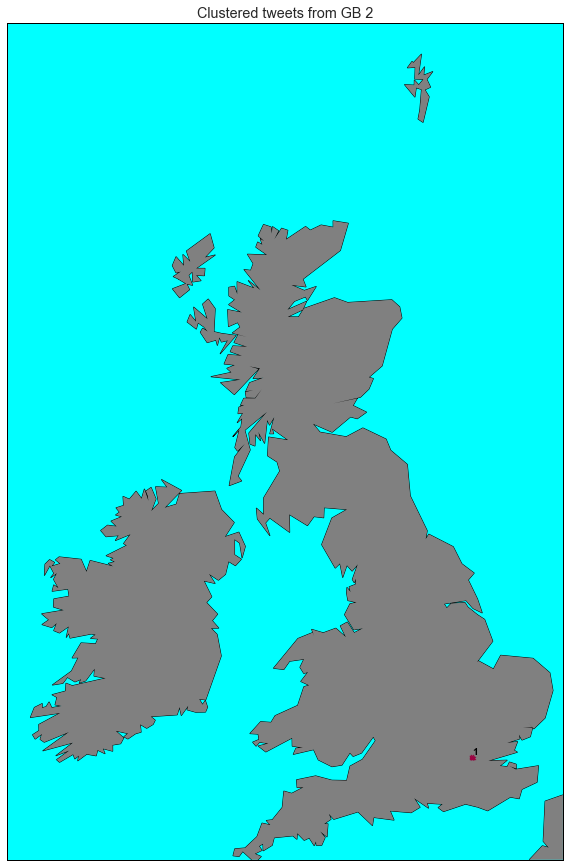

Making the Map took: 1.436722993850708
start calculating
There were 1 out of 14 Tweets that were clustered as noise
This is 7.14285714286%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.5760149955749512
start calculating
1. Cluster, with 12 tweets, 12 distinct users.
This cluster is from:04.07.2016 to: 04.07.2016
 
(51.556808163333329, -0.27983788833333334)
Location:  London,  Greater London
Most similar words:
['#formationworldtour', '#beyonce', '#beyoncé', '#queenbey', '#beyoncedublin', '#queenb', '#formationworldtour…', '#beyoncewembley', '#beyoncemanchester', 'beyonce']
 
The most freq. words are: 
[   ('#formationworldtour', 7),
    ('#beyonce', 7),
    ('beyonce', 6),
    ('stadium', 4),
    ('wembley', 4),
    ('at…', 3),
    ('#formation', 3),
    ('circle', 3),
    ('golden', 3),
    ('slay', 2)]
 
[   'Queen Bey 🐝 @ Wembley Stadium https://t.co/OfRVlj3Buj',
    'When Beyoncé is in town you gotto come out #WomenRule #Bey

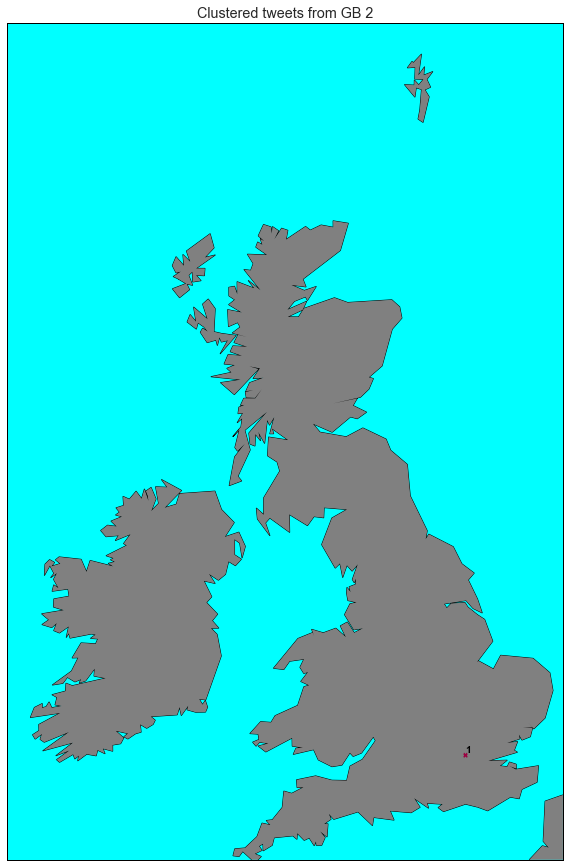

Making the Map took: 1.2011229991912842
start calculating
1. Cluster, with 10 tweets, 9 distinct users.
This cluster is from:04.07.2016 to: 04.07.2016
 
(51.434007448999999, -0.214161718)
Location:  London,  Greater London
Most similar words:
['wimbledon', '#wimbledon', '#wimbledonfinals', 'wimbledons', '#wimbeldon', '#wimbledonfinal', 'tennis', 'mens', 'wimbeldon', '#tennis']
 
The most freq. words are: 
[   ('wimbledon', 9),
    ('#wimbledon', 6),
    ('championships', 5),
    ('tennis', 2),
    ('murray', 2),
    ('court', 2),
    ('match', 2),
    ('#tennis', 2),
    ('#outfit', 1),
    ('hill', 1)]
 
[   'Last match of the day - Murray vs Kyrgios #wimbeldon #wimbledon2016 '
    '#tennis #andymurray… https://t.co/EnmivkJlJK',
    'My #outfit for today at #wimbledon2016 in #Court1. #tennis '
    '#championships… https://t.co/lFtOV8jEAH',
    'Court 3. #radwanska v #cibulkova #wimbledon @ 2016 Wimbledon '
    'Championships https://t.co/GylicKkff4',
    'Drinkin at a really fancy ten

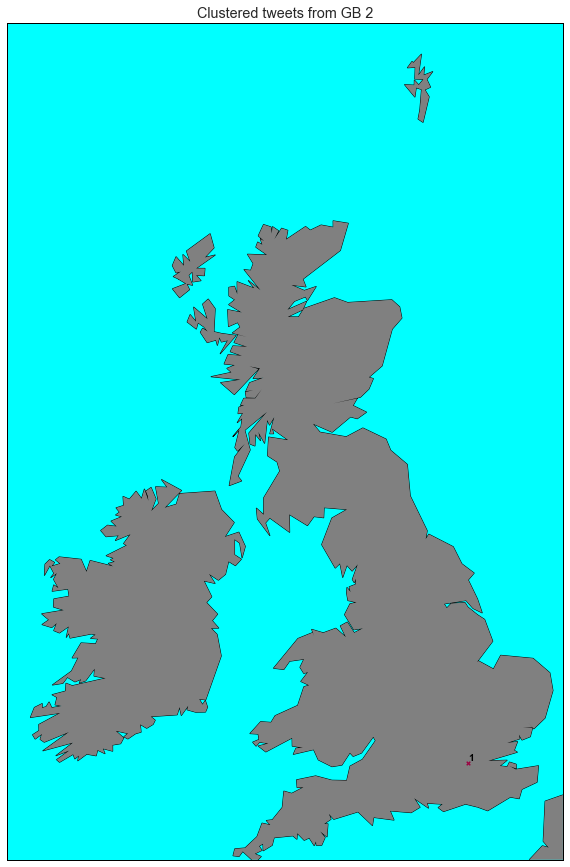

Making the Map took: 1.4487371444702148
There were 733 Tweets that were clustered as noise
Seed: 50
4 Day  took Method 2: 14.140581130981445


Begin Analysis for day 5
5 day clustered by region. The passed time is: 6.523409128189087
labelsMethod2_loc: 1000
start calculating
start calculating
1. Cluster, with 36 tweets, 35 distinct users.
This cluster is from:05.07.2016 to: 05.07.2016
 
(51.510182221666668, -0.12455763972222224)
Location:  London,  Greater London
Most similar words:
['united…', 'london', '#skpedition', 'central…', 'wework', '🇬🇧💕', '#london', 'skyline', 'thisonesart', 'coya']
 
The most freq. words are: 
[   ('london', 37),
    ('greater', 11),
    ('#london', 11),
    ('kingdom', 10),
    ('united', 10),
    ('holborn', 3),
    ('#work', 3),
    ('soho', 2),
    ('#sun', 2),
    ('street', 2)]
 
[   "I'm at @Primark in London, Greater London https://t.co/g7L0agurvF",
    'London Pride 2016 #london #pride #lgbt+ @ Regent Street '
    'https://t.co/tYqgogKJgG',
    'Nice 

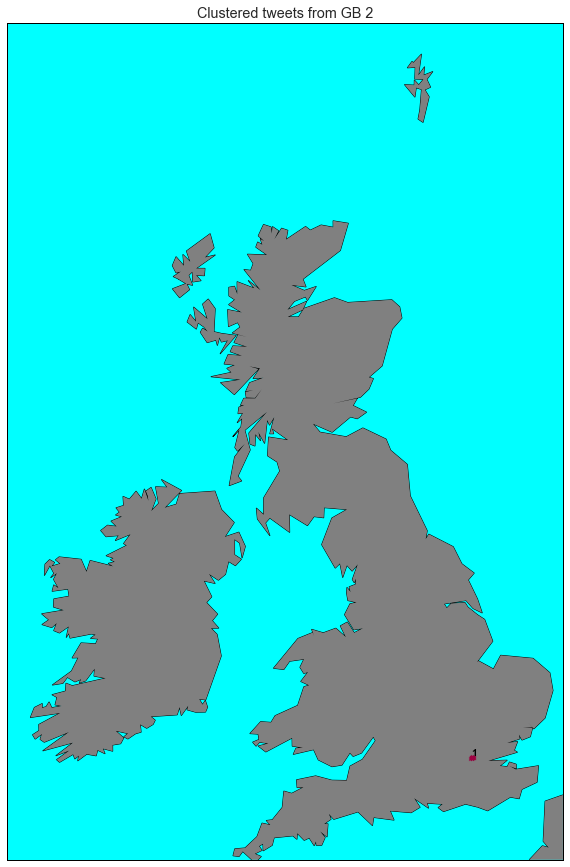

Making the Map took: 1.0703699588775635
start calculating
1. Cluster, with 6 tweets, 5 distinct users.
This cluster is from:05.07.2016 to: 05.07.2016
 
(51.433685739999994, -0.21379564833333334)
Location:  London,  Greater London
Most similar words:
['#wimbledon', 'wimbledon', '#wimbledonfinals', '#wimbledonfinal', '#wimbeldon', 'wimbledons', '#tennis', '🎾🎾🎾', '#backthebrits', '🇬🇧🎾']
 
The most freq. words are: 
[   ('wimbledon', 5),
    ('championships', 4),
    ('#wimbledon', 4),
    ('mahut', 1),
    ('tennis', 1),
    ('#readyplay', 1),
    ('pimms', 1),
    ('finals', 1),
    ('#cloudporn', 1),
    ('taking', 1)]
 
[   '@wimbledon #wimbledon2016 #tennis @ 2016 Wimbledon Championships '
    'https://t.co/Wz728eCS5f',
    '#readyplay #wimbledon #cloudporn #green @wimbledon #iphoneography @ 2016 '
    'Wimbledon Championships https://t.co/W6GInrx2Pp',
    'Go on #serenawilliams #wimbledon2016 #centrecourt… '
    'https://t.co/13myAZNm4O',
    'Doubles watching Mahut #wimbledon @ 2016

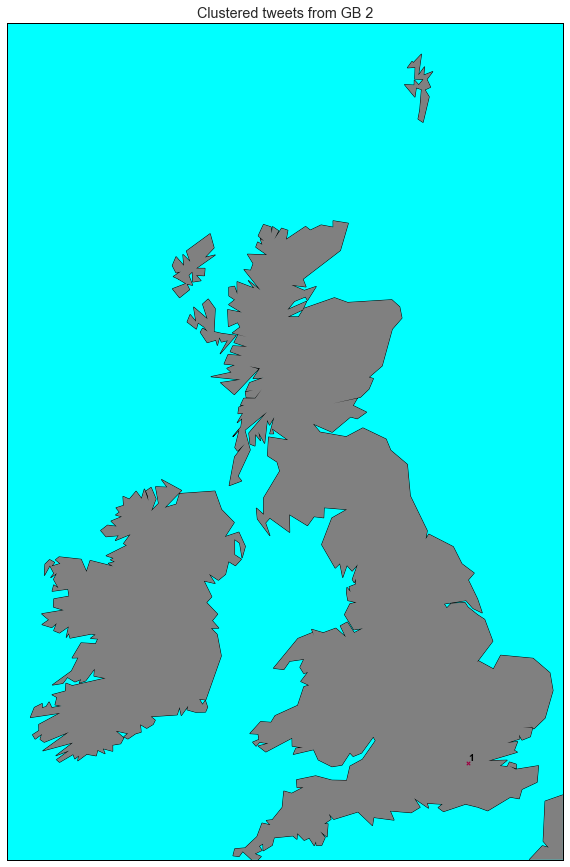

Making the Map took: 1.075423002243042
start calculating
There were 3 out of 18 Tweets that were clustered as noise
This is 16.6666666667%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.5511548519134521
There were 710 Tweets that were clustered as noise
Seed: 50
5 Day  took Method 2: 10.865993976593018


Begin Analysis for day 6
6 day clustered by region. The passed time is: 6.030076026916504
labelsMethod2_loc: 1000
start calculating
start calculating
1. Cluster, with 9 tweets, 9 distinct users.
This cluster is from:06.07.2016 to: 06.07.2016
 
(51.507114860000001, -0.12731804999999999)
Location:  London,  Greater London
Most similar words:
['united…', 'kingdom', 'coya', 'kingdom/', '🇬🇧💕', 'brockely', 'central…', 'colney', 'united', 'wonderground']
 
The most freq. words are: 
[   ('london', 9),
    ('kingdom', 8),
    ('united', 8),
    ('yes', 3),
    ('count', 1),
    ('lost', 1),
    ('suits', 1),
    ('hurry', 1),
    ('#beau

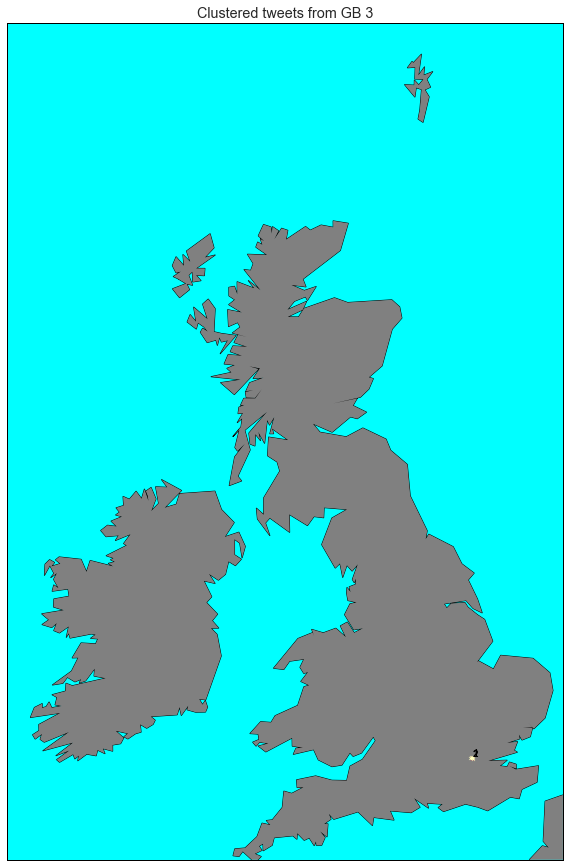

Making the Map took: 1.4202728271484375
start calculating
1. Cluster, with 6 tweets, 6 distinct users.
This cluster is from:06.07.2016 to: 06.07.2016
 
(53.456493683333328, -2.2868594249999998)
Location:  Greater Manchester,  North West England
Most similar words:
['trafford', 'trafford…', 'wembley', 'emirates', 'cricket…', 'newcastle', 'stadium', 'old…', 'etihad', '#formationworldtour']
 
The most freq. words are: 
[   ('old', 6),
    ('trafford', 6),
    ('cricket', 5),
    ('ground', 5),
    ('beyoncé', 2),
    ('#formationworldtour', 2),
    ('emirates', 1),
    ('ohnan', 1),
    ('last', 1),
    ('#beyonceformationtour', 1)]
 
[   'Beers, Beyoncé and my best mate 🍻🐝🍋💕 @ Old Trafford Cricket Ground '
    'https://t.co/uZfBuwkqMY',
    'Still not over last night yet 😱🍋 #formationworldtour @ Old Trafford '
    'Cricket Ground https://t.co/dQbsdtTPsa',
    'Queen B. @ Old Trafford Cricket Ground https://t.co/VxfTMjjwjg',
    'Finale... HALO! 🎆 #BeyonceFormationTour @ Old Trafford Cric

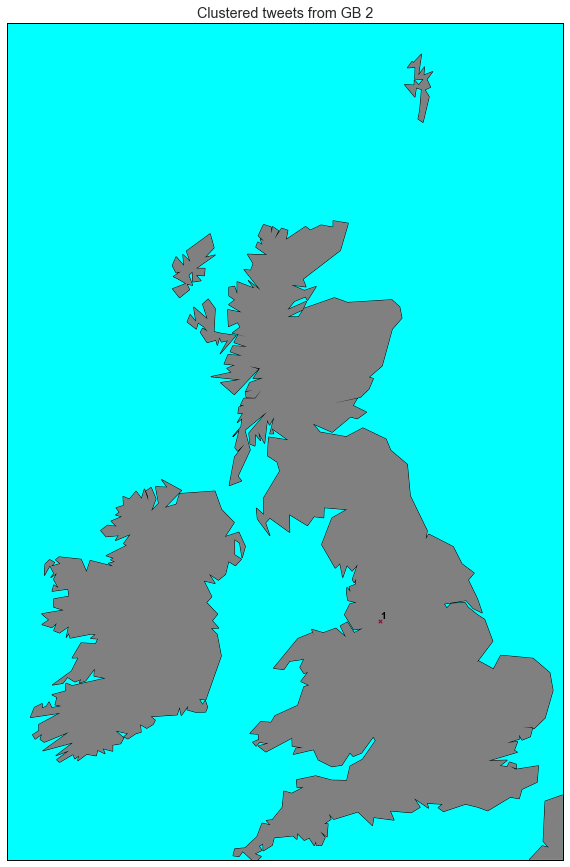

Making the Map took: 1.2353248596191406
start calculating
There were 4 out of 10 Tweets that were clustered as noise
This is 40.0%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.5990970134735107
There were 711 Tweets that were clustered as noise
Seed: 50
6 Day  took Method 2: 10.825157880783081


Begin Analysis for day 7
7 day clustered by region. The passed time is: 6.6653151512146
labelsMethod2_loc: 1000
start calculating
start calculating
1. Cluster, with 17 tweets, 17 distinct users.
This cluster is from:07.07.2016 to: 07.07.2016
 
(51.506913326470588, -0.1244965076470588)
Location:  London,  Greater London
Most similar words:
['kingdom', 'united…', 'coya', 'kingdom/', '🇬🇧💕', 'brockely', 'central…', 'wework', '#whenlondoniscalling', 'spinningfields']
 
The most freq. words are: 
[   ('london', 18),
    ('kingdom', 16),
    ('united', 16),
    ('photo', 4),
    ('posted', 4),
    ('#london', 3),
    ('morning', 2),
    ('way',

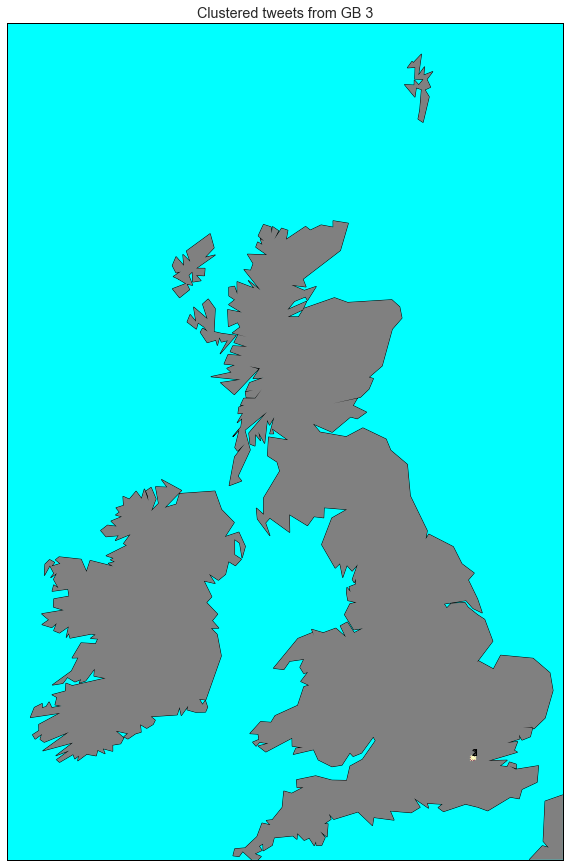

Making the Map took: 1.2145259380340576
start calculating
There were 3 out of 26 Tweets that were clustered as noise
This is 11.5384615385%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.5431838035583496
start calculating
There were 11 out of 18 Tweets that were clustered as noise
This is 61.1111111111%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.5329999923706055
start calculating
There were 5 out of 15 Tweets that were clustered as noise
This is 33.3333333333%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.5360782146453857
There were 710 Tweets that were clustered as noise
Seed: 50
7 Day  took Method 2: 11.15159797668457


Begin Analysis for day 8
9 day clustered by region. The passed time is: 5.789880990982056
labelsMethod2_loc: 1000
start calculating
start calculating
1. Cluster, with 21 tweets, 17 distinct user

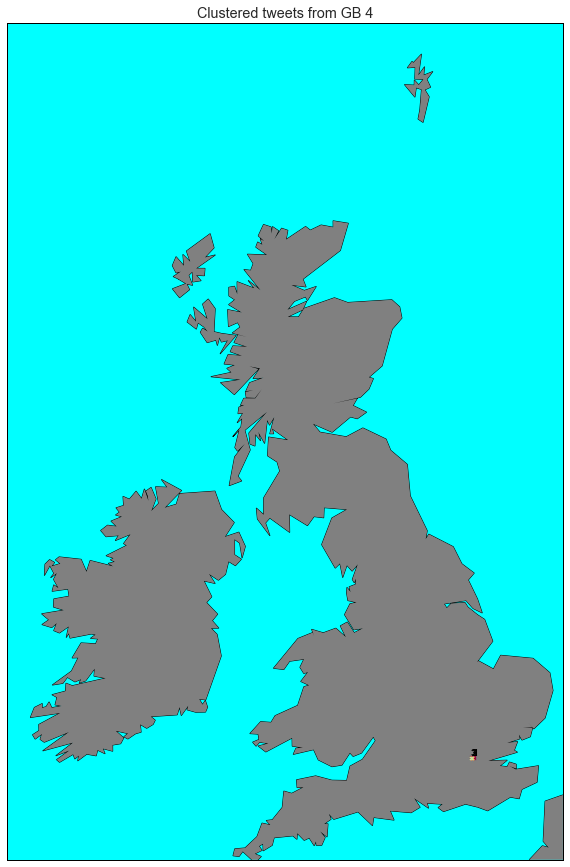

Making the Map took: 2.543117046356201
start calculating
1. Cluster, with 7 tweets, 7 distinct users.
This cluster is from:09.07.2016 to: 09.07.2016
 
(51.433681428571425, -0.21383285714285713)
Location:  London,  Greater London
Most similar words:
['wimbledon', '#wimbledon', 'mens', '#wimbledonfinals', '#wimbledonfinal', 'wimby', 'wimbledons', '#tennis', 'championships', '#wimbeldon']
 
The most freq. words are: 
[   ('wimbledon', 5),
    ('championships', 3),
    ('final', 3),
    ('#wimbledon', 3),
    ('ladies', 2),
    ('wimbledon…', 2),
    ('womens', 1),
    ('court', 1),
    ('point', 1),
    ('check', 1)]
 
[   "So who's watching the ladies singles final today? Will be a 👊 one! 😀 "
    'Check out our friend… https://t.co/QC7XWFlYVv',
    'Beautiful #centrecourt #womens #semis #wimbledon @ 2016 Wimbledon '
    'Championships https://t.co/ktIWzJ1jFl',
    'Aaaaaah maaah gaaaad #serenawilliams #wimbledon2016 @ivanmbart @MMMHTTT @ '
    '2016 Wimbledon… https://t.co/bkKRRVSOxW',
 

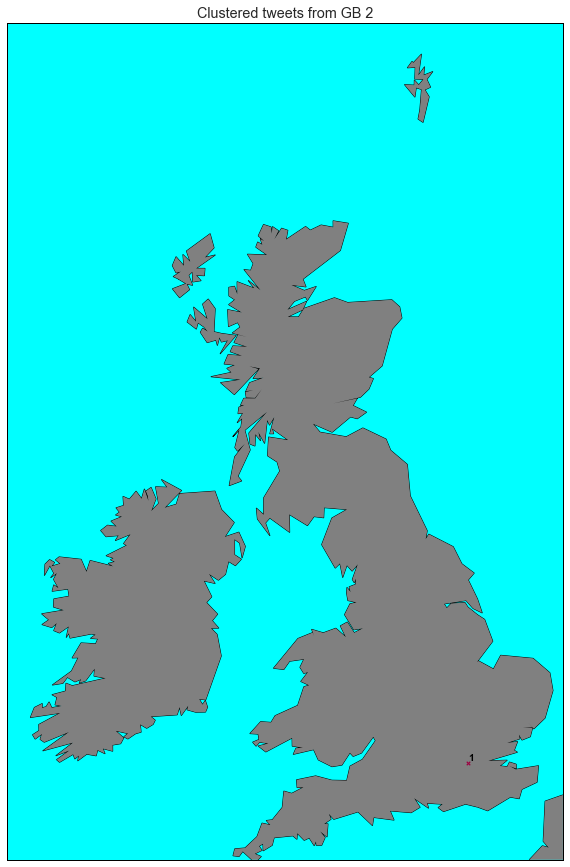

Making the Map took: 1.1660420894622803
There were 703 Tweets that were clustered as noise
Seed: 50
8 Day  took Method 2: 10.757158994674683


Begin Analysis for day 9
10 day clustered by region. The passed time is: 7.133016109466553
labelsMethod2_loc: 1000
start calculating
start calculating
1. Cluster, with 10 tweets, 9 distinct users.
This cluster is from:10.07.2016 to: 10.07.2016
 
(51.510501145999989, -0.14810783599999999)
Location:  London,  Greater London
Most similar words:
['hyde', '#bsthydepark', 'barclaycard', '#britishsummertime', 'hyde…', 'bsthydepark', '#bst', '#steviewonder', '#hydepark', '#britishsummertimehydepark']
 
The most freq. words are: 
[   ('hyde', 8),
    ('park', 8),
    ('time', 8),
    ('summer', 7),
    ('british', 7),
    ('barclaycard', 3),
    ('#hydepark', 2),
    ('#bsthydepark', 2),
    ('#steviewonder', 2),
    ('love', 2)]
 
[   '😥💔😢💔 @ British Summer Time, Hyde Park https://t.co/EqQnJLwjL1',
    'Pharrell! @ Barclaycard British Summer Time, Hyde 

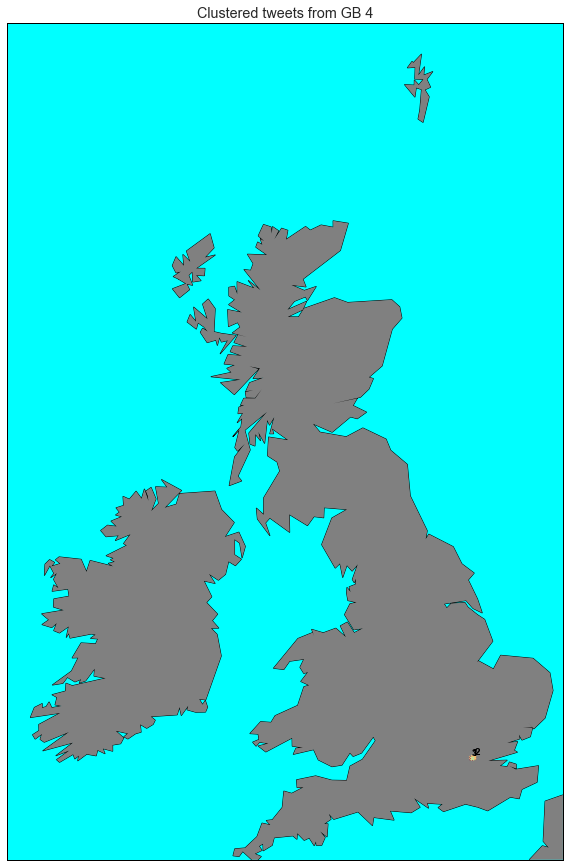

Making the Map took: 1.4896571636199951
start calculating
1. Cluster, with 7 tweets, 7 distinct users.
This cluster is from:10.07.2016 to: 10.07.2016
 
(51.568849999999998, -0.098419928571428575)
Location:  London,  Greater London
Most similar words:
['wireless', 'festival', 'edc', 'nass', 'festivals', '#wirelessfest', 'brownstock', '#wirelessfestival', '#myfestivalsquad', 'dorado']
 
The most freq. words are: 
[   ('wireless', 10),
    ('festival', 7),
    ('corker', 1),
    ('keep', 1),
    ('bitches', 1),
    ('room', 1),
    ('yday', 1),
    ('cole', 1),
    ('yesterday', 1),
    ('babies', 1)]
 
[   'Moody bitches 😅 @ Wireless Festival 2016 https://t.co/eoejraI1dA',
    'J. Cole @ Wireless @ Wireless Festival https://t.co/5Cigj60QeA',
    'What a corker of a day we had yesterday 💥 ☀️ 🍺 🔊 👣 🙆🏻 @ Wireless Festival '
    '2016 https://t.co/YmlqHltMt5',
    'Wireless ft. Lils room 😝 @ Wireless Festival https://t.co/bW9SHY6m2z',
    'WIRELESS - yday @ Wireless Festival https://t.co/R37

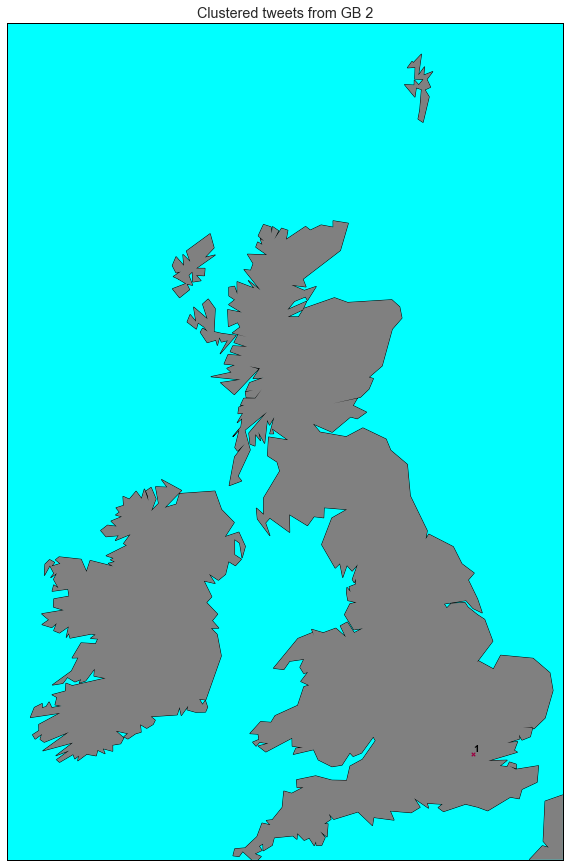

Making the Map took: 1.157175064086914
start calculating
1. Cluster, with 7 tweets, 7 distinct users.
This cluster is from:10.07.2016 to: 10.07.2016
 
(51.43340125142857, -0.21366565142857144)
Location:  London,  Greater London
Most similar words:
['#wimbledon', 'wimbledon', '#wimbledonfinals', '#murray', '#wimbledonfinal', 'wimbledons', '🎾🎾🎾', '#wimbeldon', '#andymurray', '#backthebrits']
 
The most freq. words are: 
[   ('wimbledon', 7),
    ('#wimbledon', 6),
    ('championships', 5),
    ('murray', 3),
    ('#murray', 2),
    ('come', 2),
    ('set', 1),
    ('two', 1),
    ('raonic', 1),
    ('court', 1)]
 
[   "That's it to Wimbledon 2016 Championships - Murray v Raonic! The… "
    'https://t.co/DAlqSJQPLc',
    '@wimbledon #centre #murray #raonic @ The Championships, Wimbledon '
    'https://t.co/jvuhnOQKcN',
    'Great to see you two #Wimbledon  @pixielott @oliver_cheshire 🎾🎾 @ '
    'Wimbledon Lawn Tennis… https://t.co/VJkrGBoBuz',
    'Andy Murray warming up #wimbledon #wimbl

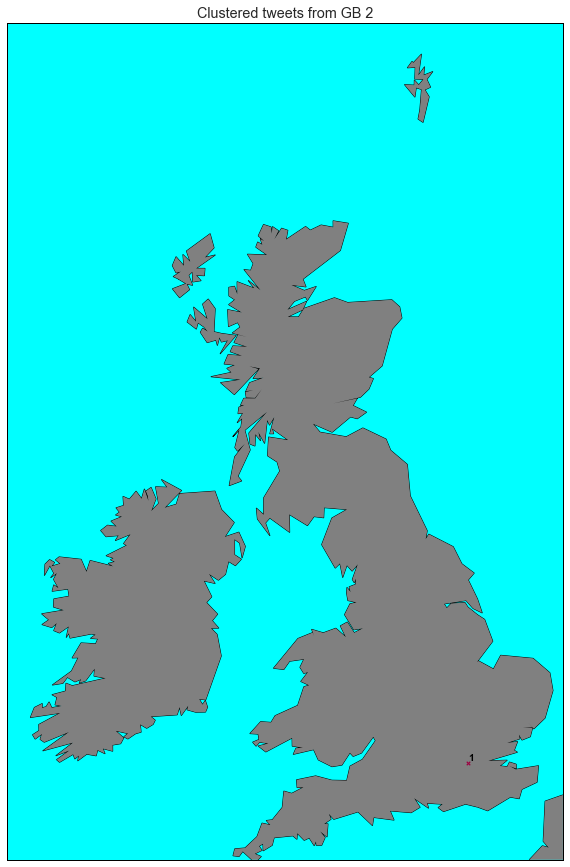

Making the Map took: 1.1402511596679688
start calculating
1. Cluster, with 15 tweets, 15 distinct users.
This cluster is from:10.07.2016 to: 10.07.2016
 
(52.07000355733333, -1.0220827319999999)
Location:  Aylesbury Vale,  Buckinghamshire
Most similar words:
['silverstone', '#britishgp', '#silverstone', '#f1', '#britishgrandprix', 'gp2', '#grandprix', '#silverstone…', '#teamlh', '#britishgp…']
 
The most freq. words are: 
[   ('silverstone', 9),
    ('grand', 8),
    ('prix', 8),
    ('#britishgp', 7),
    ('#f1', 6),
    ('#silverstone', 4),
    ('british', 4),
    ('circuit', 3),
    ('starts', 2),
    ('#race', 2)]
 
[   'GP2s are now live!#Formula #One #F1 #Formula1 #British #Grand #Prix '
    '#BritishGP #Silverstone… https://t.co/ih9Cf4RT6P',
    "Hamilton's final lap 🔥💥 brilliant atmosphere today! #F1 @ F1 British "
    'Grand Prix @ Silverstone https://t.co/yTMNqZxMqA',
    'AJ supporting Lewis at Silverstone! #lewishamilton #livingthedream #f1 '
    '#britishgp #silverstone… h

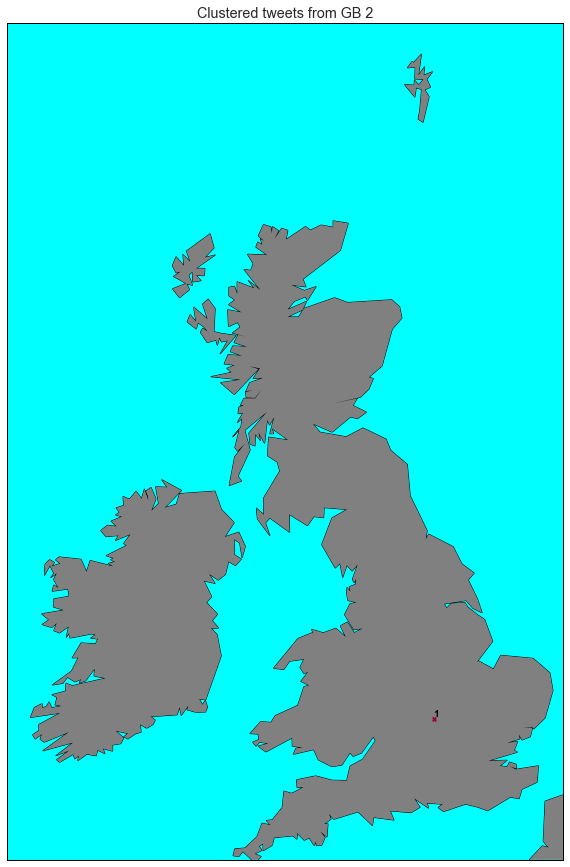

Making the Map took: 1.3912711143493652
start calculating
1. Cluster, with 6 tweets, 6 distinct users.
This cluster is from:10.07.2016 to: 10.07.2016
 
(53.36138485, -6.249724923333333)
Location:  Dublin,  County Dublin
Most similar words:
['wembley', '#crokepark', '#beyonce', '#queenbey', '#croker', 'formation…', '#queenb', '#allnight', '#formationworldtour', '#beyoncewembley']
 
The most freq. words are: 
[   ('croke', 4),
    ('park', 4),
    ('beyonce', 3),
    ('#formationworldtour', 2),
    ('#beyonce', 2),
    ('#crokepark', 2),
    ('#beyhive', 1),
    ('formation', 1),
    ('#beyonceconcert', 1),
    ('😍🐝💜', 1)]
 
[   'Halo 😇 Beyonce was amazing!!! 😍🐝💜 #beyonce #formationworldtour2016 '
    '#crokepark #dublin… https://t.co/q0dCey0HPz',
    '👑🐝❤️ @ Croke Park https://t.co/aJkdv2lQbh',
    'Girlies patiently waiting for the bey ✨✨ #beyonce #beyonceconcert '
    '#crokepark @ Beyonce Formation… https://t.co/MfEThHT83K',
    'Queen B was unreal 🤗❤️ #formationworldtour #beyhive @ 

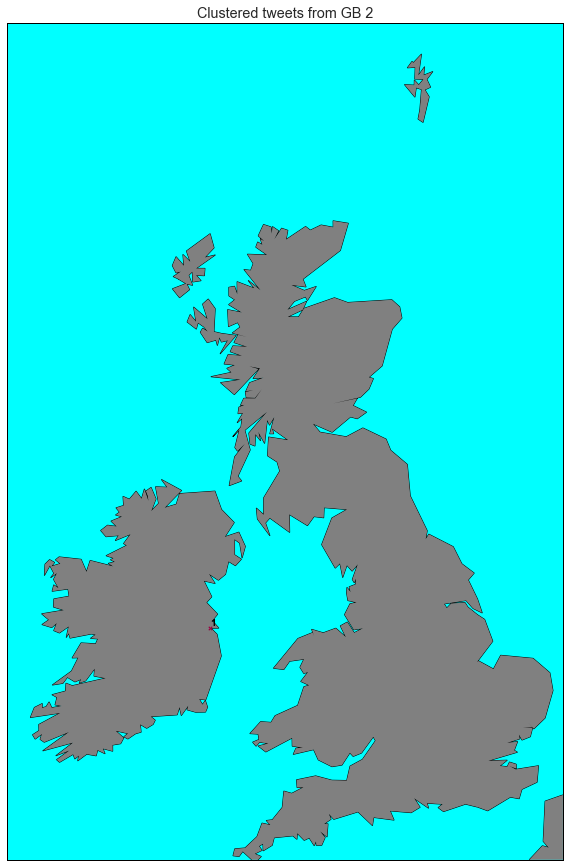

Making the Map took: 1.3090629577636719
There were 770 Tweets that were clustered as noise
Seed: 50
9 Day  took Method 2: 15.015795946121216


Begin Analysis for day 10
11 day clustered by region. The passed time is: 5.883802890777588
labelsMethod2_loc: 1000
start calculating
start calculating
1. Cluster, with 13 tweets, 12 distinct users.
This cluster is from:11.07.2016 to: 11.07.2016
 
(51.508049598461533, -0.15875562846153843)
Location:  London,  Greater London
Most similar words:
['hyde', '#bsthydepark', '#steviewonder', '#hydepark', 'bsthydepark', '#takethat', '#bst', '#britishsummertime', '#britishsummertimehydepark', '#caroleking']
 
The most freq. words are: 
[   ('hyde', 12),
    ('park', 12),
    ('british', 7),
    ('summer', 6),
    ('time', 6),
    ('stevie', 5),
    ('wonder', 5),
    ('#steviewonder', 4),
    ('#bst', 3),
    ('bst', 3)]
 
[   'Amazing day out at Stevie Wonder at Hyde Park yesterday for the British '
    'Summer Time festival.… https://t.co/1jRBbnl6EM',


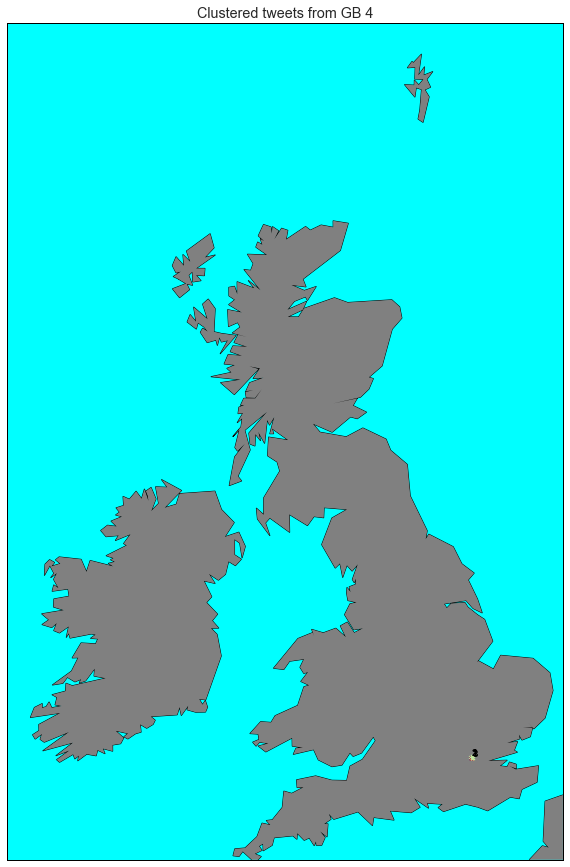

Making the Map took: 1.3314001560211182
There were 732 Tweets that were clustered as noise
Seed: 50
10 Day  took Method 2: 8.086263179779053


Begin Analysis for day 1
1 day clustered by region. The passed time is: 5.16729211807251
labelsMethod2_loc: 1000
start calculating
start calculating
1. Cluster, with 26 tweets, 25 distinct users.
This cluster is from:01.07.2016 to: 01.07.2016
 
(51.505359866923072, -0.12661518692307691)
Location:  London,  Greater London
Most similar words:
['london', 'united…', 'svitzer', 'coya', '#skpedition', '🇬🇧💕', 'wework', 'bermondsey', 'central…', 'londra']
 
The most freq. words are: 
[   ('london', 35),
    ('kingdom', 11),
    ('united', 11),
    ('greater', 8),
    ('#london', 6),
    ('station', 5),
    ('victoria', 3),
    ('#waterloo', 3),
    ('#wearehere', 3),
    ('#battleofthesomme', 2)]
 
[   '#despertarcontigo #despertando #CDMX #CDMX #itcdmxlovers #sinfiltro '
    '#filtros @ London, United… https://t.co/k84YrXaSv3',
    'London, 1.7.16 #nai

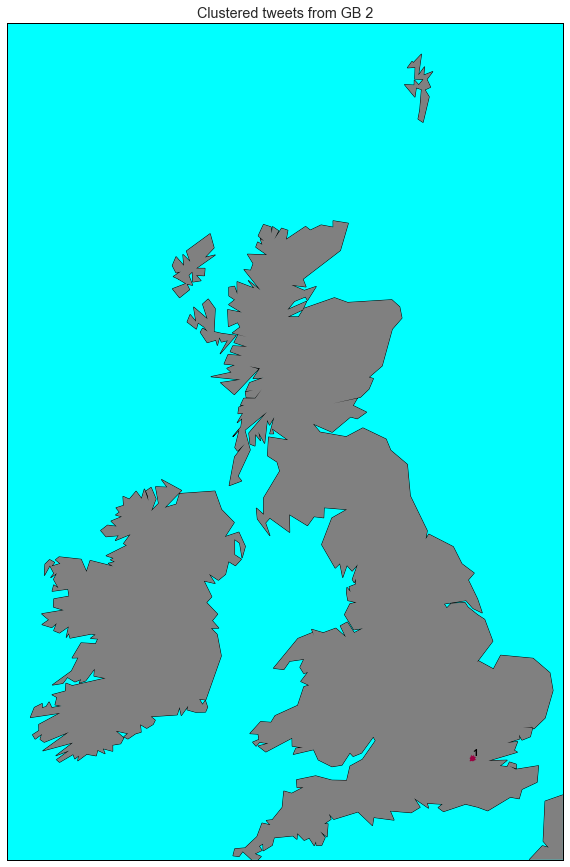

Making the Map took: 1.0719380378723145
start calculating
There were 3 out of 16 Tweets that were clustered as noise
This is 18.75%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.5223610401153564
start calculating
There were 2 out of 11 Tweets that were clustered as noise
This is 18.1818181818%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.5240659713745117
There were 742 Tweets that were clustered as noise
Seed: 50
1 Day  took Method 2: 8.766407012939453


Begin Analysis for day 2
2 day clustered by region. The passed time is: 5.090872049331665
labelsMethod2_loc: 1000
start calculating
start calculating
1. Cluster, with 11 tweets, 11 distinct users.
This cluster is from:02.07.2016 to: 02.07.2016
 
(51.558483119999998, -0.28049665999999995)
Location:  London,  Greater London
Most similar words:
['formation', 'beyoncé', 'beyonce', 'wembley', '#formationworldtour', 'bey', '#b

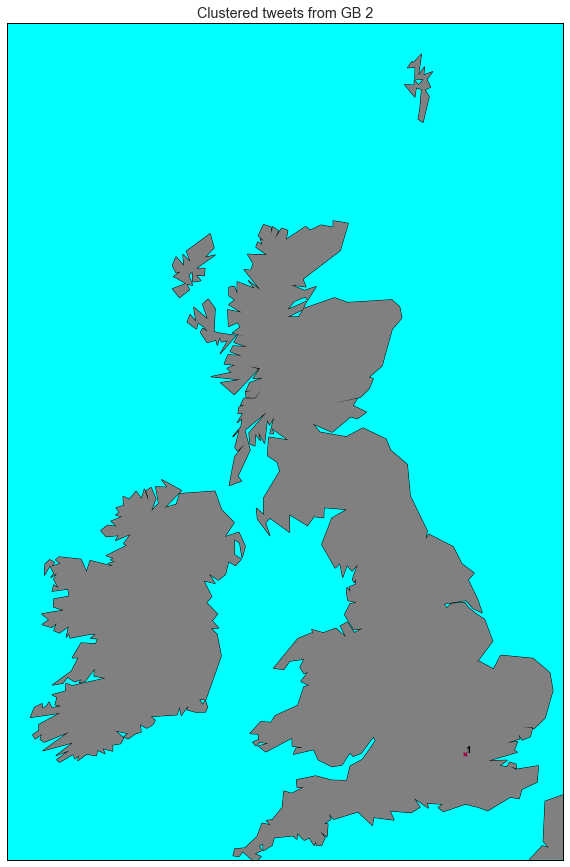

Making the Map took: 1.0897819995880127
start calculating
1. Cluster, with 16 tweets, 16 distinct users.
This cluster is from:02.07.2016 to: 02.07.2016
 
(51.507990651875005, -0.159311334375)
Location:  London,  Greater London
Most similar words:
['hyde', 'barclaycard', '#britishsummertime', '#bst', 'bsthydepark', 'hyde…', '#bsthydepark', '#britishsummertimehydepark', '#steviewonder', '#takethat']
 
The most freq. words are: 
[   ('hyde', 12),
    ('park', 12),
    ('british', 10),
    ('summer', 5),
    ('time', 5),
    ('summertime', 4),
    ('kendrick', 3),
    ('#florenceandthemachine', 2),
    ('#britishsummertime', 2),
    ('#bst', 2)]
 
[   'Just posted a photo @ Hyde Park https://t.co/3wcbZs3x7d',
    '🎠 @ British Summer Time, Hyde Park https://t.co/Wa0SlkeYON',
    'Always gives an epic performance 💙 #florenceandthemachine #bsthydepark @ '
    'Hyde Park British… https://t.co/6xq1DuVEmo',
    '#FlorenceAndTheMachine #YouveGotTheLove #LoveIsLove #BST @ Hyde Park - '
    'Britis

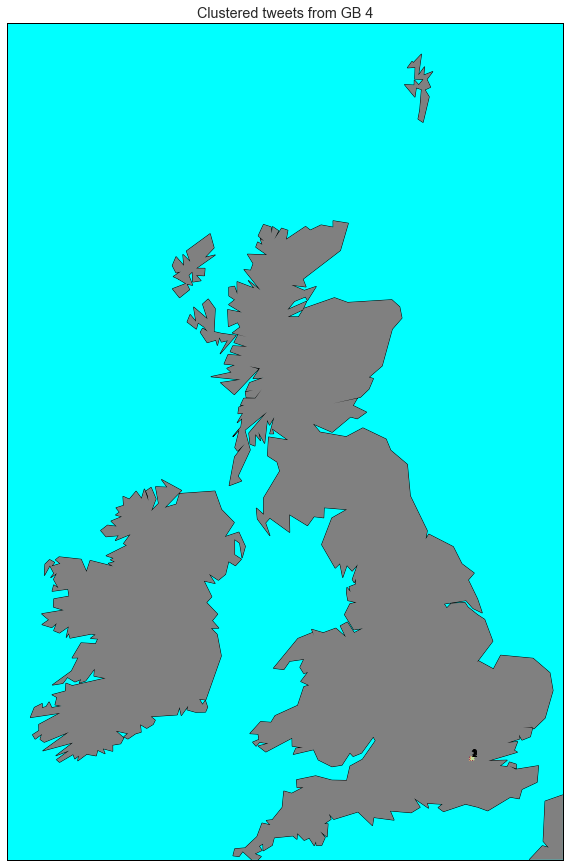

Making the Map took: 1.2614898681640625
There were 780 Tweets that were clustered as noise
Seed: 50
2 Day  took Method 2: 8.304106950759888


Begin Analysis for day 3
3 day clustered by region. The passed time is: 6.207290887832642
labelsMethod2_loc: 1000
start calculating
start calculating
1. Cluster, with 19 tweets, 18 distinct users.
This cluster is from:03.07.2016 to: 03.07.2016
 
(51.509653869999987, -0.12206494947368421)
Location:  London,  Greater London
Most similar words:
['#london', '#london…', '🇬🇧💕', '#redbus', '#whenlondoniscalling', '#londonlife', 'clerkenwell', '#skpedition', '#bondstreet', 'palace…']
 
The most freq. words are: 
[   ('london', 18),
    ('#london', 13),
    ('kingdom', 10),
    ('united', 10),
    ('#fun', 2),
    ('#londra', 2),
    ('✓✓✓', 2),
    ('#art', 2),
    ('soho', 1),
    ('#londonart', 1)]
 
[   'London sunset @ London, United Kingdom https://t.co/RQ2TRYipKs',
    '#bus #transportfestival #london #vegan #vegangirl #veganlife #dayoff @ '
    'P

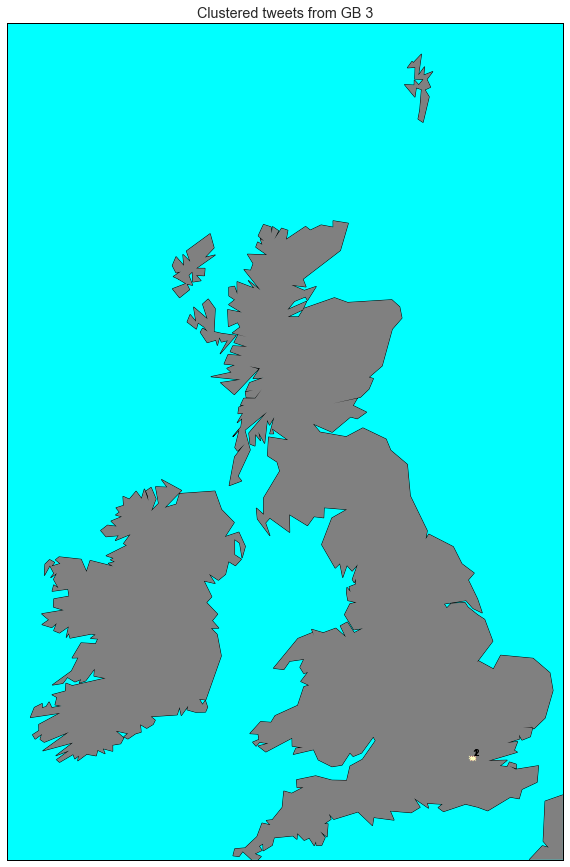

Making the Map took: 1.2157680988311768
start calculating
1. Cluster, with 18 tweets, 17 distinct users.
This cluster is from:03.07.2016 to: 03.07.2016
 
(51.557171384444437, -0.28012524333333327)
Location:  London,  Greater London
Most similar words:
['wembley', 'stadium', '#formationworldtour', '#beyoncewembley', 'principality', '#beyonce', 'beyonce', '#allnight', '#beyoncemanchester', 'etihad']
 
The most freq. words are: 
[   ('wembley', 18),
    ('stadium', 15),
    ('beyoncé', 5),
    ('#formationworldtour', 4),
    ('#beyonce', 3),
    ('park', 2),
    ('formation', 2),
    ('world', 2),
    ('tour', 2),
    ('london', 2)]
 
[   '⭐️💛 bey can you not! #formation #Beyoncé #screamingfan @ Club Wembley @ '
    'Wembley Stadium https://t.co/URQlRdXmsY',
    'Just posted a photo @ Wembley Stadium https://t.co/yxHWZGfpJH',
    'I so wish I was doing this again tonight 😭 @ Wembley Stadium '
    'https://t.co/2uB0uncz6m',
    'THE QUEEN @ Wembley Stadium https://t.co/IrJtM0XXkv',
    'Un

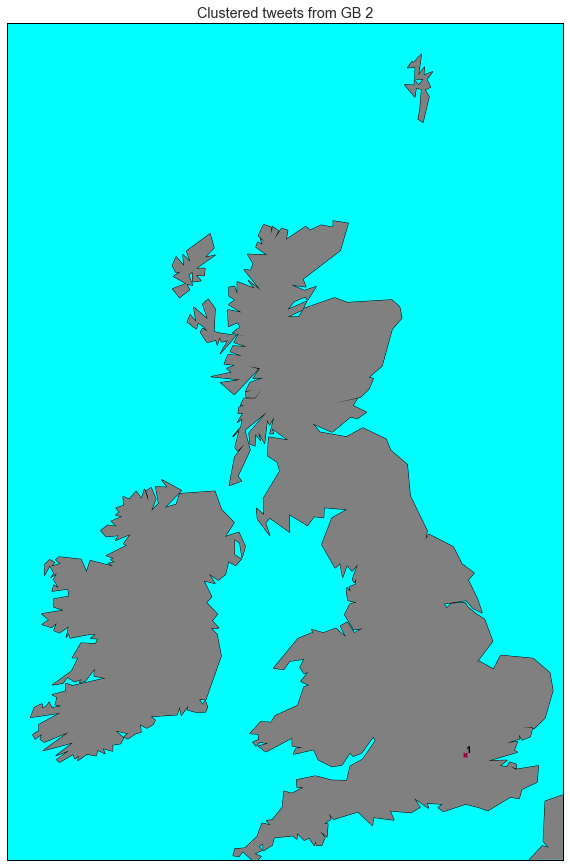

Making the Map took: 1.085386037826538
There were 819 Tweets that were clustered as noise
Seed: 50
3 Day  took Method 2: 9.436214923858643


Begin Analysis for day 4
4 day clustered by region. The passed time is: 5.812649965286255
labelsMethod2_loc: 1000
start calculating
start calculating
1. Cluster, with 13 tweets, 13 distinct users.
This cluster is from:04.07.2016 to: 04.07.2016
 
(51.511025334615383, -0.12259210153846152)
Location:  London,  Greater London
Most similar words:
['united…', 'coya', 'kingdom/', '🇬🇧💕', 'skyline', 'central…', 'kingdom', 'svitzer', 'spinningfields', 'wework']
 
The most freq. words are: 
[   ('london', 12),
    ('kingdom', 6),
    ('united', 6),
    ('photo', 3),
    ('greater', 3),
    ('posted', 3),
    ('#wimbledon', 2),
    ('selfridges', 2),
    ('new', 2),
    ('bridge', 1)]
 
[   '💗 @ London, United Kingdom https://t.co/yWwkiGjxNT',
    'Just posted a photo @ London, United Kingdom https://t.co/Ydd4LCK8gq',
    "I'm at Edgware Road in London, Great

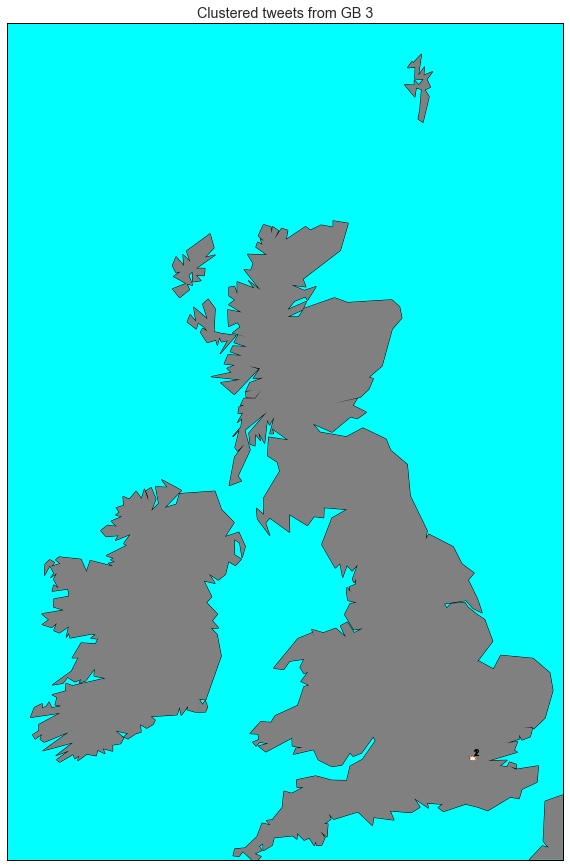

Making the Map took: 1.3836400508880615
start calculating
There were 2 out of 13 Tweets that were clustered as noise
This is 15.3846153846%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.5797410011291504
There were 790 Tweets that were clustered as noise
Seed: 50
4 Day  took Method 2: 8.876994132995605


Begin Analysis for day 5
5 day clustered by region. The passed time is: 8.512746095657349
labelsMethod2_loc: 1000
start calculating
start calculating
1. Cluster, with 19 tweets, 17 distinct users.
This cluster is from:05.07.2016 to: 05.07.2016
 
(51.510350155789482, -0.12809642421052628)
Location:  London,  Greater London
Most similar words:
['london', 'hoxton', 'marylebone', 'bermondsey', 'kensington', 'chiswick', 'kilburn', 'harringay', 'borough', 'waterloo']
 
The most freq. words are: 
[   ('london', 33),
    ('greater', 15),
    ('back', 2),
    ('bridge', 2),
    ('buckingham', 2),
    ('station', 2),
    ('palace', 2),
   

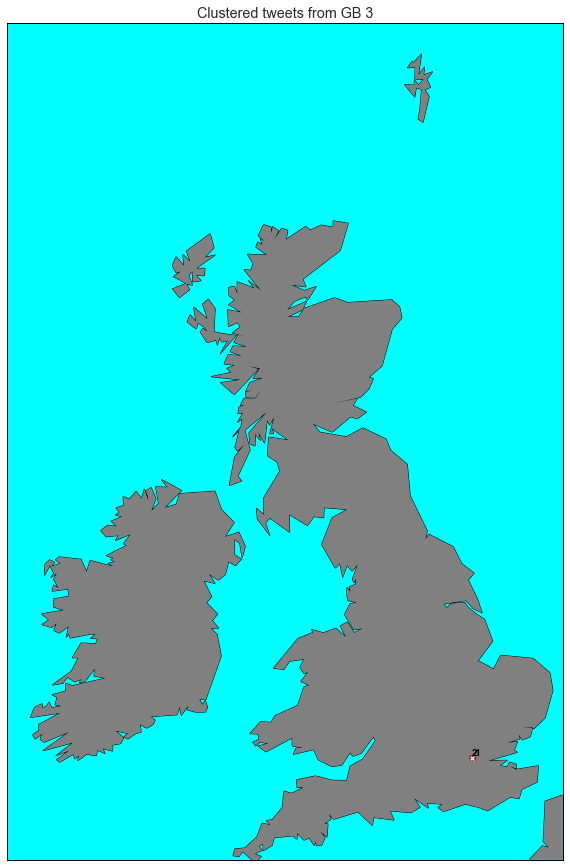

Making the Map took: 1.2605271339416504
start calculating
There were 2 out of 14 Tweets that were clustered as noise
This is 14.2857142857%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.5604779720306396
There were 770 Tweets that were clustered as noise
Seed: 50
5 Day  took Method 2: 11.643954992294312


Begin Analysis for day 6
6 day clustered by region. The passed time is: 6.7638161182403564
labelsMethod2_loc: 1000
start calculating
start calculating
1. Cluster, with 12 tweets, 11 distinct users.
This cluster is from:06.07.2016 to: 06.07.2016
 
(51.51233361500001, -0.13934540833333334)
Location:  London,  Greater London
Most similar words:
['london', 'greater', 'borough', 'marylebone', 'bermondsey', 'hoxton', 'kilburn', 'harringay', 'waterloo', 'chiswick']
 
The most freq. words are: 
[   ('london', 20),
    ('greater', 11),
    ('street', 3),
    ('oxford', 2),
    ('marylebone', 2),
    ('house', 1),
    ('espresso', 1),
   

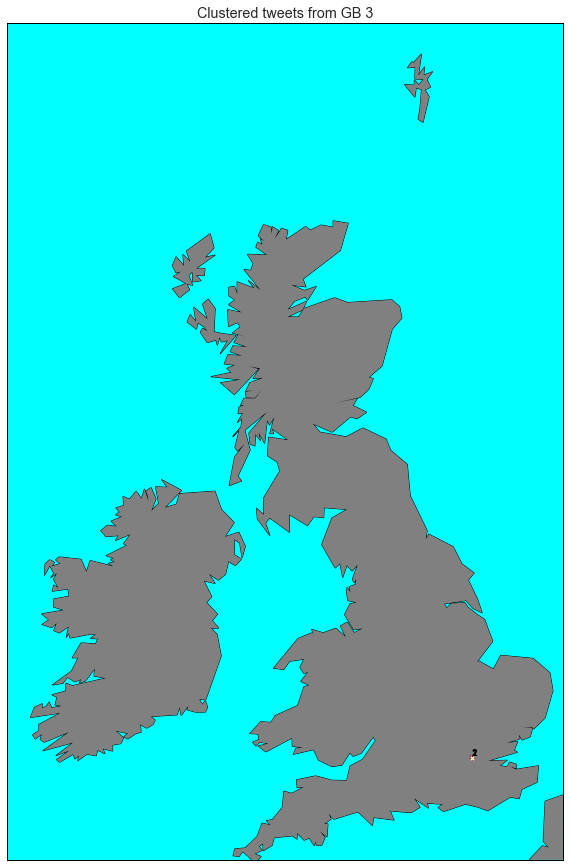

Making the Map took: 1.2724380493164062
There were 742 Tweets that were clustered as noise
Seed: 50
6 Day  took Method 2: 9.498831987380981


Begin Analysis for day 7
7 day clustered by region. The passed time is: 6.12012791633606
labelsMethod2_loc: 1000
start calculating
start calculating
There were 2 out of 19 Tweets that were clustered as noise
This is 10.5263157895%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.5357868671417236
start calculating
1. Cluster, with 12 tweets, 12 distinct users.
This cluster is from:07.07.2016 to: 07.07.2016
 
(51.509086855, -0.12676762083333332)
Location:  London,  Greater London
Most similar words:
['kingdom', 'united…', 'coya', '🇬🇧💕', 'brockely', 'kingdom/', 'central…', '#whenlondoniscalling', '#brighton…', '#skpedition']
 
The most freq. words are: 
[   ('london', 12),
    ('kingdom', 11),
    ('united', 11),
    ('morning', 3),
    ('#london', 3),
    ('way', 1),
    ('#happymoments#sunnyda

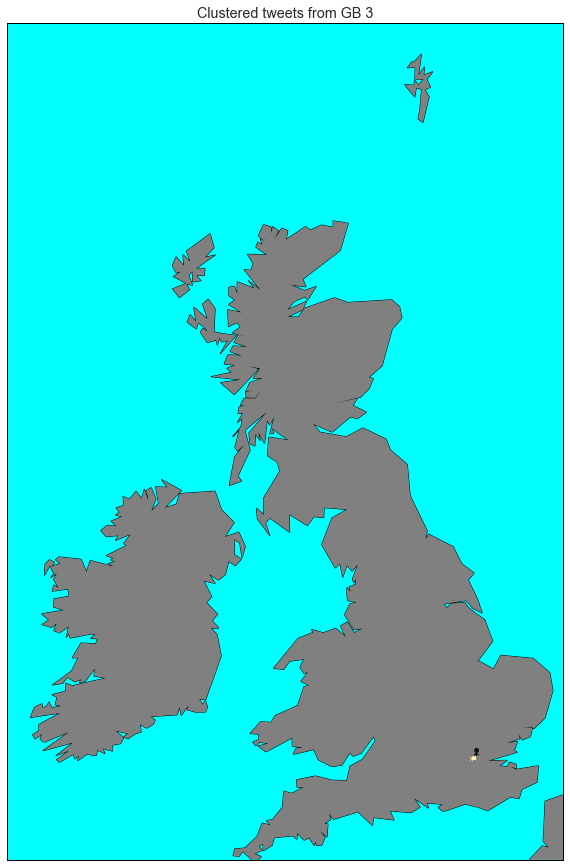

Making the Map took: 1.2312359809875488
start calculating
There were 2 out of 10 Tweets that were clustered as noise
This is 20.0%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.5644898414611816
start calculating
There were 2 out of 16 Tweets that were clustered as noise
This is 12.5%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.5530569553375244
There were 756 Tweets that were clustered as noise
Seed: 50
7 Day  took Method 2: 10.367871046066284


Begin Analysis for day 8
9 day clustered by region. The passed time is: 6.659414052963257
labelsMethod2_loc: 1000
start calculating
start calculating
1. Cluster, with 17 tweets, 16 distinct users.
This cluster is from:09.07.2016 to: 09.07.2016
 
(51.50569003529413, -0.1330598411764706)
Location:  London,  Greater London
Most similar words:
['london', 'bermondsey', 'kilburn', 'greater', 'marylebone', 'hoxton', 'harringay', 'boroug

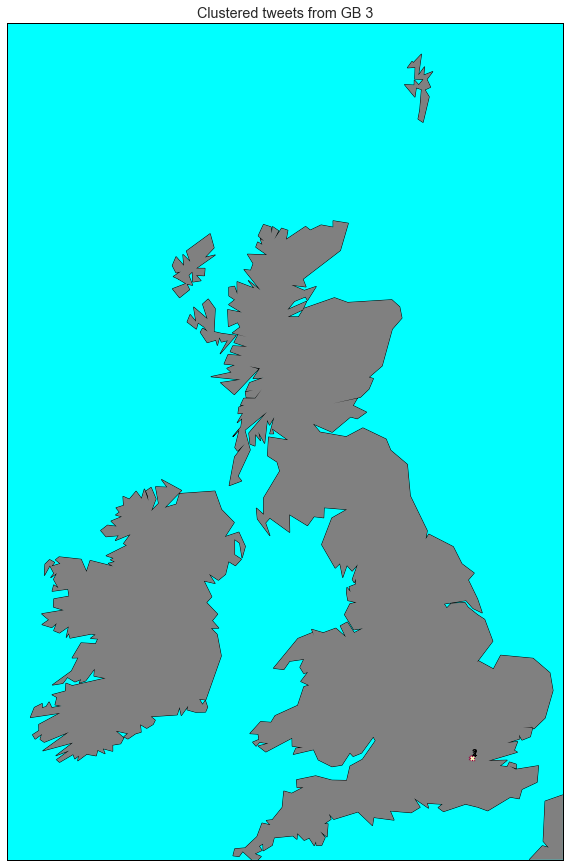

Making the Map took: 1.238483190536499
start calculating
1. Cluster, with 8 tweets, 8 distinct users.
This cluster is from:09.07.2016 to: 09.07.2016
 
(51.568849999999998, -0.098419975000000007)
Location:  London,  Greater London
Most similar words:
['festival', 'wireless', '#wirelessfest', '#myfestivalsquad', '#wirelessfestival', 'edc', 'nass', '#festival', 'fest', 'festivals']
 
The most freq. words are: 
[   ('wireless', 9),
    ('festival', 9),
    ('day', 2),
    ('#wirelessfestival', 2),
    ('#wirelessfest', 2),
    ('2122', 1),
    ('#presspass', 1),
    ('blondes', 1),
    ('lover', 1),
    ('fun💃🏻', 1)]
 
[   'Wireless festival with @palette_officia @anastasiakenyon and '
    '@misslippybeauty @ Wireless… https://t.co/bc9zsiWVz4',
    '21:22 @ Wireless Festival 2016 https://t.co/EQD5USoEw4',
    'Tyrone always come thru💯 #Wirelessfestival @ Wireless Festival 2016 '
    'https://t.co/b0KTbuQENQ',
    'who says blondes have more fun💃🏻 @ Wireless Festival 2016 '
    'https://t.c

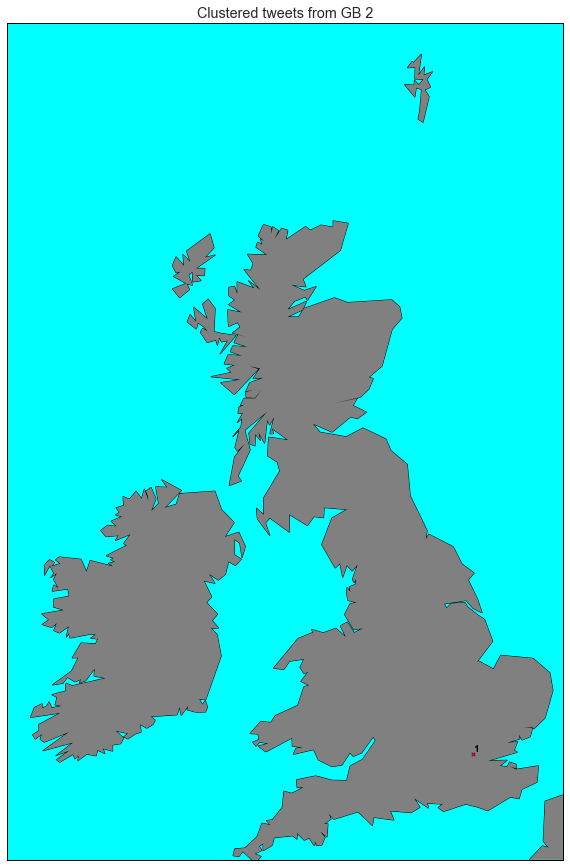

Making the Map took: 1.1270008087158203
There were 827 Tweets that were clustered as noise
Seed: 50
8 Day  took Method 2: 9.728592872619629


Begin Analysis for day 9
10 day clustered by region. The passed time is: 6.874745845794678
labelsMethod2_loc: 1000
start calculating
start calculating
1. Cluster, with 8 tweets, 8 distinct users.
This cluster is from:10.07.2016 to: 10.07.2016
 
(52.070918956249997, -1.02253205375)
Location:  Aylesbury Vale,  Buckinghamshire
Most similar words:
['silverstone', '#britishgp', '#silverstone', '#britishgrandprix', 'gp2', '#f1', '#grandprix', 'prix', 'gp3', '#britishgp…']
 
The most freq. words are: 
[   ('grand', 6),
    ('prix', 6),
    ('silverstone', 5),
    ('british', 4),
    ('#f1', 4),
    ('#silverstone', 3),
    ('#britishgp', 2),
    ('👏🏻👏🏻🏁🏁🇬🇧🇬🇧#teamlh', 1),
    ('rain', 1),
    ('wheel', 1)]
 
[   'Having a stroll round the f1 village @SilverstoneUK #F1 #BritishGP @… '
    'https://t.co/gXiWabTp7H',
    'F1 Grid #silverstone #f1 #britishgp

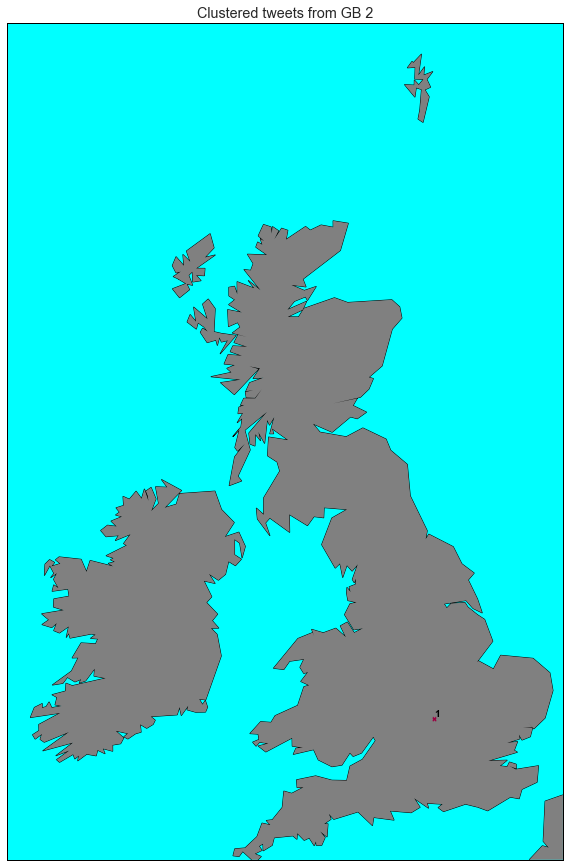

Making the Map took: 1.1122198104858398
start calculating
1. Cluster, with 16 tweets, 16 distinct users.
This cluster is from:10.07.2016 to: 10.07.2016
 
(51.507114860000001, -0.12731804999999999)
Location:  London,  Greater London
Most similar words:
['kingdom', 'united…', 'coya', 'kingdom/', '🇬🇧💕', 'brockely', 'central…', '#whenlondoniscalling', 'kindom', 'spinningfields']
 
The most freq. words are: 
[   ('london', 18),
    ('kingdom', 16),
    ('united', 16),
    ('today', 2),
    ('#citylife', 1),
    ('life', 1),
    ('rain', 1),
    ('tshirt', 1),
    ('#londonhustle', 1),
    ('#lovelife❤️', 1)]
 
[   '💖🤗👸🏻👸🏼👩\u200d❤️\u200d💋\u200d👩 #loveher @ London, United Kingdom '
    'https://t.co/JzXJtpN0A6',
    '#sophiaflat reporting on duty #thestylegalaxy @ London, United Kingdom '
    'https://t.co/u9FddUgsHX',
    '#BLACKLIVESMATTER @ London, United Kingdom https://t.co/Yw5ZSVkShs',
    'City Life #LondonHustle #lovelife❤️ #LoveLife #citylife @ London, United '
    'Kingdom https://t

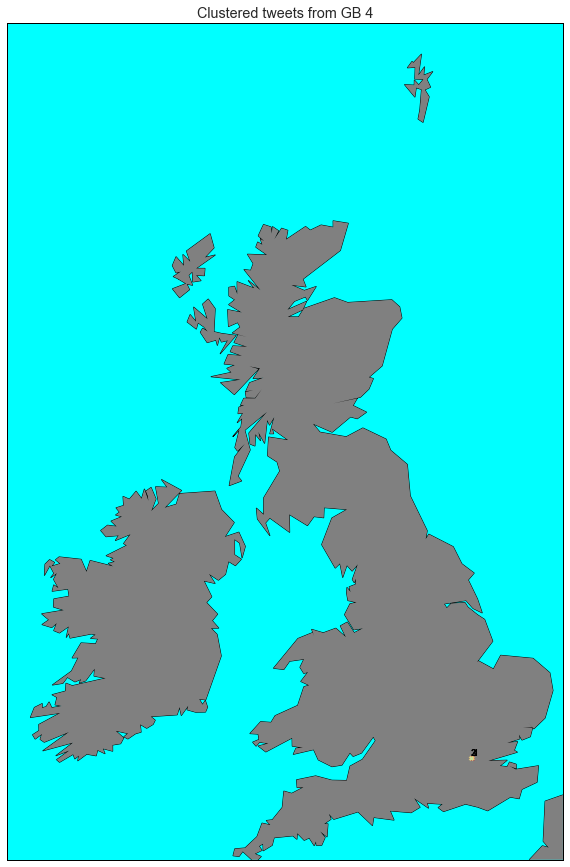

Making the Map took: 1.423266887664795
start calculating
1. Cluster, with 13 tweets, 12 distinct users.
This cluster is from:10.07.2016 to: 10.07.2016
 
(51.568849999999998, -0.098419915384615378)
Location:  London,  Greater London
Most similar words:
['wireless', 'festival', 'edc', 'nass', '#wirelessfest', 'festivals', '#wirelessfestival', '#myfestivalsquad', 'fest', '#festival']
 
The most freq. words are: 
[   ('wireless', 15),
    ('festival', 12),
    ('day', 3),
    ('#wirelessfest', 2),
    ('summer', 1),
    ('insane', 1),
    ('got', 1),
    ('back', 1),
    ('👸🏼👸🏽', 1),
    ('yday', 1)]
 
[   '〽️〽️〽️ @_themanor @ Wireless Festival https://t.co/IDkU1lm8Ki',
    'Guess who ? The one n only @francutler got my back at #wireless #festival '
    '❤️ @ Wireless Festival https://t.co/i0kuh8IP3K',
    'Hands up if you are excited for Wireless day 3?!?! 🙌🏼 #MyFestivalSquad '
    '@eonlineuk @ Wireless… https://t.co/nlOrN7Bex2',
    '@chaseandstatus were insane @ Wireless Festival https

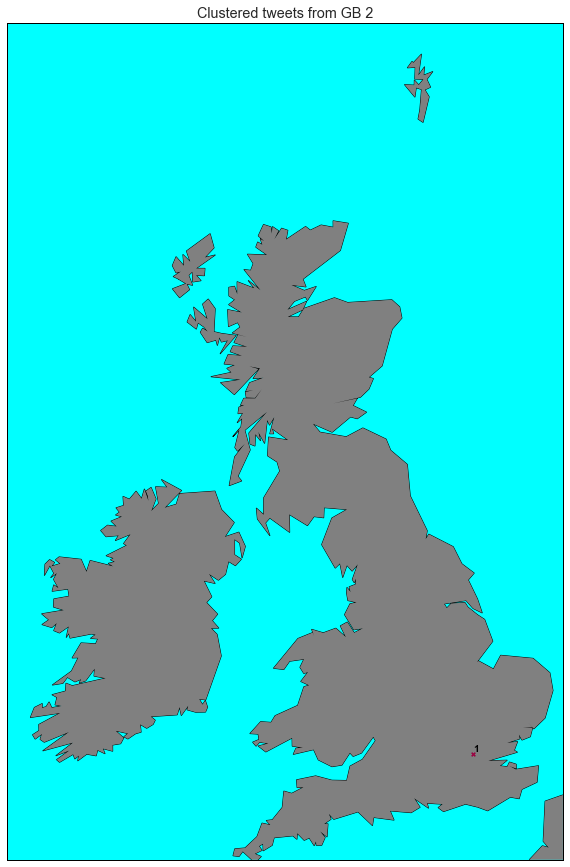

Making the Map took: 1.108888864517212
There were 791 Tweets that were clustered as noise
Seed: 50
9 Day  took Method 2: 11.194355010986328


Begin Analysis for day 10
11 day clustered by region. The passed time is: 6.94068717956543
labelsMethod2_loc: 1000
start calculating
start calculating
1. Cluster, with 17 tweets, 16 distinct users.
This cluster is from:11.07.2016 to: 11.07.2016
 
(51.506711792941182, -0.12167496529411764)
Location:  London,  Greater London
Most similar words:
['kingdom', 'united…', 'coya', 'kingdom/', '🇬🇧💕', 'brockely', 'central…', 'wework', 'spinningfields', 'i̇ngiltere']
 
The most freq. words are: 
[   ('london', 17),
    ('kingdom', 15),
    ('united', 15),
    ('photo', 4),
    ('posted', 4),
    ('bridge', 2),
    ('#trust', 2),
    ('coming', 1),
    ('sky', 1),
    ('#bowie', 1)]
 
[   'I got something coming ⚡️ @ London, United Kingdom '
    'https://t.co/v47sfALoKy',
    'Just posted a photo @ London, United Kingdom https://t.co/moSlyCJ8UG',
    'Just p

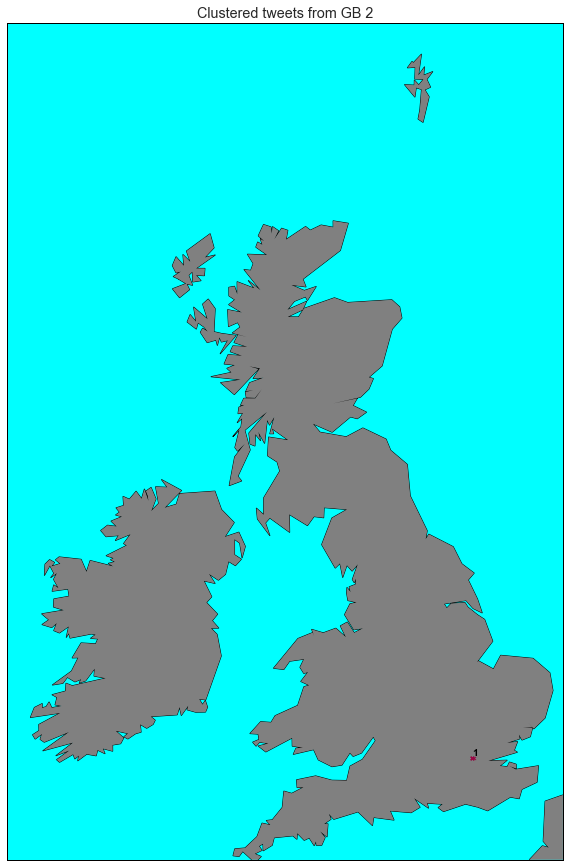

Making the Map took: 1.170342206954956
start calculating
1. Cluster, with 14 tweets, 12 distinct users.
This cluster is from:11.07.2016 to: 11.07.2016
 
(51.508014846428573, -0.15901344000000001)
Location:  London,  Greater London
Most similar words:
['hyde', '#bsthydepark', '#steviewonder', '#hydepark', 'bsthydepark', '#bst', '#takethat', '#britishsummertime', '#britishsummertimehydepark', 'hyde…']
 
The most freq. words are: 
[   ('hyde', 15),
    ('park', 15),
    ('summer', 8),
    ('time', 8),
    ('british', 8),
    ('#steviewonder', 6),
    ('#hydepark', 5),
    ('bst', 2),
    ('stevie', 2),
    ('✨💖✨', 2)]
 
[   'It happened!! 👌🏼 #bst #hydepark #steviewonder @ British Summer Time, Hyde '
    'Park https://t.co/v8MFNsTJGs',
    'Stevie Wonder in Hyde Park last night! 🇬🇧 @ British Summer Time, Hyde '
    'Park https://t.co/bfOiITJyrv',
    '✨💖✨ still not over how good Friday was @mumfordandsons ✨💖✨ @ British '
    'Summer Time, Hyde Park https://t.co/8SWebDI2J9',
    'Shaz and T

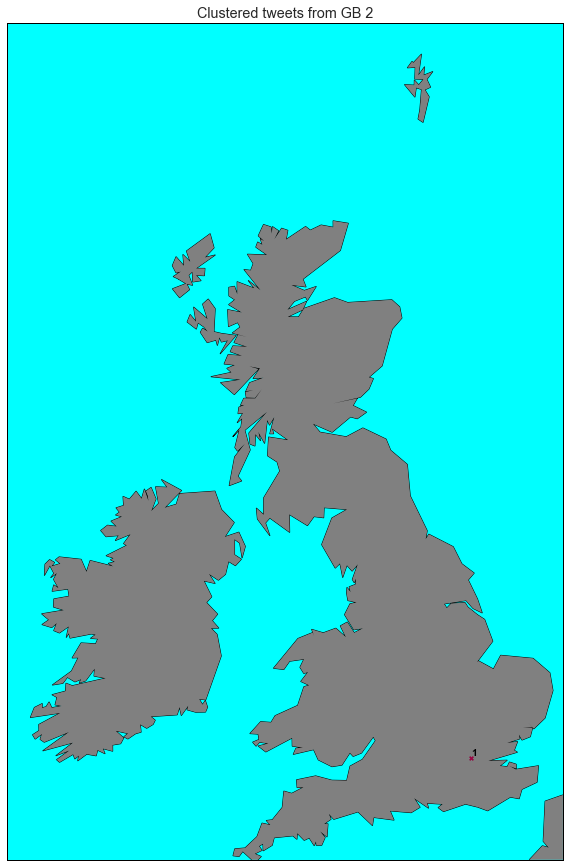

Making the Map took: 1.1620490550994873
There were 740 Tweets that were clustered as noise
Seed: 50
10 Day  took Method 2: 10.397429943084717


Begin Analysis for day 1
1 day clustered by region. The passed time is: 7.677682876586914
labelsMethod2_loc: 1000
start calculating
start calculating
1. Cluster, with 15 tweets, 14 distinct users.
This cluster is from:01.07.2016 to: 01.07.2016
 
(51.50664797200001, -0.12493629333333334)
Location:  London,  Greater London
Most similar words:
['london', 'waterloo', 'kilburn', 'bermondsey', 'brunel', 'queensway', 'chiswick', 'hoxton', 'holborn', 'picturehouse']
 
The most freq. words are: 
[   ('london', 22),
    ('greater', 8),
    ('waterloo', 6),
    ('station', 5),
    ('#london', 4),
    ('#wearehere', 3),
    ('#waterloo', 3),
    ('bridge', 2),
    ('soho', 1),
    ('voice', 1)]
 
[   "I'm at @Wasabi_uk in London, Greater London https://t.co/ZiboRChNKx "
    'https://t.co/1rZRoPQw6X',
    '#ww1 #waterloo #london #wearehere @ London Waterloo

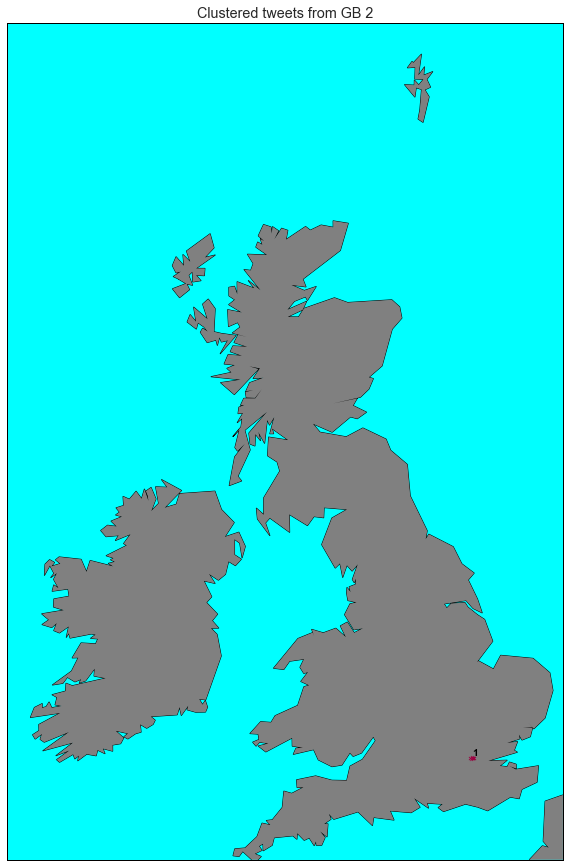

Making the Map took: 1.0833828449249268
start calculating
There were 1 out of 15 Tweets that were clustered as noise
This is 6.66666666667%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.6256461143493652
There were 769 Tweets that were clustered as noise
Seed: 50
1 Day  took Method 2: 11.146528959274292


Begin Analysis for day 2
2 day clustered by region. The passed time is: 7.20792818069458
labelsMethod2_loc: 1000
start calculating
start calculating
1. Cluster, with 19 tweets, 16 distinct users.
This cluster is from:02.07.2016 to: 02.07.2016
 
(51.506963749473677, -0.12308956210526315)
Location:  London,  Greater London
Most similar words:
['united…', 'coya', 'kingdom', 'kingdom/', '🇬🇧💕', 'wework', 'spinningfields', 'skyline', 'central…', 'brockely']
 
The most freq. words are: 
[   ('london', 15),
    ('kingdom', 12),
    ('united', 12),
    ('photo', 10),
    ('posted', 10),
    ('bridge', 2),
    ('tower', 2),
    ('hyde', 1

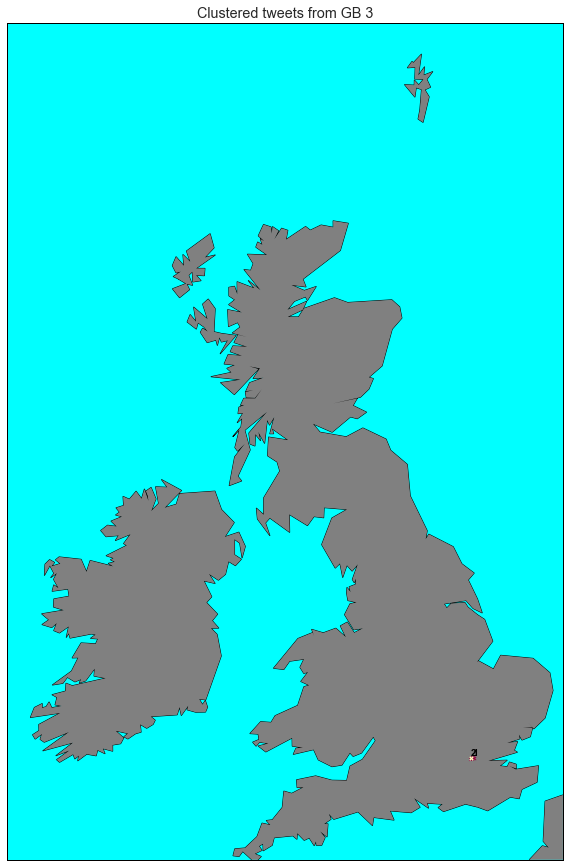

Making the Map took: 1.206855058670044
There were 831 Tweets that were clustered as noise
Seed: 50
2 Day  took Method 2: 9.644291877746582


Begin Analysis for day 3
3 day clustered by region. The passed time is: 5.488253116607666
labelsMethod2_loc: 1000
start calculating
start calculating
1. Cluster, with 10 tweets, 10 distinct users.
This cluster is from:03.07.2016 to: 03.07.2016
 
(51.510950820000005, -0.14127008700000002)
Location:  London,  Greater London
Most similar words:
['london', 'hoxton', 'waterloo', 'kilburn', 'bermondsey', 'marylebone', 'londra', 'greater', 'harringay', 'borough']
 
The most freq. words are: 
[   ('london', 19),
    ('greater', 9),
    ('marylebone', 2),
    ('balikkk', 2),
    ('direction', 1),
    ('three', 1),
    ('station', 1),
    ('scene⛅️', 1),
    ('one', 1),
    ('ripleys', 1)]
 
[   'Jumpa one direction (@ Madame Tussauds in Marylebone, Greater London) '
    'https://t.co/s8g6GvDeHX',
    "I'm at Trafalgar Square in London, Greater London, Lond

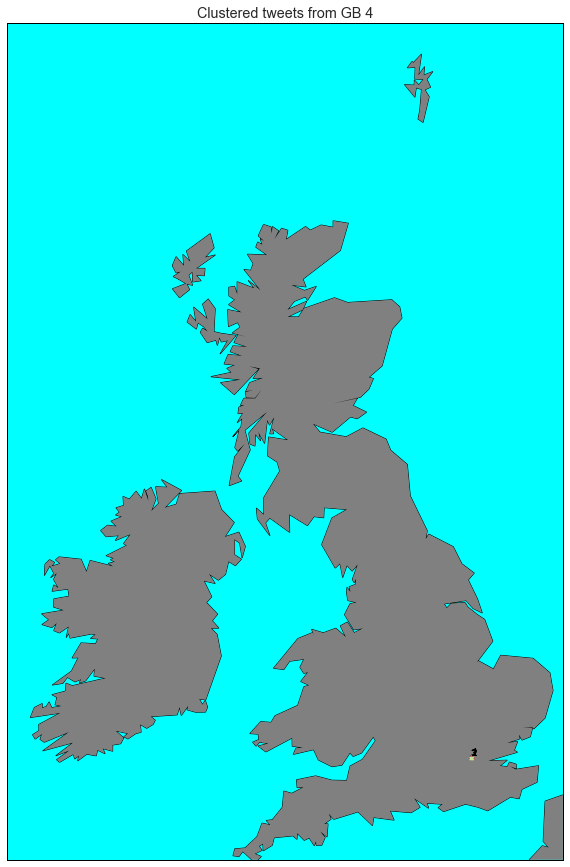

Making the Map took: 1.4138860702514648
start calculating
1. Cluster, with 20 tweets, 19 distinct users.
This cluster is from:03.07.2016 to: 03.07.2016
 
(51.555303493999986, -0.28049500699999996)
Location:  London,  Greater London
Most similar words:
['wembley', '#formationworldtour', '#beyoncewembley', 'beyonce', 'stadium', 'beyoncé', '#beyonce', '#beyoncemanchester', '#beyoncé', '#queenbey']
 
The most freq. words are: 
[   ('wembley', 19),
    ('stadium', 14),
    ('beyoncé', 10),
    ('beyonce', 7),
    ('world', 6),
    ('#formationworldtour', 6),
    ('london', 6),
    ('tour', 5),
    ('formation', 5),
    ('football', 4)]
 
[   'beyonce time! @lucy_k_nicholls @ Wembley Football Stadium '
    'https://t.co/qS2Y32RpoP',
    'Beyoncé killed it as always! 😭😭🐝🐝#formationworldtour @ Wembley Stadium '
    'https://t.co/tUdUaV9KaA',
    '1+1 ❤️ #formationworldtour #wembley #formation #beyonce @ Wembley Stadium '
    'https://t.co/DPSAJScjNG',
    'Just posted a video @ Wembley Footbal

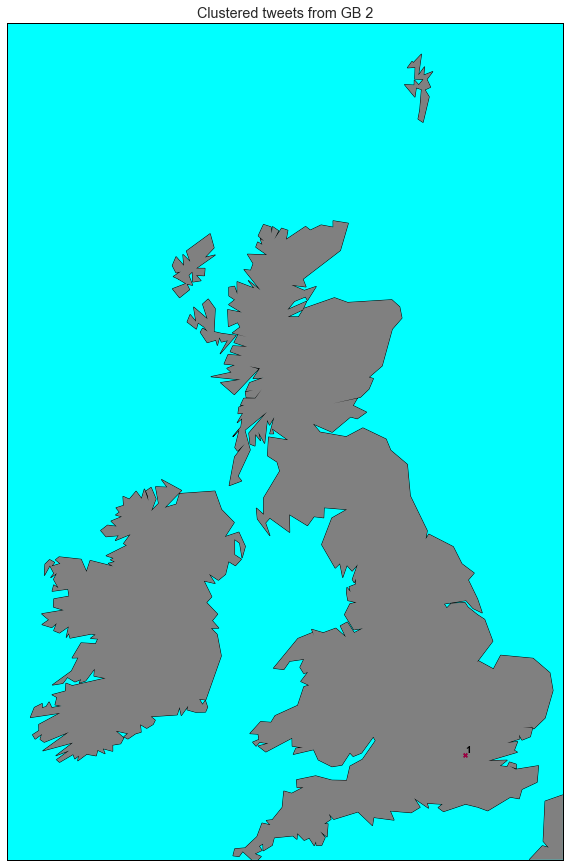

Making the Map took: 1.1625969409942627
There were 837 Tweets that were clustered as noise
Seed: 50
3 Day  took Method 2: 8.754987955093384


Begin Analysis for day 4
4 day clustered by region. The passed time is: 6.443125009536743
labelsMethod2_loc: 1000
start calculating
start calculating
1. Cluster, with 13 tweets, 13 distinct users.
This cluster is from:04.07.2016 to: 04.07.2016
 
(51.511296219230772, -0.12261627538461539)
Location:  London,  Greater London
Most similar words:
['london', 'hoxton', 'kilburn', 'londra', 'walthamstow', 'hammersmith', 'picturehouse', 'waterloo', 'brunel', 'chiswick']
 
The most freq. words are: 
[   ('london', 15),
    ('greater', 5),
    ('river', 2),
    ('one', 2),
    ('lookits', 1),
    ('summer', 1),
    ('stephens', 1),
    ('cold', 1),
    ('#links…', 1),
    ('bafta', 1)]
 
[   "I'm at @Primark in London, Greater London w/ @l105_ "
    'https://t.co/IxNn7Bp35Y',
    "A view from the river @ St. Paul's Cathedral https://t.co/BND0SNAF2S",
    "I

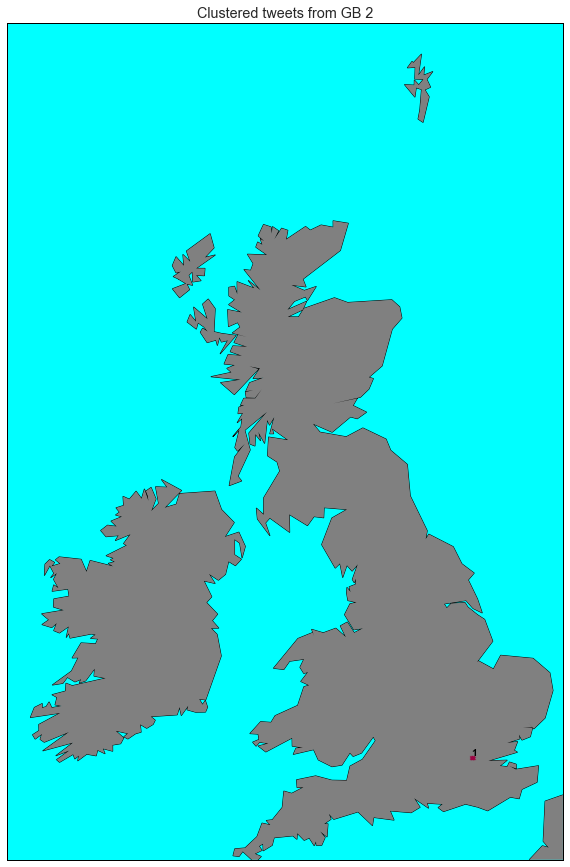

Making the Map took: 1.107400894165039
There were 795 Tweets that were clustered as noise
Seed: 50
4 Day  took Method 2: 8.551190853118896


Begin Analysis for day 5
5 day clustered by region. The passed time is: 8.967875957489014
labelsMethod2_loc: 1000
start calculating
start calculating
There were 2 out of 14 Tweets that were clustered as noise
This is 14.2857142857%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.641185998916626
start calculating
1. Cluster, with 12 tweets, 11 distinct users.
This cluster is from:05.07.2016 to: 05.07.2016
 
(51.508221621666671, -0.12517387916666664)
Location:  London,  Greater London
Most similar words:
['kingdom', 'united…', 'coya', 'kingdom/', '🇬🇧💕', 'brockely', 'central…', '#whenlondoniscalling', 'wonderground', 'kindom']
 
The most freq. words are: 
[   ('london', 12),
    ('kingdom', 12),
    ('united', 12),
    ('amen', 2),
    ('#london', 2),
    ('thank', 2),
    ('#gb', 1),
    ('plan

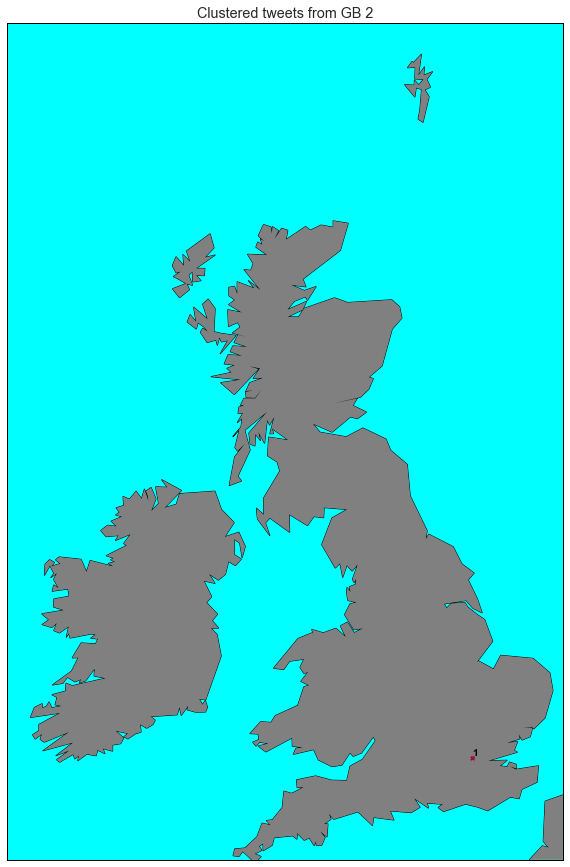

Making the Map took: 1.200092077255249
There were 804 Tweets that were clustered as noise
Seed: 50
5 Day  took Method 2: 11.987990856170654


Begin Analysis for day 6
6 day clustered by region. The passed time is: 6.231074094772339
labelsMethod2_loc: 1000
start calculating
There were 820 Tweets that were clustered as noise
Seed: 50
6 Day  took Method 2: 7.086092948913574


Begin Analysis for day 7
7 day clustered by region. The passed time is: 7.193279981613159
labelsMethod2_loc: 1000
start calculating
start calculating
There were 2 out of 20 Tweets that were clustered as noise
This is 10.0%.
Attempted to make map but there were not enough Tweets produce good clusters.
 
Making the Map took: 0.5353670120239258
There were 800 Tweets that were clustered as noise
Seed: 50
7 Day  took Method 2: 8.464377164840698


Begin Analysis for day 8
9 day clustered by region. The passed time is: 5.480041980743408
labelsMethod2_loc: 1000
start calculating
start calculating
1. Cluster, with 11 tweets, 

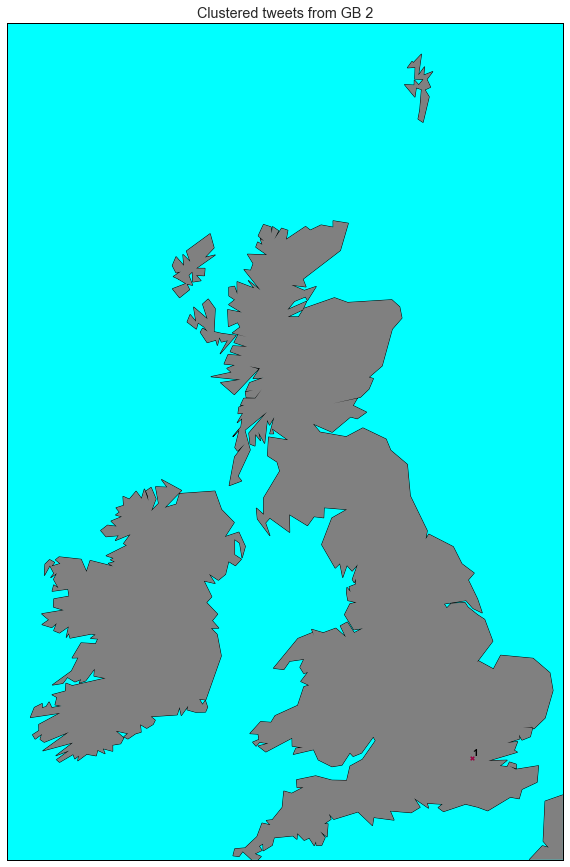

Making the Map took: 1.1589231491088867
There were 822 Tweets that were clustered as noise
Seed: 50
8 Day  took Method 2: 7.250072956085205


Begin Analysis for day 9
10 day clustered by region. The passed time is: 6.347661018371582
labelsMethod2_loc: 1000
start calculating
start calculating
1. Cluster, with 14 tweets, 12 distinct users.
This cluster is from:10.07.2016 to: 10.07.2016
 
(51.507886212142857, -0.15831997357142855)
Location:  London,  Greater London
Most similar words:
['#bsthydepark', 'hyde', '#britishsummertimehydepark', '#bst', 'bsthydepark', '#takethat', '#britishsummertime', '#steviewonder', 'barclaycard', '#hydepark']
 
The most freq. words are: 
[   ('hyde', 14),
    ('park', 14),
    ('british', 7),
    ('time', 7),
    ('summer', 6),
    ('#bsthydepark', 4),
    ('bst', 4),
    ('hospitality', 3),
    ('vip', 3),
    ('suite', 3)]
 
[   'Steeeeeeeevieeeeee @thewhitmore @clarapaget #bsthydepark @ British Summer '
    'Time, Hyde Park https://t.co/ZnmXS6wX1M',
    '

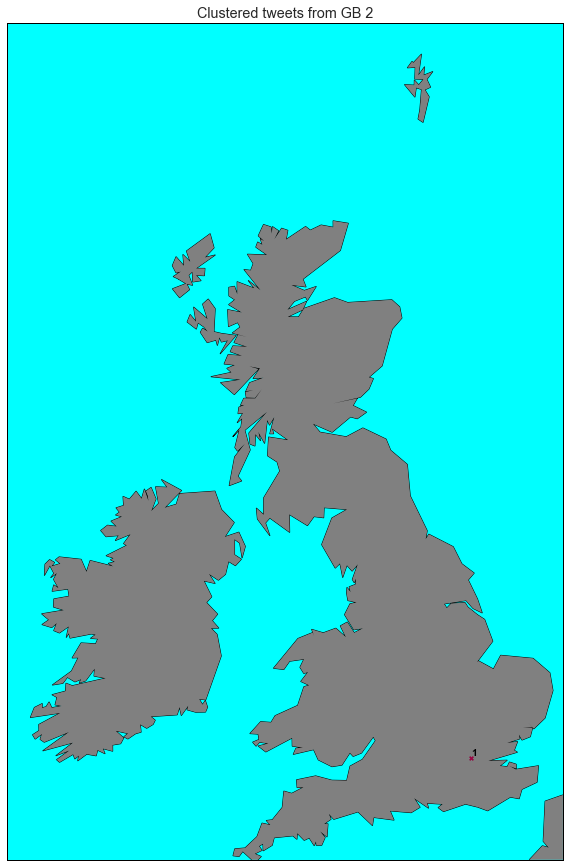

Making the Map took: 1.1752369403839111
start calculating
1. Cluster, with 14 tweets, 14 distinct users.
This cluster is from:10.07.2016 to: 10.07.2016
 
(52.069392575000002, -1.0231470349999998)
Location:  Aylesbury Vale,  Buckinghamshire
Most similar words:
['silverstone', '#britishgp', '#silverstone', '#britishgrandprix', '#f1', 'gp2', '#grandprix', '#silverstone…', '#teamlh', 'pole']
 
The most freq. words are: 
[   ('silverstone', 7),
    ('#silverstone', 6),
    ('#f1', 6),
    ('grand', 6),
    ('prix', 6),
    ('british', 5),
    ('day', 4),
    ('race', 4),
    ('#britishgp', 3),
    ('#gp3', 2)]
 
[   '🤘🏻 #formulaone #ladywaks #fromrussiawithbass #inspirationlondon 🏎 @ F1 '
    'British Grand Prix @… https://t.co/BzTEOElgZO',
    'With @ToroRossoSpy team at f1 Silverstone #gotorrorosso #f1 #redbull @ '
    'Abbey (First Corner),… https://t.co/QHzYBg4jTO',
    'Race day 🚥🏎 #Silverstone #F1 @ Silverstone Grand Prix Circuit '
    'https://t.co/MPM3KfRyQI',
    'Yeeeeah boy! Out 

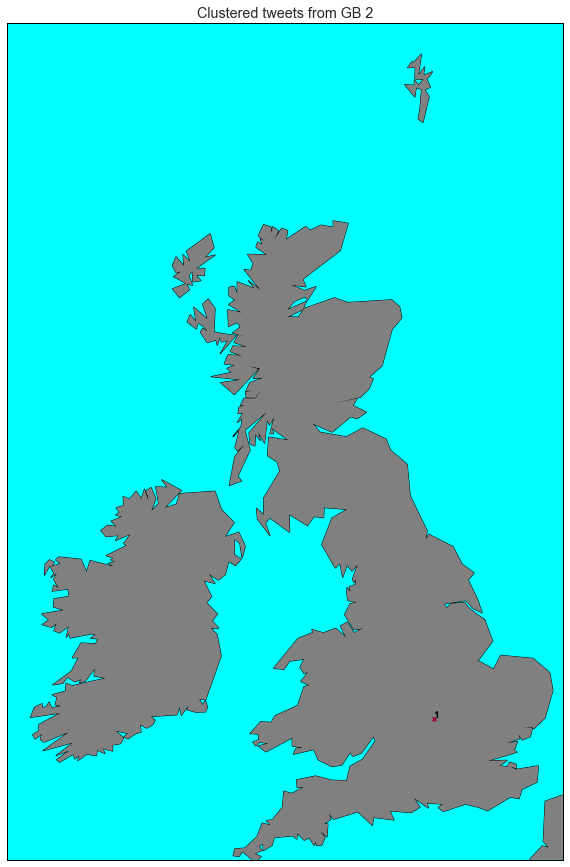

Making the Map took: 1.497741937637329
There were 838 Tweets that were clustered as noise
Seed: 50
9 Day  took Method 2: 9.585225105285645


Begin Analysis for day 10
11 day clustered by region. The passed time is: 7.507038116455078
labelsMethod2_loc: 1000
start calculating
start calculating
1. Cluster, with 16 tweets, 15 distinct users.
This cluster is from:11.07.2016 to: 11.07.2016
 
(51.508071463125006, -0.15850691624999999)
Location:  London,  Greater London
Most similar words:
['hyde', '#bsthydepark', '#steviewonder', 'bsthydepark', '#hydepark', '#bst', '#takethat', '#britishsummertime', '#britishsummertimehydepark', 'hyde…']
 
The most freq. words are: 
[   ('hyde', 13),
    ('park', 13),
    ('british', 11),
    ('summer', 10),
    ('time', 9),
    ('#steviewonder', 5),
    ('bst', 4),
    ('#hydepark', 3),
    ('stevie', 3),
    ('wonder', 3)]
 
[   'Amazing day out at Stevie Wonder at Hyde Park yesterday for the British '
    'Summer Time festival.… https://t.co/1jRBbnl6EM',
 

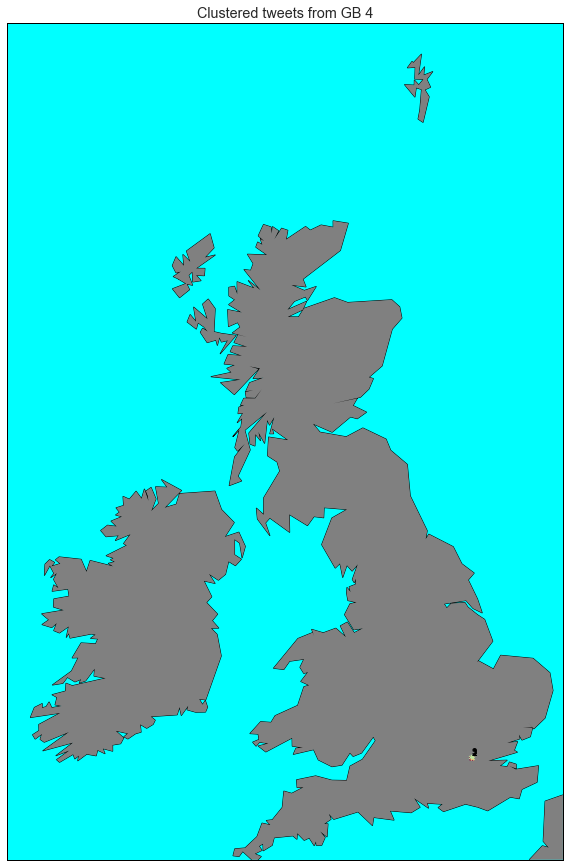

Making the Map took: 1.6307029724121094
There were 796 Tweets that were clustered as noise
Seed: 50
10 Day  took Method 2: 10.189917087554932


Total Method took: 441.86040806770325


In [40]:
import random
import time

time_weight = "N/A"
loc_weight = 0.8
text_weight = 4

minpts = 4
eps = 1

#set seed for sample
seed = 50
random.seed(seed)

#Method2
def prof_m2():
    groupedByDay = [group[1] for group in df3.groupby([df3.index.year,df3.index.month,df3.index.day])]

    experiment_descriptor = "m2_minpts"

    #size of sample for region
    numOfTweets_region = 1000
    
    #size of sample for topic
    list_of_minpts = [4, 6, 8, 10]
    numOfTweets = 1000

    for minpts in list_of_minpts:      
        day = 1
        for dailyTweets in groupedByDay:
    #2.
    # for dailyTweets in groupedByDay:
    #     day = 1
    #     for seed in [118, 6789, 456]:
    #        random.seed(seed)
            start_total = time.time()
 
            print("Begin Analysis for day " + str(day))
            
            if len(dailyTweets) > numOfTweets_region:
                rindex =  np.array(random.sample(range(len(dailyTweets)), numOfTweets_region))
            else:
                rindex = range(len(dailyTweets))
            sampleForMethod2 = dailyTweets.ix[rindex]

            labelsMethod2_loc = method2_location(sampleForMethod2, minpts=minpts, eps=eps)
            print("labelsMethod2_loc: " + str(len(labelsMethod2_loc)))
            uniquelabels2 = set(labelsMethod2_loc)

            print("start calculating")
            #plot each cluster individually
            
            regio_ind = 1
                        
            for region in uniquelabels2:
                    #print("This is the " + str(regio_ind) + " region of day: " + str(day))
                    regio_ind += 1
                    #currentClusterDF = subset dataframe by current k by index given in label variable
                    class_member_mask = (labelsMethod2_loc == region)

                    if region == -1:
                        # don't print noise, but count number of noise tweets
                        print("There were " + str(sum((class_member_mask))) + " Tweets that were clustered as noise")
                        # m.scatter(x1, y1, s=4, marker="o", c=col, alpha=0.5, zorder=10)            
                    else:
                        #For all region clusters do text analysis
                        regiondf = sampleForMethod2[class_member_mask]

                        if len(regiondf) > numOfTweets:
                            print("length of regiondf: " + str(len(regiondf)))
                            rindex2 =  np.array(random.sample(range(len(regiondf)), numOfTweets))
                        else:
                            rindex2 = range(len(regiondf))
                            #print("Can't sample because df is too small")
                        sampleForMethod22 = regiondf.ix[rindex2]            

                        we = sampleForMethod22.AvgWordEmbeddings #.ix[rindex2]

                        B = np.zeros((len(we),dimensions),float)
                        B[:,0:]=np.vstack(we.as_matrix())

                        B = B[~np.isnan(B).any(axis=1)]
                        
                        start = time.time()

                        db2 = DBSCAN(eps=eps, min_samples=minpts, metric=d2, algorithm='ball_tree').fit(B)
                        
                        #if there is at least one topic cluster found in the region
                        if len(np.unique(db2.labels_)) > 1:
                            end = time.time() - start
                            
                            start = time.time()
                            #labels, dataframe, meth, sample_size, seed_no, timePassed=0
                            make_the_Cluster_Eval(db2.labels_, sampleForMethod22, 2, len(sampleForMethod2), seed, end, experiment_descriptor=experiment_descriptor, sm2=len(sampleForMethod22))
                            
                            print("Making the Map took: " + str(time.time() - start))
            print("Seed: " + str(seed))
            print(str(day) +" Day  took Method 2: " + str(time.time() - start_total))
            print("")
            print("")
            day += 1
            #if day > 5:
            #    break

        
#profilingFile2 = "/Users/fabian/Dropbox/Warwick/Dissertation/Mining-Twitter/m2_profiling_results.txt"
#cProfile.run("prof_m2()", profilingFile2)

init_start = time.time()
prof_m2()
print("Total Method took: " + str(time.time() - init_start))

In [ ]:
from datetime import datetime, date

# (now.astype('uint64') / 1e6).astype('uint32')
a = (df3.index.values.astype('uint64') / 1e9).astype('uint32').reshape(-1,1)

print(df3.index.values[0])
for i in range(1,10):
    b = abs((datetime.fromtimestamp(a[0]) - datetime.fromtimestamp(a[i])).days + 1)
    print(print(df3.index.values[i]))
    print(str(i) + " versuche " + str(b))

#print(b / np.timedelta64(1, 'D'))

In [ ]:
print(df3.index.values[0])
print(df3.index.values[10000])

In [143]:
#sampleForMethod1.latitude.values.reshape(-1, 1).shape
#print(we.values)

B = np.zeros((len(sampleForMethod1),dimensions+4),float)
B[:,0]= sampleForMethod1.latitude.values
B[:,1]= sampleForMethod1.longitude.values
B[:,2]= sampleForMethod1.User.values
B[:,3]= (sampleForMethod1.index.values.astype('uint64') / 1e9).astype('uint32')
B[:,4:]=np.vstack(we.values)
#B[:,4:]=np.vstack(A[:,-1])

#toge = np.hstack((sampleForMethod1.latitude.values.reshape(-1, 1), we.values.reshape(-1,1)))

In [ ]:
import pstats
p = pstats.Stats(profilingFile2)

#p.strip_dirs().sort_stats(-1).print_stats()
p.strip_dirs().sort_stats('time').print_stats(15)

In [56]:
B.shape

(1000, 56)

In [173]:
#test
#print(B[14,2])
tw = 25



for tw in range(0,200):
    print("____________ ")
    print(sampleForMethod1.tweet.ix[tw])
    
    
    for i in range(0,1000):
        #a = d(B[tw,:], B[i,:]) 
        a = d2(B[tw,4:], B[i,4:]) #* 2.2
        if a < 1:
            print(a)
            print(str(i) + " " + str(sampleForMethod1.tweetList.ix[i]))
            print(" ")
    

____________ 
Spectacular chandelier at the entrance of the dome in #edinburgh - certainly lights up the… https://t.co/6EnOhDDR8v
0.2
0 ['spectacular', 'chandelier', 'entrance', 'dome', '#edinburgh', 'certainly', 'lights', 'the…']
 
____________ 
Meet the latest member our Iconic Offices team #jackson...Monday's don't get much better! Watch… https://t.co/jKJz9Z8hs3
0.2
1 ['meet', 'latest', 'member', 'iconic', 'offices', 'team', '#jacksonmondays', 'dont', 'get', 'much', 'better', 'watch…']
 
____________ 
Stunning Sunday lunch  thequeensarms_ed with family, can't get better!  #sundayroast #goodtimes… https://t.co/kGvQ2dq4F4
0.2
2 ['stunning', 'sunday', 'lunch', 'thequeensarmsed', 'family', 'cant', 'get', 'better', '#sundayroast', '#goodtimes…']
 
0.782375477754
841 ['sunday', 'roast', 'saturday', 'night', 'thanks', 'lovely', 'dinner', 'bradpack94', '#foodporn…']
 
____________ 
Monday weights #ape #beast #gorilla #monkey #kettlebells #thirdspace thirdspacelondon #mondays @… https://t.co

In [ ]:
df3.head(100).describe(include = 'all')

In [ ]:
B[1,4] = 0.5

In [80]:
model.most_similar(["#trndnl"])

[('trends', 0.7990270853042603),
 ('/7/9', 0.6473090648651123),
 ('/7/6', 0.6141377687454224),
 ('/7/10', 0.5784661769866943),
 ('trending', 0.5683688521385193),
 ('bst', 0.5622329711914062),
 ('/7/3', 0.5621321201324463),
 ('topic', 0.5427758097648621),
 ('sheeplands', 0.5417956709861755),
 ('#weareallleomessi4', 0.5274680852890015)]

In [ ]:
model["car"]

In [ ]:
df3.head()

In [ ]:
df3.groupby([df3.index.day]).tweet.count().plot(kind="bar", grid=True)

In [ ]:
cosine([-1.5, -1.2], [-1, -1.3])

In [82]:
cosine(model["#trndnl"], model["trends"])

0.20097288649443379

In [47]:
B

array([[  5.26651173e+01,  -2.37262752e+00,   2.07690010e+07, ...,
         -1.12956562e+00,   5.01217470e-02,  -1.09185624e+00],
       [  5.28956787e+01,  -1.26943774e+00,   7.08562616e+08, ...,
          1.30773235e-01,  -1.31372891e+00,  -4.38325107e-03],
       [  5.15420299e+01,  -3.10000000e-04,   2.81987255e+08, ...,
         -1.60179837e+00,  -7.80091584e-01,  -5.29929737e-01],
       ..., 
       [  5.07676074e+01,  -7.48587710e-01,   2.88799185e+08, ...,
         -6.10043470e-01,  -6.90161422e-01,   4.45871668e-01],
       [  5.38114000e+01,  -1.57245000e+00,   1.19496926e+09, ...,
          4.97216219e-03,  -1.00990427e+00,   4.44292039e-01],
       [  5.12557643e+01,  -1.51012860e-01,   2.19222613e+08, ...,
          9.04386897e-01,  -6.21923260e-01,  -7.20644070e-01]])